**Energy Calculation**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
multicore_4cores_out_path = "../mitigation_overhead_study/queue_size_study/results_4cores/robaracoch_mapping/32BO/proactive_mitiagtion/1targetREF_per_tREFI/1rfm_per_alert/QPRAC+Proactive/cmd_count/"
# singlecore_out_path = "../mitigation_enabled/results_singlecore/adaptive_closed_page"
df = pd.DataFrame(columns=[""])

VDD = 1.1
IDD0 = 60
IDD2N = 50
IDD3N = 55

IDD4R = 145
IDD4W = 145

IDD5B = 362
IPP5B = 48

VPP = 1.8
IPP0 = 3
IPP2N = 3
IPP3N = 3

IPP4R = 3
IPP4W = 3

tRFC1 = 410
tRFMab=350
tRAS = 16
tRP = 36
tBL = 2.5

for num_rfm in [1]:
    result_path = multicore_4cores_out_path
    result_list = [x[:-10] for x in os.listdir(result_path) if x.endswith(".cmd.count")]
    print(result_list)
    for result_filename in result_list:
        result_file = open(result_path + result_filename + ".cmd.count", "r")
        trh = int(result_filename.split("_")[0])
        if trh != 4:
            continue
        # workload = result_filename.split("_")[1:]
        workload = "_".join(result_filename.split("_")[1:])

        num_PREA = 0
        num_RFMab = 0
        num_REFab = 0
        num_WR = 0
        num_RD = 0
        num_PRE = 0
        num_ACT = 0
        for line in result_file.readlines():
            if ("PREA" in line):
                num_PREA = int(line.split(",")[1])
            if ("RFMab" in line):
                num_RFMab = int(line.split(",")[1])
            if ("REFab" in line):
                num_REFab = int(line.split(",")[1])
            if ("WR" in line):
                num_WR = int(line.split(",")[1])
            if ("RD" in line):
                num_RD = int(line.split(",")[1])
            if ("PRE" in line):
                num_PRE = int(line.split(",")[1])            
            if ("ACT" in line):
                num_ACT = int(line.split(",")[1])

        act_cmd_energy = (VDD * (IDD0 - IDD3N) + VPP * (IPP0 - IPP3N)) * num_ACT * tRAS
        pre_cmd_energy = (VDD * (IDD0 - IDD2N) + VPP * (IPP0 - IPP2N)) * num_PRE * tRP
        rd_cmd_energy  = (VDD * (IDD4R - IDD3N) + VPP * (IPP4R - IPP3N)) * num_RD * tBL
        wr_cmd_energy  = (VDD * (IDD4W - IDD3N) + VPP * (IPP4W - IPP3N)) * num_WR * tBL
        ref_cmd_energy = (VDD * IDD5B + VPP * IPP5B) * num_REFab * tRFC1
        rfm_cmd_energy = (VDD * (IDD0 - IDD3N) + VPP * (IPP0 - IPP3N)) * num_RFMab * tRFMab

        proactive_energy = (VDD * IDD5B + VPP * IPP5B) * num_REFab * tRFC1 * (5/16)

        total_cmd_energy = act_cmd_energy + pre_cmd_energy + rd_cmd_energy + wr_cmd_energy + ref_cmd_energy + rfm_cmd_energy
        overhead = float((rfm_cmd_energy) / total_cmd_energy)

        result_file.close()
        df = df.append({"workload": workload, "num_RFM:": num_RFMab,  "energy overhead": overhead} , ignore_index=True)

print(df)
print(df['energy overhead'].mean() * 100)

['8_403.gcc', '2_403.gcc', '1_403.gcc', '16_403.gcc', '4_403.gcc', '1_435.gromacs', '4_435.gromacs', '8_435.gromacs', '16_435.gromacs', '2_435.gromacs', '2_444.namd', '1_444.namd', '8_444.namd', '4_444.namd', '16_444.namd', '1_401.bzip2', '4_401.bzip2', '16_401.bzip2', '8_401.bzip2', '1_447.dealII', '8_447.dealII', '2_447.dealII', '16_447.dealII', '2_401.bzip2', '4_447.dealII', '1_445.gobmk', '4_445.gobmk', '2_445.gobmk', '8_445.gobmk', '16_445.gobmk', '4_458.sjeng', '2_458.sjeng', '16_458.sjeng', '1_458.sjeng', '4_464.h264ref', '1_464.h264ref', '16_464.h264ref', '8_458.sjeng', '8_464.h264ref', '8_456.hmmer', '2_464.h264ref', '16_456.hmmer', '2_456.hmmer', '4_456.hmmer', '1_456.hmmer', '2_481.wrf', '8_481.wrf', '4_481.wrf', '16_481.wrf', '1_481.wrf', '2_500.perlbench', '4_500.perlbench', '1_500.perlbench', '4_508.namd', '1_508.namd', '2_508.namd', '8_508.namd', '16_508.namd', '8_500.perlbench', '16_500.perlbench', '4_502.gcc', '16_436.cactusADM', '16_502.gcc', '8_502.gcc', '1_502.gcc',

**Figure 11: # of Alerts per Various QPRAC Designs at 32 NBO, 8 Entry, Proactivie Mitigation per tREFI**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
multicore_4cores_out_path = "../mitigation_overhead_study/ABO_study/results_4cores/target_ref_per_1trefi"
prac_latency_overhead_only_path = "../mitigation_overhead_study/results_4cores/robaracoch_mapping/PRAC_WO_Mitigation/stats/"
# no_proactive_4cores_out_path = "../mitigation_overhead_study/queue_size_study/results_4cores/robaracoch_mapping/32BOTh/no_proactive_mitiagtion"

# singlecore_out_path = "../mitigation_enabled/results_singlecore/adaptive_closed_page"

df = pd.DataFrame(columns=["mitigation", "num_RFM", "workload", "WS"])
mitigation_list = ["PRAC-PQ-NoOpREF", "PQ-NOPRO", "PRAC-PQ", "PRAC-Ideal"]
for num_rfm in [1,2,4]:
    for mitigation in mitigation_list:
        result_path = multicore_4cores_out_path + "/" + str(num_rfm) +"rfm_per_alert/" + mitigation +"/stats/"
        result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
        for result_filename in result_list:
            result_file = open(result_path + result_filename + ".txt", "r")
            trh = int(result_filename.split("_")[0])
            if trh != 32:
                continue
            # workload = result_filename.split("_")[1:]
            workload = "_".join(result_filename.split("_")[1:])

            ipc_0 = 0
            ipc_1 = 0
            ipc_2 = 0
            ipc_3 = 0
            cycle_0 = 0
            cycle_1 = 0
            cycle_2 = 0
            cycle_3 = 0
            num_inst_0=0
            num_inst_1=0
            num_inst_2=0
            num_inst_3=0
            num_abo=0
            num_tREFI_period=0
            num_tREFW_period=0
            for line in result_file.readlines():
                if (" cycles_recorded_core_0:" in line):
                    cycle_0 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_1:" in line):
                    cycle_1 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_2:" in line):
                    cycle_2 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_3:" in line):
                    cycle_3 = int(line.split(" ")[-1])
                if (" insts_recorded_core_0" in line):
                    num_inst_0 = int(line.split(" ")[-1])
                if (" insts_recorded_core_1" in line):
                    num_inst_1 = int(line.split(" ")[-1])
                if (" insts_recorded_core_2" in line):
                    num_inst_2 = int(line.split(" ")[-1])
                if (" insts_recorded_core_3" in line):
                    num_inst_3 = int(line.split(" ")[-1])
                if (" prac_num_recovery" in line):
                    num_abo = int(line.split(" ")[-1])
                if (" num_refresh_command_0" in line):
                    num_tREFI_period = int(line.split(" ")[-1])
                if (" num_refresh_window_0" in line):
                    num_tREFW_period = int(line.split(" ")[-1])            
                    
            if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
                continue
            if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
                print("Error: " + result_filename)
            ipc_0 = int(num_inst_0) / cycle_0
            ipc_1 = int(num_inst_1) / cycle_1
            ipc_2 = int(num_inst_2) / cycle_2
            ipc_3 = int(num_inst_3) / cycle_3
            num_abo_per_trefi = int(num_abo) / int(num_tREFI_period)
            if int(num_tREFW_period) == 0:
                num_abo_per_trefw = int(num_abo)
            else:
                num_abo_per_trefw = int(num_abo) / int(num_tREFW_period)
            # print(workload)
            # print(ipc)

            result_file.close()
            df = df.append({'mitigation': mitigation, 'num_RFM': num_rfm, 'TREF_Ratio': trh, "workload": workload, "WS": ipc_0+ipc_1+ipc_2+ipc_3, "num_abo_trefi": num_abo_per_trefi, "num_abo_trefw": num_abo_per_trefw} , ignore_index=True)

df_ws = df
df_num_abo = df.pivot(index=['num_RFM','workload'], columns=['mitigation'], values='num_abo_trefi').reset_index()     
workload_interests = ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk', 
                      '500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz',
                      'tpcc64', 'tpch17', 'tpch2', 'tpch6',
                      'grep_map0', 'wc_8443', 'wc_map0',
                    #   'bfs_dblp', 'bfs_cm2003','bfs_ny',
                    #   'h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'
                      'h264_encode', 'jp2_decode', 'jp2_encode',
                      'ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'
                      ]

df_interest = df_num_abo[df_num_abo['workload'].isin(workload_interests)]

# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (22)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 22
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    # 'LonestarGPU (3)': ['bfs_dblp', 'bfsbfs_cm2003_cm_2003','bfs_ny'], #lnestargpu: 3
    # 'MediaBench (4)': ['h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 4
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
# Function to calculate geometric mean
def calculate_arithmetic_mean(series):
    return series.mean()

# Function to calculate and add arithmetic means as new rows
def add_arithmetic_mean_rows(df):
    mean_df = pd.DataFrame(columns=df.columns)
    
    for trh in df['num_RFM'].unique():
        for suite_name, workloads in benchmark_suites.items():
            suite_df = df[df['workload'].isin(workloads) & (df['num_RFM'] == trh)]
            if not suite_df.empty:
                mean_prac_ideal = calculate_arithmetic_mean(suite_df['PRAC-Ideal'])
                mean_prac_pq = calculate_arithmetic_mean(suite_df['PRAC-PQ'])
                # geomean_prac_rand = calculate_arithmetic_mean(suite_df['PRAC-Rand'])
                mean_prac_pq_no_ref = calculate_arithmetic_mean(suite_df['PRAC-PQ-NoOpREF'])
                mean_prac_pq_no_pro = calculate_arithmetic_mean(suite_df['PQ-NOPRO'])
                mean_df = mean_df.append({
                    'num_RFM': trh,
                    'workload': suite_name,
                    'PRAC-Ideal': mean_prac_ideal,
                    'PRAC-PQ': mean_prac_pq,
                    # 'PRAC-Rand': geomean_prac_rand,
                    'PQ-NOPRO': mean_prac_pq_no_pro,
                    'PRAC-PQ-NoOpREF': mean_prac_pq_no_ref,
                }, ignore_index=True)
    
    return df.append(mean_df, ignore_index=True)

# Call function to calculate and merge arithmetic means
mean_df = add_arithmetic_mean_rows(df_interest)
# Function to add 'All (56)' rows for each trh value
def add_all_workloads_mean_rows(df):
    mean_df = pd.DataFrame(columns=df.columns)
    
    for trh in df['num_RFM'].unique():
        trh_df = df[df['num_RFM'] == trh]
        mean_prac_ideal = calculate_arithmetic_mean(trh_df['PRAC-Ideal'])
        mean_prac_pq = calculate_arithmetic_mean(trh_df['PRAC-PQ'])
        # geomean_prac_rand = calculate_arithmetic_mean(trh_df['PRAC-Rand'])
        mean_prac_pq_no_pro = calculate_arithmetic_mean(trh_df['PQ-NOPRO'])
        mean_prac_pq_no_ref = calculate_arithmetic_mean(trh_df['PRAC-PQ-NoOpREF'])

        
        all_workloads_mean_df = pd.DataFrame({
            'num_RFM': [trh],
            'workload': ['All (56)'],
            'PRAC-Ideal': [mean_prac_ideal],
            'PRAC-PQ': [mean_prac_pq],
            # 'PRAC-Rand': [geomean_prac_rand],
            'PQ-NOPRO': [mean_prac_pq_no_pro],
            'PRAC-PQ-NoOpREF': [mean_prac_pq_no_ref],
        })
        
        mean_df = pd.concat([mean_df, all_workloads_mean_df], ignore_index=True)
    
    return pd.concat([df, mean_df], ignore_index=True)

# Call function to calculate and merge mean values for all workloads
mean_df_abo_all = add_all_workloads_mean_rows(mean_df)
# print(mean_df_abo_all)
print(mean_df_abo_all[mean_df_abo_all['workload'] == 'All (56)'])
# mean_df_abo_all[['TREF_Ratio','workload','PRAC-Ideal','PRAC-PQ']].to_csv('./TREF_Ratio_study_num_alert_results_4cores_ABO32.csv', index=False)

mitigation num_RFM  workload  PQ-NOPRO  PRAC-Ideal   PRAC-PQ  PRAC-PQ-NoOpREF
186              1  All (56)  0.110395    0.018818  0.018847         0.882310
187              2  All (56)  0.069600    0.016341  0.016291         0.666417
188              4  All (56)  0.051204    0.015147  0.015254         0.461879


mitigation num_RFM        workload  PQ-NOPRO  PRAC-Ideal   PRAC-PQ  \
0                1       401.bzip2  0.135694    0.015943  0.014814   
1                1         403.gcc  0.017187    0.000000  0.000000   
2                1         429.mcf  0.271313    0.001150  0.001076   
3                1        433.milc  0.051057    0.002110  0.001983   
4                1      434.zeusmp  0.514202    0.161511  0.161496   
..             ...             ...       ...         ...       ...   
170              1         TPC (4)  0.083131    0.009032  0.009071   
171              1      Hadoop (3)  0.088889    0.001125  0.001081   
172              1  MediaBench (3)  0.062163    0.010816  0.011280   
173              1        YCSB (6)  0.025392    0.000000  0.000000   
186              1        All (56)  0.110395    0.018818  0.018847   

mitigation  PRAC-PQ-NoOpREF  
0                  1.002930  
1                  0.117912  
2                  2.697218  
3                  0.205992  
4        

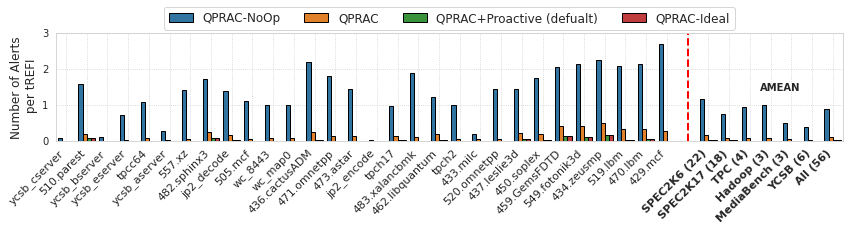

In [57]:

# Filter DataFrame for Trh == 32
df_target = mean_df_abo_all[(mean_df_abo_all['num_RFM'] == 1)]

df_merged = df_target
print(df_merged)
# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['TREF_Ratio', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ', 'PRAC-Rand'], var_name='PRAC_Implementation', value_name='WS')
# interested_solutions = ["PRAC-PQ-NoOpREF", "PRAC-Rand-NoOpREF", "PRAC-PQ", "PRAC-Rand", "PRAC-Ideal"]

df_melted = pd.melt(df_merged, id_vars=['workload'], value_vars=["PRAC-PQ-NoOpREF", "PQ-NOPRO", "PRAC-PQ", "PRAC-Ideal"], var_name='PRAC_Implementation', value_name='num_alert_tREFI')


rename_mapping = {
    'PRAC-PQ-NoOpREF': 'QPRAC-NoOp',
    'PQ-NOPRO': 'QPRAC',
    'PRAC-PQ': 'QPRAC+Proactive (defualt)',
    # 'PRAC-Rand': 'PQ-Rand',
    'PRAC-Ideal': 'QPRAC-Ideal'
}
# Replace the values in the PRAC_Implementation column
df_melted['PRAC_Implementation'] = df_melted['PRAC_Implementation'].replace(rename_mapping)

# Filter the data to show the results only for Med and High MPKI
workloads_high_mpki=  ['ycsb_cserver', '510.parest', 'ycsb_bserver', 'ycsb_eserver', 'tpcc64', 'ycsb_aserver', '557.xz', '482.sphinx3', 'jp2_decode', '505.mcf', 'wc_8443', 
                        'wc_map0', '436.cactusADM', '471.omnetpp', '473.astar', 'jp2_encode', 'tpch17', '483.xalancbmk', '462.libquantum', 'tpch2', '433.milc', '520.omnetpp', '437.leslie3d', 
                        '450.soplex', '459.GemsFDTD', '549.fotonik3d', '434.zeusmp', '519.lbm', '470.lbm', '429.mcf', 
                        # 'h264_decode', 'bfs_ny', 'bfs_cm2003', 'bfs_dblp', 
                        '', 'SPEC2K6 (22)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)',
                        'MediaBench (3)', 
                        # 'LonestarGPU (3)', 'MediaBench (4)', 
                        'YCSB (6)', 'All (56)']

df_high_mpki = df_melted[df_melted['workload'].isin(workloads_high_mpki)]

# methods_intersted = ["PQ-NoOp", "PQ-NoPro", "PQ", "PQ-Rand", "PQ-Ideal"]
methods_intersted = ["QPRAC-NoOp", "QPRAC", "QPRAC+Proactive (defualt)", "QPRAC-Ideal"] # Further remove PQ-NoOp if we think we don't need to evalue this in the result section
df_filtered = df_high_mpki[df_high_mpki['PRAC_Implementation'].isin(methods_intersted)]
df_filtered['PRAC_Implementation'] = pd.Categorical(df_filtered['PRAC_Implementation'], categories=methods_intersted, ordered=True)

print(df_filtered)
df_filtered.to_csv('./csv_input_for_plots/4core_nabo_num_of_Alerts_1RFM_64Tabo_4queue.csv', index=False)
# print(df_melted[df_melted['workload'] == '433.milc'])

sns.set_style("whitegrid")

df_filtered = pd.read_csv('./csv_input_for_plots/4core_nabo_num_of_Alerts_1RFM_64Tabo_4queue.csv')

fig, ax = plt.subplots(figsize=(12,3.7))
plt.rc('font', size=10)
xtick_order = workloads_high_mpki

ax = sns.barplot(x='workload', y='num_alert_tREFI',hue='PRAC_Implementation', data=df_filtered, order=xtick_order, edgecolor='black')
# y_ticks = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
# ax.set_yticks(y_ticks)
# ax.set_yticklabels(y_ticks, fontsize = 10)
ax.set_xticks(np.arange(len(xtick_order)))
ax.set_xticklabels(xtick_order, ha='right', rotation=45, fontsize = 11)

# Get the positions of the x-ticks
tick_labels = ax.get_xticklabels()

# Find the positions of geomean labels
# geomean_labels = ['SPEC2K6 (22)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)', 'LonestarGPU (3)', 'MediaBench (4)', 'YCSB (6)', 'All-60']
geomean_labels = ['SPEC2K6 (22)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)', 'MediaBench (3)', 'YCSB (6)', 'All (56)']
for tick_label in tick_labels:
    if tick_label.get_text() in geomean_labels:
        tick_label.set_fontweight('bold')

# ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
ax.axvline(30, 0, 1, color='red', linestyle = '--', linewidth=2)
ax.text(33.5, 1.4, 'AMEAN', fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('Number of Alerts\n per tREFI', fontsize=12)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=5, fancybox=True, shadow=False, fontsize=12)
# plt.yscale('log')
# Hide the legend
# ax.legend().set_visible(False)
# ax.set_ylim(0.0,1)
ax.set_ylim(0, 3.0)
plt.grid(True, linestyle=':')

plt.tight_layout()
# plt.show()
fig.savefig('./figures/Num_Alerts_per_tREFI_results_32BO_1RFM_4Queue.pdf', dpi=600, bbox_inches='tight')

In [46]:
df = df_ws.pivot(index=['num_RFM','TREF_Ratio','workload'], columns=['mitigation'], values='WS').reset_index()     

# Process Baseline results here
baseline_df = pd.DataFrame(columns=['workload', 'PRAC_wo_mitigation_WS'])
baseline_result_list = [x[:-4] for x in os.listdir(prac_latency_overhead_only_path) if x.endswith(".txt")]
for result_filename in baseline_result_list:
    result_file = open(prac_latency_overhead_only_path + result_filename + ".txt", "r")
    trh = int(result_filename.split("_")[0])
    if trh != 32:
         continue
    # workload = result_filename.split("_")[1:]
    workload = "_".join(result_filename.split("_")[1:])

    ipc_0 = 0
    ipc_1 = 0
    ipc_2 = 0
    ipc_3 = 0
    cycle_0 = 0
    cycle_1 = 0
    cycle_2 = 0
    cycle_3 = 0
    num_inst_0=0
    num_inst_1=0
    num_inst_2=0
    num_inst_3=0
    for line in result_file.readlines():
        if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_1:" in line):
                cycle_1 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_2:" in line):
                cycle_2 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_3:" in line):
                cycle_3 = int(line.split(" ")[-1])
        if (" insts_recorded_core_0" in line):
            num_inst_0 = int(line.split(" ")[-1])
        if (" insts_recorded_core_1" in line):
            num_inst_1 = int(line.split(" ")[-1])
        if (" insts_recorded_core_2" in line):
            num_inst_2 = int(line.split(" ")[-1])
        if (" insts_recorded_core_3" in line):
            num_inst_3 = int(line.split(" ")[-1])
    if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
        continue
    if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
        print("Error: " + result_filename)
    ipc_0 = int(num_inst_0) / cycle_0
    ipc_1 = int(num_inst_1) / cycle_1
    ipc_2 = int(num_inst_2) / cycle_2
    ipc_3 = int(num_inst_3) / cycle_3

    # print(workload)
    # print(ipc)

    result_file.close()
    baseline_df = baseline_df.append({"workload": workload, "PRAC_wo_mitigation_WS": ipc_0+ipc_1+ipc_2+ipc_3}, ignore_index=True)



# print(baseline_df)

df = df.merge(baseline_df, on='workload', how='left')

mitigation_list = ["PRAC-PQ-NoOpREF", "PQ-NOPRO", "PRAC-PQ", "PRAC-Ideal"]
for mitigation in set(mitigation_list) - set(['PRAC_wo_mitigation_WS']):
     df[mitigation] = df[mitigation] / df['PRAC_wo_mitigation_WS']
df.drop(columns=['PRAC_wo_mitigation_WS'], inplace=True)


workload_interests = ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk', 
                      '500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz',
                      'tpcc64', 'tpch17', 'tpch2', 'tpch6',
                      'grep_map0', 'wc_8443', 'wc_map0',
                    #   'bfs_dblp', 'bfs_cm2003','bfs_ny',
                    #   'h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'
                      'h264_encode', 'jp2_decode', 'jp2_encode',
                      'ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'
                      ]

df_interest = df[df['workload'].isin(workload_interests)]

# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (22)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 22
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    # 'LonestarGPU (3)': ['bfs_dblp', 'bfsbfs_cm2003_cm_2003','bfs_ny'], #lnestargpu: 3
    # 'MediaBench (4)': ['h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 4
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
# Function to calculate geometric mean
def calculate_geometric_mean(series):
    return np.prod(series) ** (1 / len(series))

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for trh in df['num_RFM'].unique():
        for suite_name, workloads in benchmark_suites.items():
            suite_df = df[df['workload'].isin(workloads) & (df['num_RFM'] == trh)]
            if not suite_df.empty:
                geomean_prac_ideal = calculate_geometric_mean(suite_df['PRAC-Ideal'])
                geomean_prac_pq = calculate_geometric_mean(suite_df['PRAC-PQ'])
                # geomean_prac_rand = calculate_geometric_mean(suite_df['PRAC-Rand'])
                geomean_prac_pq_no_ref = calculate_geometric_mean(suite_df['PRAC-PQ-NoOpREF'])
                geomean_prac_pq_no_proactive = calculate_geometric_mean(suite_df['PQ-NOPRO'])
                geomean_df = geomean_df.append({
                    'num_RFM': trh,
                    'workload': suite_name,
                    'PRAC-Ideal': geomean_prac_ideal,
                    'PRAC-PQ': geomean_prac_pq,
                    # 'PRAC-Rand': geomean_prac_rand,
                    'PQ-NOPRO': geomean_prac_pq_no_proactive,
                    'PRAC-PQ-NoOpREF': geomean_prac_pq_no_ref,
                }, ignore_index=True)
    
    return df.append(geomean_df, ignore_index=True)

# Call function to calculate and merge geometric means
geomean_df = add_geomean_rows(df_interest)


# Function to add 'All-60' rows for each trh value
def add_all_workloads_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for trh in df['num_RFM'].unique():
        trh_df = df[df['num_RFM'] == trh]
        geomean_prac_ideal = calculate_geometric_mean(trh_df['PRAC-Ideal'])
        geomean_prac_pq = calculate_geometric_mean(trh_df['PRAC-PQ'])
        # geomean_prac_rand = calculate_geometric_mean(trh_df['PRAC-Rand'])
        geomean_prac_pq_no_proactive = calculate_geometric_mean(trh_df['PQ-NOPRO'])
        geomean_prac_pq_no_ref = calculate_geometric_mean(trh_df['PRAC-PQ-NoOpREF'])

        
        all_workloads_geomean_df = pd.DataFrame({
            'num_RFM': [trh],
            'workload': ['All (56)'],
            'PRAC-Ideal': [geomean_prac_ideal],
            'PRAC-PQ': [geomean_prac_pq],
            # 'PRAC-Rand': [geomean_prac_rand],
            'PQ-NOPRO': [geomean_prac_pq_no_proactive],
            'PRAC-PQ-NoOpREF': [geomean_prac_pq_no_ref],
        })
        
        geomean_df = pd.concat([geomean_df, all_workloads_geomean_df], ignore_index=True)
    
    return pd.concat([df, geomean_df], ignore_index=True)

geomean_df = add_all_workloads_geomean_rows(geomean_df)
print(geomean_df)
print(geomean_df[geomean_df['workload'] == 'All (56)'])
geomean_df[['num_RFM','workload','PRAC-Ideal','PRAC-PQ']].to_csv('./num_RFM_study_results_4cores_ABO32.csv', index=False)

    num_RFM  TREF_Ratio        workload  PQ-NOPRO  PRAC-Ideal   PRAC-PQ  \
0         1        32.0       401.bzip2  0.983807    1.002006  0.994516   
1         1        32.0         403.gcc  0.998998    1.000000  1.000000   
2         1        32.0         429.mcf  0.935988    0.999257  0.999035   
3         1        32.0        433.milc  0.988458    1.000113  0.999224   
4         1        32.0      434.zeusmp  0.873981    0.957308  0.958338   
..      ...         ...             ...       ...         ...       ...   
184       4         NaN  MediaBench (3)  0.978478    0.991946  0.991711   
185       4         NaN        YCSB (6)  0.990238    1.000000  1.000000   
186       1         NaN        All (56)  0.976120    0.996114  0.995746   
187       2         NaN        All (56)  0.969647    0.993174  0.993419   
188       4         NaN        All (56)  0.956451    0.986516  0.986158   

     PRAC-PQ-NoOpREF  
0           0.796672  
1           0.993550  
2           0.338025  
3      

['AR PL UMing CN', 'Abyssinica SIL', 'C059', 'C059', 'C059', 'C059', 'Caladea', 'Caladea', 'Caladea', 'Caladea', 'Cantarell', 'Cantarell', 'Cantarell', 'Cantarell', 'Carlito', 'Carlito', 'Carlito', 'Carlito', 'D050000L', 'David CLM', 'David CLM', 'David CLM', 'David CLM', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif Display', 'FontAwesome', 'FontAwesome', 'Frank Ruehl CLM', 'Frank Ruehl CLM', 'Frank Ruehl CLM', 'Frank Ruehl CLM', 'FreeMono', 'FreeMono', 'Fr

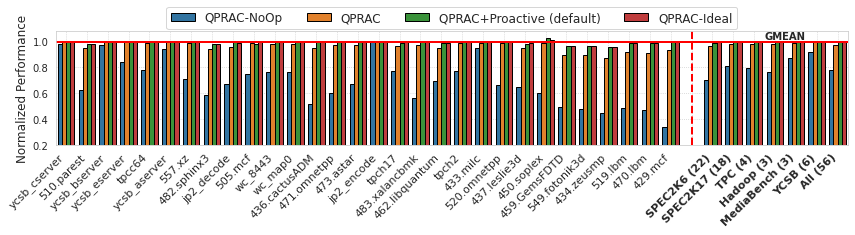

In [47]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# List all available font names
available_fonts = sorted([f.name for f in fm.fontManager.ttflist])
print(available_fonts)
# Filter DataFrame for Trh == 32
df_target = geomean_df[(geomean_df['num_RFM'] == 1)]

df_merged = df_target
print(df_merged)

df_melted = pd.melt(df_merged, id_vars=['workload'], value_vars=["PRAC-PQ-NoOpREF", "PQ-NOPRO", "PRAC-PQ", "PRAC-Ideal"], var_name='PRAC_Implementation', value_name='WS')


rename_mapping = {
    'PRAC-PQ-NoOpREF': 'QPRAC-NoOp',
    'PQ-NOPRO': 'QPRAC',
    'PRAC-PQ': 'QPRAC+Proactive (default)',
    # 'PRAC-Rand': 'PQ-Rand',
    'PRAC-Ideal': 'QPRAC-Ideal'
}
# Replace the values in the PRAC_Implementation column
df_melted['PRAC_Implementation'] = df_melted['PRAC_Implementation'].replace(rename_mapping)

df_melted.to_csv('./csv_input_for_plots/performance_results_4cores_ABO32_1proactive_per_tREFI.csv', index=False)

# Filter the data to show the results only for Med and High MPKI
workloads_high_mpki=  ['ycsb_cserver', '510.parest', 'ycsb_bserver', 'ycsb_eserver', 'tpcc64', 'ycsb_aserver', '557.xz', '482.sphinx3', 'jp2_decode', '505.mcf', 'wc_8443', 
                        'wc_map0', '436.cactusADM', '471.omnetpp', '473.astar', 'jp2_encode', 'tpch17', '483.xalancbmk', '462.libquantum', 'tpch2', '433.milc', '520.omnetpp', '437.leslie3d', 
                        '450.soplex', '459.GemsFDTD', '549.fotonik3d', '434.zeusmp', '519.lbm', '470.lbm', '429.mcf', 
                        # 'h264_decode', 'bfs_ny', 'bfs_cm2003', 'bfs_dblp', 
                        '', 'SPEC2K6 (22)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)',
                        'MediaBench (3)', 
                        # 'LonestarGPU (3)', 'MediaBench (4)', 
                        'YCSB (6)', 'All (56)']

df_high_mpki = df_melted[df_melted['workload'].isin(workloads_high_mpki)]

# methods_intersted = ["PQ-NoOp", "PQ-NoPro", "PQ", "PQ-Rand", "PQ-Ideal"]
methods_intersted = ["QPRAC-NoOp", "QPRAC", "QPRAC+Proactive (default)", "QPRAC-Ideal"] # Further remove PQ-NoOp if we think we don't need to evalue this in the result section
df_filtered = df_high_mpki[df_high_mpki['PRAC_Implementation'].isin(methods_intersted)]
df_filtered['PRAC_Implementation'] = pd.Categorical(df_filtered['PRAC_Implementation'], categories=methods_intersted, ordered=True)

# print(df_melted[df_melted['workload'] == '433.milc'])

sns.set_palette('tab10')
sns.set_style("whitegrid")

# Set the global font family
plt.rcParams['font.family'] = 'DejaVu Sans'  # Change to your desired font

fig, ax = plt.subplots(figsize=(12,3.7))
plt.rc('font', size=10)
xtick_order = workloads_high_mpki


ax = sns.barplot(x='workload', y='WS',hue='PRAC_Implementation', data=df_filtered, order=xtick_order, edgecolor='black')
# y_ticks = [0.2, 0.4, 0.6, 0.8, 1.0]
# ax.set_yticks(y_ticks)
# ax.set_yticklabels(y_ticks, fontsize = 10)
ax.set_xticks(np.arange(len(xtick_order)))
ax.set_xticklabels(xtick_order, ha='right', rotation=45, fontsize = 11)


# Get the positions of the x-ticks
tick_labels = ax.get_xticklabels()

# Find the positions of geomean labels
# geomean_labels = ['SPEC2K6 (22)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)', 'LonestarGPU (3)', 'MediaBench (4)', 'YCSB (6)', 'All-60']
geomean_labels = ['SPEC2K6 (22)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)', 'MediaBench (3)', 'YCSB (6)', 'All (56)']
for tick_label in tick_labels:
    if tick_label.get_text() in geomean_labels:
        tick_label.set_fontweight('bold')

ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
ax.axvline(30, 0, 1, color='red', linestyle = '--', linewidth=2)
ax.text(33.5, 1.02, 'GMEAN', fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('Normalized Performance', fontsize=12)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.27), ncol=5, fancybox=True, shadow=False, fontsize=12)


ax.set_ylim(0.2,1.08)

plt.grid(True, linestyle=':')
plt.tight_layout()
# plt.show()
fig.savefig('./figures/Performance_Results_32BO_1RFM_4Queue.pdf', dpi=600, bbox_inches='tight')

**RFM per ABO study**

**ABO==64 w/ 1 mitigation per 1 tREFI**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
multicore_4cores_out_path = "../mitigation_overhead_study/ABO_study/results_4cores/target_ref_per_1trefi"
prac_latency_overhead_only_path = "../mitigation_overhead_study/results_4cores/robaracoch_mapping/PRAC_WO_Mitigation/stats/"
# no_proactive_4cores_out_path = "../mitigation_overhead_study/queue_size_study/results_4cores/robaracoch_mapping/32BOTh/no_proactive_mitiagtion"

# singlecore_out_path = "../mitigation_enabled/results_singlecore/adaptive_closed_page"

df = pd.DataFrame(columns=["mitigation", "num_RFM", "workload", "WS"])
mitigation_list = ["PRAC-PQ-NoOpREF", "PQ-NOPRO", "PRAC-PQ", "PRAC-Ideal"]
for num_rfm in [1,2,4]:
    for mitigation in mitigation_list:
        result_path = multicore_4cores_out_path + "/" + str(num_rfm) +"rfm_per_alert/" + mitigation +"/stats/"
        result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
        for result_filename in result_list:
            result_file = open(result_path + result_filename + ".txt", "r")
            trh = int(result_filename.split("_")[0])
            if trh != 32:
                continue
            # workload = result_filename.split("_")[1:]
            workload = "_".join(result_filename.split("_")[1:])

            ipc_0 = 0
            ipc_1 = 0
            ipc_2 = 0
            ipc_3 = 0
            cycle_0 = 0
            cycle_1 = 0
            cycle_2 = 0
            cycle_3 = 0
            num_inst_0=0
            num_inst_1=0
            num_inst_2=0
            num_inst_3=0
            num_abo=0
            num_tREFI_period=0
            for line in result_file.readlines():
                if (" cycles_recorded_core_0:" in line):
                    cycle_0 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_1:" in line):
                    cycle_1 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_2:" in line):
                    cycle_2 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_3:" in line):
                    cycle_3 = int(line.split(" ")[-1])
                if (" insts_recorded_core_0" in line):
                    num_inst_0 = int(line.split(" ")[-1])
                if (" insts_recorded_core_1" in line):
                    num_inst_1 = int(line.split(" ")[-1])
                if (" insts_recorded_core_2" in line):
                    num_inst_2 = int(line.split(" ")[-1])
                if (" insts_recorded_core_3" in line):
                    num_inst_3 = int(line.split(" ")[-1])
                if (" prac_num_recovery" in line):
                    num_abo = int(line.split(" ")[-1])
                if (" num_refresh_command_0" in line):
                    num_tREFI_period = int(line.split(" ")[-1])
            if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
                continue
            if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
                print("Error: " + result_filename)
            ipc_0 = int(num_inst_0) / cycle_0
            ipc_1 = int(num_inst_1) / cycle_1
            ipc_2 = int(num_inst_2) / cycle_2
            ipc_3 = int(num_inst_3) / cycle_3
            num_abo_per_trefi = int(num_abo) / int(num_tREFI_period)

            # print(workload)
            # print(ipc)

            result_file.close()
            df = df.append({'mitigation': mitigation, 'num_RFM': num_rfm, "workload": workload, "WS": ipc_0+ipc_1+ipc_2+ipc_3, "num_abo_trefi": num_abo_per_trefi}, ignore_index=True)
df_ws = df
df_num_abo = df.pivot(index=['num_RFM','workload'], columns=['mitigation'], values='num_abo_trefi').reset_index()    

# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (22)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 22
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    # 'LonestarGPU (3)': ['bfs_dblp', 'bfsbfs_cm2003_cm_2003','bfs_ny'], #lnestargpu: 3
    # 'MediaBench (4)': ['h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 4
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
# Function to calculate geometric mean
def calculate_geometric_mean(series):
    return series.mean()

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for trh in df['num_RFM'].unique():
        for suite_name, workloads in benchmark_suites.items():
            suite_df = df[df['workload'].isin(workloads) & (df['num_RFM'] == trh)]
            if not suite_df.empty:
                geomean_prac_ideal = calculate_geometric_mean(suite_df['PRAC-Ideal'])
                geomean_prac_pq = calculate_geometric_mean(suite_df['PRAC-PQ'])
                # geomean_prac_rand = calculate_geometric_mean(suite_df['PRAC-Rand'])
                geomean_prac_pq_no_ref = calculate_geometric_mean(suite_df['PRAC-PQ-NoOpREF'])
                geomean_prac_pq_no_proactive = calculate_geometric_mean(suite_df['PQ-NOPRO'])
                geomean_df = geomean_df.append({
                    'num_RFM': trh,
                    'workload': suite_name,
                    'PRAC-Ideal': geomean_prac_ideal,
                    'PRAC-PQ': geomean_prac_pq,
                    # 'PRAC-Rand': geomean_prac_rand,
                    'PQ-NOPRO': geomean_prac_pq_no_proactive,
                    'PRAC-PQ-NoOpREF': geomean_prac_pq_no_ref,
                }, ignore_index=True)
    
    return df.append(geomean_df, ignore_index=True)

# Call function to calculate and merge geometric means
mean_df = add_geomean_rows(df_num_abo)


# Function to add 'All-60' rows for each trh value
def add_all_workloads_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for trh in df['num_RFM'].unique():
        trh_df = df[df['num_RFM'] == trh]
        geomean_prac_ideal = calculate_geometric_mean(trh_df['PRAC-Ideal'])
        geomean_prac_pq = calculate_geometric_mean(trh_df['PRAC-PQ'])
        # geomean_prac_rand = calculate_geometric_mean(trh_df['PRAC-Rand'])
        geomean_prac_pq_no_proactive = calculate_geometric_mean(trh_df['PQ-NOPRO'])
        geomean_prac_pq_no_ref = calculate_geometric_mean(trh_df['PRAC-PQ-NoOpREF'])

        
        all_workloads_geomean_df = pd.DataFrame({
            'num_RFM': [trh],
            'workload': ['All (56)'],
            'PRAC-Ideal': [geomean_prac_ideal],
            'PRAC-PQ': [geomean_prac_pq],
            # 'PRAC-Rand': [geomean_prac_rand],
            'PQ-NOPRO': [geomean_prac_pq_no_proactive],
            'PRAC-PQ-NoOpREF': [geomean_prac_pq_no_ref],
        })
        
        geomean_df = pd.concat([geomean_df, all_workloads_geomean_df], ignore_index=True)
    
    return pd.concat([df, geomean_df], ignore_index=True)

mean_df_abo_all = add_all_workloads_geomean_rows(mean_df)
print(mean_df_abo_all[mean_df_abo_all['workload'] == 'All (56)'])

mitigation num_RFM  workload  PQ-NOPRO  PRAC-Ideal   PRAC-PQ  PRAC-PQ-NoOpREF
189              1  All (56)  0.108702    0.018538  0.018570         0.868383
190              2  All (56)  0.068563    0.016104  0.016055         0.655977
191              4  All (56)  0.050428    0.014929  0.015035         0.454622


In [117]:

df = df_ws.pivot(index=['num_RFM','workload'], columns=['mitigation'], values='WS').reset_index()     
# Process Baseline results here
baseline_df = pd.DataFrame(columns=['workload', 'PRAC_wo_mitigation_WS'])
baseline_result_list = [x[:-4] for x in os.listdir(prac_latency_overhead_only_path) if x.endswith(".txt")]
for result_filename in baseline_result_list:
    result_file = open(prac_latency_overhead_only_path + result_filename + ".txt", "r")
    trh = int(result_filename.split("_")[0])
    if trh != 32:
         continue
    # workload = result_filename.split("_")[1:]
    workload = "_".join(result_filename.split("_")[1:])

    ipc_0 = 0
    ipc_1 = 0
    ipc_2 = 0
    ipc_3 = 0
    cycle_0 = 0
    cycle_1 = 0
    cycle_2 = 0
    cycle_3 = 0
    num_inst_0=0
    num_inst_1=0
    num_inst_2=0
    num_inst_3=0
    for line in result_file.readlines():
        if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_1:" in line):
                cycle_1 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_2:" in line):
                cycle_2 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_3:" in line):
                cycle_3 = int(line.split(" ")[-1])
        if (" insts_recorded_core_0" in line):
            num_inst_0 = int(line.split(" ")[-1])
        if (" insts_recorded_core_1" in line):
            num_inst_1 = int(line.split(" ")[-1])
        if (" insts_recorded_core_2" in line):
            num_inst_2 = int(line.split(" ")[-1])
        if (" insts_recorded_core_3" in line):
            num_inst_3 = int(line.split(" ")[-1])
    if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
        continue
    if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
        print("Error: " + result_filename)
    ipc_0 = int(num_inst_0) / cycle_0
    ipc_1 = int(num_inst_1) / cycle_1
    ipc_2 = int(num_inst_2) / cycle_2
    ipc_3 = int(num_inst_3) / cycle_3

    # print(workload)
    # print(ipc)

    result_file.close()
    baseline_df = baseline_df.append({"workload": workload, "PRAC_wo_mitigation_WS": ipc_0+ipc_1+ipc_2+ipc_3}, ignore_index=True)



# print(baseline_df)

df = df.merge(baseline_df, on='workload', how='left')

mitigation_list = ["PRAC-PQ-NoOpREF", "PQ-NOPRO", "PRAC-PQ", "PRAC-Ideal"]
for mitigation in set(mitigation_list) - set(['PRAC_wo_mitigation_WS']):
     df[mitigation] = df[mitigation] / df['PRAC_wo_mitigation_WS']
df.drop(columns=['PRAC_wo_mitigation_WS'], inplace=True)


workload_interests = ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk', 
                      '500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz',
                      'tpcc64', 'tpch17', 'tpch2', 'tpch6',
                      'grep_map0', 'wc_8443', 'wc_map0',
                    #   'bfs_dblp', 'bfs_cm2003','bfs_ny',
                    #   'h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'
                      'h264_encode', 'jp2_decode', 'jp2_encode',
                      'ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'
                      ]

df_interest = df[df['workload'].isin(workload_interests)]

# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (22)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 22
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    # 'LonestarGPU (3)': ['bfs_dblp', 'bfsbfs_cm2003_cm_2003','bfs_ny'], #lnestargpu: 3
    # 'MediaBench (4)': ['h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 4
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
# Function to calculate geometric mean
def calculate_geometric_mean(series):
    return np.prod(series) ** (1 / len(series))

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for trh in df['num_RFM'].unique():
        for suite_name, workloads in benchmark_suites.items():
            suite_df = df[df['workload'].isin(workloads) & (df['num_RFM'] == trh)]
            if not suite_df.empty:
                geomean_prac_ideal = calculate_geometric_mean(suite_df['PRAC-Ideal'])
                geomean_prac_pq = calculate_geometric_mean(suite_df['PRAC-PQ'])
                # geomean_prac_rand = calculate_geometric_mean(suite_df['PRAC-Rand'])
                geomean_prac_pq_no_ref = calculate_geometric_mean(suite_df['PRAC-PQ-NoOpREF'])
                geomean_prac_pq_no_proactive = calculate_geometric_mean(suite_df['PQ-NOPRO'])
                geomean_df = geomean_df.append({
                    'num_RFM': trh,
                    'workload': suite_name,
                    'PRAC-Ideal': geomean_prac_ideal,
                    'PRAC-PQ': geomean_prac_pq,
                    # 'PRAC-Rand': geomean_prac_rand,
                    'PQ-NOPRO': geomean_prac_pq_no_proactive,
                    'PRAC-PQ-NoOpREF': geomean_prac_pq_no_ref,
                }, ignore_index=True)
    
    return df.append(geomean_df, ignore_index=True)

# Call function to calculate and merge geometric means
geomean_df = add_geomean_rows(df_interest)


# Function to add 'All-60' rows for each trh value
def add_all_workloads_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for trh in df['num_RFM'].unique():
        trh_df = df[df['num_RFM'] == trh]
        geomean_prac_ideal = calculate_geometric_mean(trh_df['PRAC-Ideal'])
        geomean_prac_pq = calculate_geometric_mean(trh_df['PRAC-PQ'])
        # geomean_prac_rand = calculate_geometric_mean(trh_df['PRAC-Rand'])
        geomean_prac_pq_no_proactive = calculate_geometric_mean(trh_df['PQ-NOPRO'])
        geomean_prac_pq_no_ref = calculate_geometric_mean(trh_df['PRAC-PQ-NoOpREF'])

        
        all_workloads_geomean_df = pd.DataFrame({
            'num_RFM': [trh],
            'workload': ['All (56)'],
            'PRAC-Ideal': [geomean_prac_ideal],
            'PRAC-PQ': [geomean_prac_pq],
            # 'PRAC-Rand': [geomean_prac_rand],
            'PQ-NOPRO': [geomean_prac_pq_no_proactive],
            'PRAC-PQ-NoOpREF': [geomean_prac_pq_no_ref],
        })
        
        geomean_df = pd.concat([geomean_df, all_workloads_geomean_df], ignore_index=True)
    
    return pd.concat([df, geomean_df], ignore_index=True)

geomean_df = add_all_workloads_geomean_rows(geomean_df)
print(geomean_df)
print(geomean_df[geomean_df['workload'] == 'All (56)'])
geomean_df[['num_RFM','workload','PRAC-Ideal','PRAC-PQ']].to_csv('./num_RFM_study_results_4cores_ABO32.csv', index=False)

    num_RFM        workload  PQ-NOPRO  PRAC-Ideal   PRAC-PQ  PRAC-PQ-NoOpREF
0         1       401.bzip2  0.983807    1.002006  0.994516         0.796672
1         1         403.gcc  0.998998    1.000000  1.000000         0.993550
2         1         429.mcf  0.935988    0.999257  0.999035         0.338025
3         1        433.milc  0.988458    1.000113  0.999224         0.950529
4         1      434.zeusmp  0.873981    0.957308  0.958338         0.447875
..      ...             ...       ...         ...       ...              ...
184       4  MediaBench (3)  0.978478    0.991946  0.991711         0.696874
185       4        YCSB (6)  0.990238    1.000000  1.000000         0.734759
186       1        All (56)  0.976120    0.996114  0.995746         0.779714
187       2        All (56)  0.969647    0.993174  0.993419         0.663971
188       4        All (56)  0.956451    0.986516  0.986158         0.524722

[189 rows x 6 columns]
    num_RFM  workload  PQ-NOPRO  PRAC-Ideal   PRAC-P

    num_RFM  workload  PQ-NOPRO  PRAC-Ideal   PRAC-PQ  PRAC-PQ-NoOpREF
186       1  All (56)  0.976120    0.996114  0.995746         0.779714
187       2  All (56)  0.969647    0.993174  0.993419         0.663971
188       4  All (56)  0.956451    0.986516  0.986158         0.524722
  num_RFM  workload PRAC_Implementation        WS
0       1  All (56)            PQ-NOPRO  0.976120
1       2  All (56)            PQ-NOPRO  0.969647
2       4  All (56)            PQ-NOPRO  0.956451
3       1  All (56)             PRAC-PQ  0.995746
4       2  All (56)             PRAC-PQ  0.993419
5       4  All (56)             PRAC-PQ  0.986158
6       1  All (56)          PRAC-Ideal  0.996114
7       2  All (56)          PRAC-Ideal  0.993174
8       4  All (56)          PRAC-Ideal  0.986516


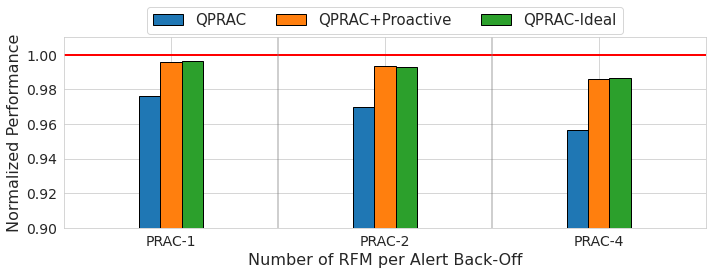

In [49]:
df_target = geomean_df[geomean_df['workload'] == 'All (56)']
print(df_target)

# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-PQ-NoOpREF', 'PQ-NOPRO', 'PRAC-PQ', 'PRAC-Rand', 'PRAC-Ideal'], var_name='PRAC_Implementation', value_name='WS')
df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PQ-NOPRO', 'PRAC-PQ', 'PRAC-Ideal'], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '429.mcf'])
rename_mapping = {
    'PRAC-PQ-NoOpREF': 'QPRAC-NoOp',
    'PQ-NOPRO': 'QPRAC',
    'PRAC-PQ': 'QPRAC+Proactive',
    'PRAC-Ideal': 'QPRAC-Ideal'
}
df_melted['PRAC_Implementation'] = df_melted['PRAC_Implementation'].replace(rename_mapping)

# Calculate performance overhead
df_melted['Performance_Overhead'] = (1 - df_melted['WS'])*100

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4))
plt.rc('font', size=10)
# Use Seaborn's 'tab10' color palette
palette = sns.color_palette("tab10")
colors = {impl: palette[i % len(palette)] for i, impl in enumerate(df_melted['PRAC_Implementation'].unique())}


# Define bar width and x-tick positions
bar_width = 0.1  # Desired smaller bar width
x_ticks = [1, 2, 4]
num_bars = len(df_melted['PRAC_Implementation'].unique())

# Create a mapping for x-tick labels
x_tick_labels = {1: 'PRAC-1', 2: 'PRAC-2', 4: 'PRAC-4'}

# Calculate positions for bars
# x_tick_positions = np.arange(len(x_ticks))  # Positions for x-ticks
x_tick_positions = np.linspace(0, len(x_ticks) - 1, len(x_ticks))  # Adjust spacing here
bar_positions = {}

# Calculate bar positions
for idx, tick in enumerate(x_ticks):
    base_x = x_tick_positions[idx]
    bar_positions[tick] = [base_x - (bar_width * num_bars) / 2 + j * bar_width for j in range(num_bars)]

# Plot bars
for tick in x_ticks:
    subset = df_melted[df_melted['num_RFM'] == tick]
    for i, prac_impl in enumerate(df_melted['PRAC_Implementation'].unique()):
        value = subset[subset['PRAC_Implementation'] == prac_impl]['WS'].values[0]
        x_position = bar_positions[tick][i] + bar_width / 2  # Adjust position for centering
        color = colors[prac_impl]
        ax.bar(x_position, value, width=bar_width, color=color, edgecolor='black', label=prac_impl if tick == x_ticks[0] else "")

# Add a horizontal line at y=1.0
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

# Customize legend, labels, and ticks
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels from the legend
ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=False, fontsize=15)
# Set xticks to specific num_RFM values and ensure correct spacing
ax.set_xticks(x_tick_positions)
ax.set_xticklabels([x_tick_labels[tick] for tick in x_ticks])  # Use mapped labels
ax.set_xlabel('Number of RFM per Alert Back-Off', fontsize=16)
ax.axvline(x=0.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=1.5, color='grey', linestyle='-', alpha=0.5)
ax.set_ylabel('Normalized Performance', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim(0.9, 1.01)
ax.set_xlim(-0.5, 2.5)

plt.tight_layout()
# plt.show()
fig.savefig('./figures/4cores_results_varying_RFM_32BO_4queue.pdf', dpi=600, bbox_inches='tight')

    num_RFM  TREF_Ratio  workload  PQ-NOPRO  PRAC-Ideal   PRAC-PQ  \
186       1         NaN  All (56)  0.976120    0.996114  0.995746   
187       2         NaN  All (56)  0.969647    0.993174  0.993419   
188       4         NaN  All (56)  0.956451    0.986516  0.986158   

     PRAC-PQ-NoOpREF  
186         0.779714  
187         0.663971  
188         0.524722  
  num_RFM  workload PRAC_Implementation        WS
0       1  All (56)            PQ-NOPRO  0.976120
1       2  All (56)            PQ-NOPRO  0.969647
2       4  All (56)            PQ-NOPRO  0.956451
3       1  All (56)             PRAC-PQ  0.995746
4       2  All (56)             PRAC-PQ  0.993419
5       4  All (56)             PRAC-PQ  0.986158
6       1  All (56)          PRAC-Ideal  0.996114
7       2  All (56)          PRAC-Ideal  0.993174
8       4  All (56)          PRAC-Ideal  0.986516


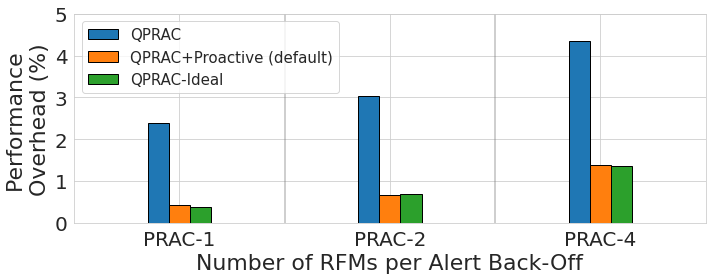

In [51]:
df_target = geomean_df[geomean_df['workload'] == 'All (56)']
print(df_target)

# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-PQ-NoOpREF', 'PQ-NOPRO', 'PRAC-PQ', 'PRAC-Rand', 'PRAC-Ideal'], var_name='PRAC_Implementation', value_name='WS')
df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PQ-NOPRO', 'PRAC-PQ', 'PRAC-Ideal'], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '429.mcf'])
rename_mapping = {
    'PRAC-PQ-NoOpREF': 'QPRAC-NoOp',
    'PQ-NOPRO': 'QPRAC',
    'PRAC-PQ': 'QPRAC+Proactive (default)',
    'PRAC-Ideal': 'QPRAC-Ideal'
}
df_melted['PRAC_Implementation'] = df_melted['PRAC_Implementation'].replace(rename_mapping)

# Calculate performance overhead
df_melted['Performance_Overhead'] = (1 - df_melted['WS'])*100

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4))
plt.rc('font', size=10)
# Use Seaborn's 'tab10' color palette
palette = sns.color_palette("tab10")
colors = {impl: palette[i % len(palette)] for i, impl in enumerate(df_melted['PRAC_Implementation'].unique())}


# Define bar width and x-tick positions
bar_width = 0.1  # Desired smaller bar width
x_ticks = [1, 2, 4]
num_bars = len(df_melted['PRAC_Implementation'].unique())
# Create a mapping for x-tick labels
x_tick_labels = {1: 'PRAC-1', 2: 'PRAC-2', 4: 'PRAC-4'}
# Calculate positions for bars
# x_tick_positions = np.arange(len(x_ticks))  # Positions for x-ticks
x_tick_positions = np.linspace(0, len(x_ticks) - 1, len(x_ticks))  # Adjust spacing here
bar_positions = {}

# Calculate bar positions
for idx, tick in enumerate(x_ticks):
    base_x = x_tick_positions[idx]
    bar_positions[tick] = [base_x - (bar_width * num_bars) / 2 + j * bar_width for j in range(num_bars)]

# Plot bars
for tick in x_ticks:
    subset = df_melted[df_melted['num_RFM'] == tick]
    for i, prac_impl in enumerate(df_melted['PRAC_Implementation'].unique()):
        value = subset[subset['PRAC_Implementation'] == prac_impl]['Performance_Overhead'].values[0]
        x_position = bar_positions[tick][i] + bar_width / 2  # Adjust position for centering
        color = colors[prac_impl]
        ax.bar(x_position, value, width=bar_width, color=color, edgecolor='black', label=prac_impl if tick == x_ticks[0] else "")

# Add a horizontal line at y=1.0
# ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

# Customize legend, labels, and ticks
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels from the legend
ax.legend(by_label.values(), by_label.keys(), loc='best', ncol=1, fancybox=True, shadow=False, fontsize=15)
# ax.legend(by_label.values(), by_label.keys(), loc='best', ncol=3, fancybox=True, shadow=False, fontsize=16)

# Set xticks to specific num_RFM values and ensure correct spacing
ax.set_xticks(x_tick_positions)
ax.set_xticklabels([x_tick_labels[tick] for tick in x_ticks])  # Use mapped labels
ax.axvline(x=0.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=1.5, color='grey', linestyle='-', alpha=0.5)
ax.set_xlabel('Number of RFMs per Alert Back-Off', fontsize=22)
ax.set_ylabel('Performance \nOverhead (%)', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylim(0, 5)
ax.set_xlim(-0.5, 2.5)

plt.tight_layout()
# plt.show()
fig.savefig('./figures/4cores_results_varying_RFM_32BO_4queue_PerfOverhead.pdf', dpi=600, bbox_inches='tight')

**NBO Sensitivity Study**

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
multicore_4cores_out_path = "../mitigation_overhead_study/ABO_study/results_4cores/target_ref_per_1trefi"
prac_latency_overhead_only_path = "../mitigation_overhead_study/results_4cores/robaracoch_mapping/PRAC_WO_Mitigation/stats/"
# no_proactive_4cores_out_path = "../mitigation_overhead_study/queue_size_study/results_4cores/robaracoch_mapping/32BOTh/no_proactive_mitiagtion"

# singlecore_out_path = "../mitigation_enabled/results_singlecore/adaptive_closed_page"

df = pd.DataFrame(columns=["mitigation", "num_RFM", "workload", "WS"])
mitigation_list = ["PRAC-PQ-NoOpREF", "PQ-NOPRO", "PRAC-PQ", "PRAC-Ideal"]
for num_rfm in [1,2,4]:
    if num_rfm != 1:
         continue
    for mitigation in mitigation_list:
        result_path = multicore_4cores_out_path + "/" + str(num_rfm) +"rfm_per_alert/" + mitigation +"/stats/"
        result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
        for result_filename in result_list:
            result_file = open(result_path + result_filename + ".txt", "r")
            trh = int(result_filename.split("_")[0])
            # workload = result_filename.split("_")[1:]
            workload = "_".join(result_filename.split("_")[1:])

            ipc_0 = 0
            ipc_1 = 0
            ipc_2 = 0
            ipc_3 = 0
            cycle_0 = 0
            cycle_1 = 0
            cycle_2 = 0
            cycle_3 = 0
            num_inst_0=0
            num_inst_1=0
            num_inst_2=0
            num_inst_3=0
            for line in result_file.readlines():
                if (" cycles_recorded_core_0:" in line):
                    cycle_0 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_1:" in line):
                    cycle_1 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_2:" in line):
                    cycle_2 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_3:" in line):
                    cycle_3 = int(line.split(" ")[-1])
                if (" insts_recorded_core_0" in line):
                    num_inst_0 = int(line.split(" ")[-1])
                if (" insts_recorded_core_1" in line):
                    num_inst_1 = int(line.split(" ")[-1])
                if (" insts_recorded_core_2" in line):
                    num_inst_2 = int(line.split(" ")[-1])
                if (" insts_recorded_core_3" in line):
                    num_inst_3 = int(line.split(" ")[-1])
            if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
                continue
            if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
                print("Error: " + result_filename)
            ipc_0 = int(num_inst_0) / cycle_0
            ipc_1 = int(num_inst_1) / cycle_1
            ipc_2 = int(num_inst_2) / cycle_2
            ipc_3 = int(num_inst_3) / cycle_3

            # print(workload)
            # print(ipc)

            result_file.close()
            df = df.append({'mitigation': mitigation, 'N_BO': int(trh), "workload": workload, "WS": ipc_0+ipc_1+ipc_2+ipc_3}, ignore_index=True)

df = df.pivot(index=['N_BO','workload'], columns=['mitigation'], values='WS').reset_index()     
# Process Baseline results here
baseline_df = pd.DataFrame(columns=['workload', 'PRAC_wo_mitigation_WS'])
baseline_result_list = [x[:-4] for x in os.listdir(prac_latency_overhead_only_path) if x.endswith(".txt")]
for result_filename in baseline_result_list:
    result_file = open(prac_latency_overhead_only_path + result_filename + ".txt", "r")
    trh = int(result_filename.split("_")[0])
    if trh != 64:
         continue
    # workload = result_filename.split("_")[1:]
    workload = "_".join(result_filename.split("_")[1:])

    ipc_0 = 0
    ipc_1 = 0
    ipc_2 = 0
    ipc_3 = 0
    cycle_0 = 0
    cycle_1 = 0
    cycle_2 = 0
    cycle_3 = 0
    num_inst_0=0
    num_inst_1=0
    num_inst_2=0
    num_inst_3=0
    for line in result_file.readlines():
        if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_1:" in line):
                cycle_1 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_2:" in line):
                cycle_2 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_3:" in line):
                cycle_3 = int(line.split(" ")[-1])
        if (" insts_recorded_core_0" in line):
            num_inst_0 = int(line.split(" ")[-1])
        if (" insts_recorded_core_1" in line):
            num_inst_1 = int(line.split(" ")[-1])
        if (" insts_recorded_core_2" in line):
            num_inst_2 = int(line.split(" ")[-1])
        if (" insts_recorded_core_3" in line):
            num_inst_3 = int(line.split(" ")[-1])
    if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
        continue
    if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
        print("Error: " + result_filename)
    ipc_0 = int(num_inst_0) / cycle_0
    ipc_1 = int(num_inst_1) / cycle_1
    ipc_2 = int(num_inst_2) / cycle_2
    ipc_3 = int(num_inst_3) / cycle_3

    # print(workload)
    # print(ipc)

    result_file.close()
    baseline_df = baseline_df.append({"workload": workload, "PRAC_wo_mitigation_WS": ipc_0+ipc_1+ipc_2+ipc_3}, ignore_index=True)



# print(baseline_df)

df = df.merge(baseline_df, on='workload', how='left')

mitigation_list = ["PRAC-PQ-NoOpREF", "PQ-NOPRO", "PRAC-PQ", "PRAC-Ideal"]
for mitigation in set(mitigation_list) - set(['PRAC_wo_mitigation_WS']):
     df[mitigation] = df[mitigation] / df['PRAC_wo_mitigation_WS']
df.drop(columns=['PRAC_wo_mitigation_WS'], inplace=True)


workload_interests = ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk', 
                      '500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz',
                      'tpcc64', 'tpch17', 'tpch2', 'tpch6',
                      'grep_map0', 'wc_8443', 'wc_map0',
                    #   'bfs_dblp', 'bfs_cm2003','bfs_ny',
                    #   'h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'
                      'h264_encode', 'jp2_decode', 'jp2_encode',
                      'ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'
                      ]

df_interest = df[df['workload'].isin(workload_interests)]

# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (22)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 22
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    # 'LonestarGPU (3)': ['bfs_dblp', 'bfsbfs_cm2003_cm_2003','bfs_ny'], #lnestargpu: 3
    # 'MediaBench (4)': ['h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 4
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
# Function to calculate geometric mean
def calculate_geometric_mean(series):
    return np.prod(series) ** (1 / len(series))

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for trh in df['N_BO'].unique():
        for suite_name, workloads in benchmark_suites.items():
            suite_df = df[df['workload'].isin(workloads) & (df['N_BO'] == trh)]
            if not suite_df.empty:
                geomean_prac_ideal = calculate_geometric_mean(suite_df['PRAC-Ideal'])
                geomean_prac_pq = calculate_geometric_mean(suite_df['PRAC-PQ'])
                # geomean_prac_rand = calculate_geometric_mean(suite_df['PRAC-Rand'])
                geomean_prac_pq_no_ref = calculate_geometric_mean(suite_df['PRAC-PQ-NoOpREF'])
                geomean_prac_pq_no_proactive = calculate_geometric_mean(suite_df['PQ-NOPRO'])
                geomean_df = geomean_df.append({
                    'N_BO': trh,
                    'workload': suite_name,
                    'PRAC-Ideal': geomean_prac_ideal,
                    'PRAC-PQ': geomean_prac_pq,
                    # 'PRAC-Rand': geomean_prac_rand,
                    'PQ-NOPRO': geomean_prac_pq_no_proactive,
                    'PRAC-PQ-NoOpREF': geomean_prac_pq_no_ref,
                }, ignore_index=True)
    
    return df.append(geomean_df, ignore_index=True)

# Call function to calculate and merge geometric means
geomean_df = add_geomean_rows(df_interest)


# Function to add 'All-60' rows for each trh value
def add_all_workloads_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for trh in df['N_BO'].unique():
        trh_df = df[df['N_BO'] == trh]
        geomean_prac_ideal = calculate_geometric_mean(trh_df['PRAC-Ideal'])
        geomean_prac_pq = calculate_geometric_mean(trh_df['PRAC-PQ'])
        # geomean_prac_rand = calculate_geometric_mean(trh_df['PRAC-Rand'])
        geomean_prac_pq_no_proactive = calculate_geometric_mean(trh_df['PQ-NOPRO'])
        geomean_prac_pq_no_ref = calculate_geometric_mean(trh_df['PRAC-PQ-NoOpREF'])

        
        all_workloads_geomean_df = pd.DataFrame({
            'N_BO': [trh],
            'workload': ['All (56)'],
            'PRAC-Ideal': [geomean_prac_ideal],
            'PRAC-PQ': [geomean_prac_pq],
            # 'PRAC-Rand': [geomean_prac_rand],
            'PQ-NOPRO': [geomean_prac_pq_no_proactive],
            'PRAC-PQ-NoOpREF': [geomean_prac_pq_no_ref],
        })
        
        geomean_df = pd.concat([geomean_df, all_workloads_geomean_df], ignore_index=True)
    
    return pd.concat([df, geomean_df], ignore_index=True)

geomean_df = add_all_workloads_geomean_rows(geomean_df)
geomean_df['N_BO'] = geomean_df['N_BO'].astype(int)

print(geomean_df)
print(geomean_df[geomean_df['workload'] == 'All (56)'])
# geomean_df[['N_BO','workload','PRAC-Ideal','PRAC-PQ']].to_csv('./num_RFM_study_results_4cores_ABO32.csv', index=False)

     N_BO    workload  PQ-NOPRO  PRAC-Ideal   PRAC-PQ  PRAC-PQ-NoOpREF
0      16   401.bzip2  0.934911    0.967434  0.956914         0.694815
1      16     403.gcc  0.996878    1.000000  1.000000         0.966550
2      16     429.mcf  0.853882    0.945774  0.943563         0.259422
3      16    433.milc  0.952647    0.983746  0.982854         0.704511
4      16  434.zeusmp  0.751112    0.817498  0.815386         0.330304
..    ...         ...       ...         ...       ...              ...
310    16    All (56)  0.911412    0.942079  0.942382         0.635122
311    32    All (56)  0.976120    0.996114  0.995746         0.779714
312    64    All (56)  0.994543    1.000010  1.000038         0.892082
313   128    All (56)  0.998533    1.000000  1.000000         0.958880
314   256    All (56)  0.999879    1.000000  1.000000         0.986006

[315 rows x 6 columns]
     N_BO  workload  PQ-NOPRO  PRAC-Ideal   PRAC-PQ  PRAC-PQ-NoOpREF
310    16  All (56)  0.911412    0.942079  0.942382    

     N_BO  workload  PQ-NOPRO  PRAC-Ideal   PRAC-PQ  PRAC-PQ-NoOpREF
310    16  All (56)  0.911412    0.942079  0.942382         0.635122
311    32  All (56)  0.976120    0.996114  0.995746         0.779714
312    64  All (56)  0.994543    1.000010  1.000038         0.892082
313   128  All (56)  0.998533    1.000000  1.000000         0.958880
    N_BO  workload PRAC_Implementation        WS
0     16  All (56)            PQ-NOPRO  0.911412
1     32  All (56)            PQ-NOPRO  0.976120
2     64  All (56)            PQ-NOPRO  0.994543
3    128  All (56)            PQ-NOPRO  0.998533
4     16  All (56)             PRAC-PQ  0.942382
5     32  All (56)             PRAC-PQ  0.995746
6     64  All (56)             PRAC-PQ  1.000038
7    128  All (56)             PRAC-PQ  1.000000
8     16  All (56)          PRAC-Ideal  0.942079
9     32  All (56)          PRAC-Ideal  0.996114
10    64  All (56)          PRAC-Ideal  1.000010
11   128  All (56)          PRAC-Ideal  1.000000


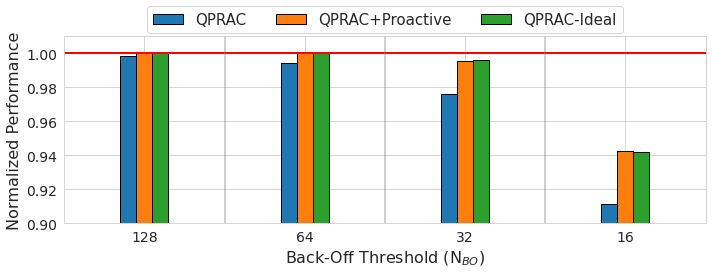

In [126]:
df_target = geomean_df[(geomean_df['workload'] == 'All (56)') & (geomean_df['N_BO'].isin([16,32,64,128]))]
print(df_target)

# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-PQ-NoOpREF', 'PQ-NOPRO', 'PRAC-PQ', 'PRAC-Rand', 'PRAC-Ideal'], var_name='PRAC_Implementation', value_name='WS')
df_melted = pd.melt(df_target, id_vars=['N_BO', 'workload'], value_vars=['PQ-NOPRO', 'PRAC-PQ', 'PRAC-Ideal'], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '429.mcf'])
rename_mapping = {
    'PRAC-PQ-NoOpREF': 'QPRAC-NoOp',
    'PQ-NOPRO': 'QPRAC',
    'PRAC-PQ': 'QPRAC+Proactive',
    # 'PRAC-Rand': 'QPRAC-Rand',
    'PRAC-Ideal': 'QPRAC-Ideal'
}

df_melted['PRAC_Implementation'] = df_melted['PRAC_Implementation'].replace(rename_mapping)

# Calculate performance overhead
df_melted['Performance_Overhead'] = (1 - df_melted['WS'])*100

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4))
plt.rc('font', size=10)
# Use Seaborn's 'tab10' color palette
palette = sns.color_palette("tab10")
colors = {impl: palette[i % len(palette)] for i, impl in enumerate(df_melted['PRAC_Implementation'].unique())}


# Define bar width and x-tick positions
bar_width = 0.1  # Desired smaller bar width
x_ticks = [128, 64, 32 ,16]
num_bars = len(df_melted['PRAC_Implementation'].unique())

# Calculate positions for bars
# x_tick_positions = np.arange(len(x_ticks))  # Positions for x-ticks
x_tick_positions = np.linspace(0, len(x_ticks) - 1, len(x_ticks))  # Adjust spacing here
bar_positions = {}

# Calculate bar positions
for idx, tick in enumerate(x_ticks):
    base_x = x_tick_positions[idx]
    bar_positions[tick] = [base_x - (bar_width * num_bars) / 2 + j * bar_width for j in range(num_bars)]

# Plot bars
for tick in x_ticks:
    subset = df_melted[df_melted['N_BO'] == tick]
    for i, prac_impl in enumerate(df_melted['PRAC_Implementation'].unique()):
        value = subset[subset['PRAC_Implementation'] == prac_impl]['WS'].values[0]
        x_position = bar_positions[tick][i] + bar_width / 2  # Adjust position for centering
        color = colors[prac_impl]
        ax.bar(x_position, value, width=bar_width, color=color, edgecolor='black', label=prac_impl if tick == x_ticks[0] else "")

# Add a horizontal line at y=1.0
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

# Customize legend, labels, and ticks
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels from the legend
ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=False, fontsize=15)

# Set xticks to specific num_RFM values and ensure correct spacing
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_ticks)
ax.axvline(x=0.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=1.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=2.5, color='grey', linestyle='-', alpha=0.5)
ax.set_xlabel('Back-Off Threshold (N$_{BO}$)', fontsize=16)
ax.set_ylabel('Normalized Performance', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim(0.9, 1.01)
ax.set_xlim(-0.5, 3.5)

plt.tight_layout()
fig.savefig('./figures/4cores_results_ABOStudy_8queue_1RFM_1TREF_per_tREFI_WS.pdf', dpi=600, bbox_inches='tight')

     N_BO  workload  PQ-NOPRO  PRAC-Ideal   PRAC-PQ  PRAC-PQ-NoOpREF
310    16  All (56)  0.911412    0.942079  0.942382         0.635122
311    32  All (56)  0.976120    0.996114  0.995746         0.779714
312    64  All (56)  0.994543    1.000010  1.000038         0.892082
313   128  All (56)  0.998533    1.000000  1.000000         0.958880
    N_BO  workload PRAC_Implementation        WS
0     16  All (56)            PQ-NOPRO  0.911412
1     32  All (56)            PQ-NOPRO  0.976120
2     64  All (56)            PQ-NOPRO  0.994543
3    128  All (56)            PQ-NOPRO  0.998533
4     16  All (56)             PRAC-PQ  0.942382
5     32  All (56)             PRAC-PQ  0.995746
6     64  All (56)             PRAC-PQ  1.000038
7    128  All (56)             PRAC-PQ  1.000000
8     16  All (56)          PRAC-Ideal  0.942079
9     32  All (56)          PRAC-Ideal  0.996114
10    64  All (56)          PRAC-Ideal  1.000010
11   128  All (56)          PRAC-Ideal  1.000000


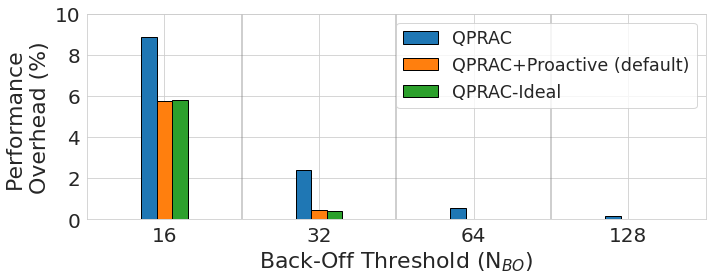

In [53]:
df_target = geomean_df[(geomean_df['workload'] == 'All (56)') & (geomean_df['N_BO'].isin([16,32,64,128]))]
print(df_target)

# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-PQ-NoOpREF', 'PQ-NOPRO', 'PRAC-PQ', 'PRAC-Rand', 'PRAC-Ideal'], var_name='PRAC_Implementation', value_name='WS')
df_melted = pd.melt(df_target, id_vars=['N_BO', 'workload'], value_vars=['PQ-NOPRO', 'PRAC-PQ', 'PRAC-Ideal'], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '429.mcf'])
rename_mapping = {
    'PRAC-PQ-NoOpREF': 'QPRAC-NoOp',
    'PQ-NOPRO': 'QPRAC',
    'PRAC-PQ': 'QPRAC+Proactive (default)',
    # 'PRAC-Rand': 'QPRAC-Rand',
    'PRAC-Ideal': 'QPRAC-Ideal'
}

df_melted['PRAC_Implementation'] = df_melted['PRAC_Implementation'].replace(rename_mapping)

# Calculate performance overhead
df_melted['Performance_Overhead'] = (1 - df_melted['WS'])*100

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4))
plt.rc('font', size=10)
# Use Seaborn's 'tab10' color palette
palette = sns.color_palette("tab10")
colors = {impl: palette[i % len(palette)] for i, impl in enumerate(df_melted['PRAC_Implementation'].unique())}


# Define bar width and x-tick positions
bar_width = 0.1  # Desired smaller bar width
# x_ticks = [128, 64, 32 ,16]
x_ticks = [16, 32, 64 ,128]
num_bars = len(df_melted['PRAC_Implementation'].unique())

# Calculate positions for bars
# x_tick_positions = np.arange(len(x_ticks))  # Positions for x-ticks
x_tick_positions = np.linspace(0, len(x_ticks) - 1, len(x_ticks))  # Adjust spacing here
bar_positions = {}

# Calculate bar positions
for idx, tick in enumerate(x_ticks):
    base_x = x_tick_positions[idx]
    bar_positions[tick] = [base_x - (bar_width * num_bars) / 2 + j * bar_width for j in range(num_bars)]

# Plot bars
for tick in x_ticks:
    subset = df_melted[df_melted['N_BO'] == tick]
    for i, prac_impl in enumerate(df_melted['PRAC_Implementation'].unique()):
        value = subset[subset['PRAC_Implementation'] == prac_impl]['Performance_Overhead'].values[0]
        x_position = bar_positions[tick][i] + bar_width / 2  # Adjust position for centering
        color = colors[prac_impl]
        ax.bar(x_position, value, width=bar_width, color=color, edgecolor='black', label=prac_impl if tick == x_ticks[0] else "")

# Add a horizontal line at y=1.0
# ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

# Customize legend, labels, and ticks
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels from the legend
ax.legend(by_label.values(), by_label.keys(), loc='best', ncol=1, fancybox=True, shadow=False, fontsize=17.5)
# Set xticks to specific num_RFM values and ensure correct spacing
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_ticks)
ax.axvline(x=0.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=1.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=2.5, color='grey', linestyle='-', alpha=0.5)
ax.set_xlabel('Back-Off Threshold (N$_{BO}$)', fontsize=22)
ax.set_ylabel('Performance \nOverhead (%)', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylim(0, 10)
ax.set_xlim(-0.5, 3.5)

plt.tight_layout()
fig.savefig('./figures/4cores_results_ABOStudy_8queue_1RFM_1TREF_per_tREFI_PerfOverhead.pdf', dpi=600, bbox_inches='tight')

     N_BO  workload  PQ-NOPRO  PRAC-Ideal   PRAC-PQ  PRAC-PQ-NoOpREF
310    16  All (56)  0.911412    0.942079  0.942382         0.635122
311    32  All (56)  0.976120    0.996114  0.995746         0.779714
312    64  All (56)  0.994543    1.000010  1.000038         0.892082
313   128  All (56)  0.998533    1.000000  1.000000         0.958880
    N_BO  workload PRAC_Implementation        WS
0     16  All (56)            PQ-NOPRO  0.911412
1     32  All (56)            PQ-NOPRO  0.976120
2     64  All (56)            PQ-NOPRO  0.994543
3    128  All (56)            PQ-NOPRO  0.998533
4     16  All (56)             PRAC-PQ  0.942382
5     32  All (56)             PRAC-PQ  0.995746
6     64  All (56)             PRAC-PQ  1.000038
7    128  All (56)             PRAC-PQ  1.000000
8     16  All (56)          PRAC-Ideal  0.942079
9     32  All (56)          PRAC-Ideal  0.996114
10    64  All (56)          PRAC-Ideal  1.000010
11   128  All (56)          PRAC-Ideal  1.000000


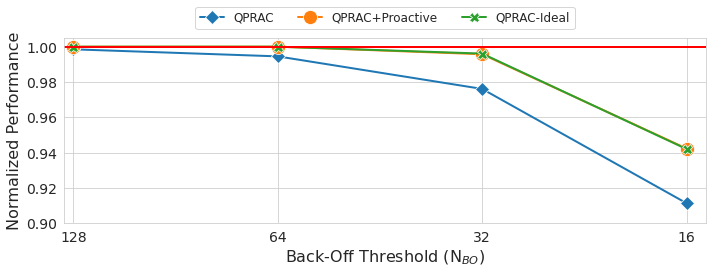

In [119]:
df_target = geomean_df[(geomean_df['workload'] == 'All (56)') & (geomean_df['N_BO'].isin([16,32,64,128]))]
print(df_target)

# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-PQ-NoOpREF', 'PQ-NOPRO', 'PRAC-PQ', 'PRAC-Rand', 'PRAC-Ideal'], var_name='PRAC_Implementation', value_name='WS')
df_melted = pd.melt(df_target, id_vars=['N_BO', 'workload'], value_vars=['PQ-NOPRO', 'PRAC-PQ', 'PRAC-Ideal'], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '429.mcf'])
rename_mapping = {
    'PRAC-PQ-NoOpREF': 'QPRAC-NoOp',
    'PQ-NOPRO': 'QPRAC',
    'PRAC-PQ': 'QPRAC+Proactive',
    # 'PRAC-Rand': 'QPRAC-Rand',
    'PRAC-Ideal': 'QPRAC-Ideal'
}





df_melted['PRAC_Implementation'] = df_melted['PRAC_Implementation'].replace(rename_mapping)
# Declare specific markers for each mitigation strategy
markers = {
    'QPRAC': 'D',          # Diamond
    'QPRAC+Proactive': 'o', # Cross
    'QPRAC-Ideal': 'X'     # Circle
}

sizes = {
    'QPRAC': 10,            # Marker size for QPRAC
    'QPRAC+Proactive': 14, # Marker size for QPRAC+Proactive
    'QPRAC-Ideal': 10      # Marker size for QPRAC-Ideal
}

sns.set_style("whitegrid")
# x_ticks = [1, 2, 4]

fig, ax = plt.subplots(figsize=(10,4))
# plt.xscale('log')
plt.rc('font', size=10)

# Plot lines with different styles and sizes
for method, marker in markers.items():
    method_data = df_melted[df_melted['PRAC_Implementation'] == method]
    sns.lineplot(x='N_BO', y='WS', data=method_data, 
                 label=method, 
                 marker=marker, 
                 markersize=sizes[method], 
                 linestyle='-', 
                 linewidth=2)



plt.xscale('log')
# Customizing the plot
x_ticks = [128, 64, 32, 16]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, fontsize=16)

ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=True, shadow=False, fontsize=12)
ax.set_xlabel('Back-Off Threshold (N$_{BO}$)', fontsize=16)
ax.set_ylabel('Normalized Performance', fontsize=16)
# Remove sub xticks
ax.xaxis.set_minor_locator(plt.NullLocator())

ax.tick_params(axis='both', which='major', labelsize=14)
# ax.axvline(x=0.5, color='grey', linestyle='-', alpha=0.5)
# ax.axvline(x=1.5, color='grey', linestyle='-', alpha=0.5)
# ax.axvline(x=2.5, color='grey', linestyle='-', alpha=0.5)
# ax.axvline(x=3.5, color='grey', linestyle='-', alpha=0.5)
ax.set_ylim(0.90,1.005)
ax.set_xlim(132,15)

plt.tight_layout()
# plt.show()
fig.savefig('./figures/4cores_results_ABOStudy_8queue_1RFM_1TREF_per_tREFI_lineplot.pdf', dpi=600, bbox_inches='tight')

**Data for ABO==32 w/o Proactive Mitigation**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
multicore_4cores_out_path = "../mitigation_overhead_study/RFM_per_ABO_study/32BO/results_4cores"
prac_latency_overhead_only_path = "../mitigation_overhead_study/results_4cores/robaracoch_mapping/PRAC_WO_Mitigation/stats/"
# singlecore_out_path = "../mitigation_enabled/results_singlecore/adaptive_closed_page"

df = pd.DataFrame(columns=["mitigation", "num_RFM", "workload", "WS"])
mitigation_list = ["PRAC-PQ-NoOpREF", "PRAC-Rand-NoOpREF", "PRAC-PQ", "PRAC-Rand", "PRAC-Ideal"]
for mitigation in mitigation_list:
    result_path = multicore_4cores_out_path + "/" + mitigation +"/stats/"
    result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
    for result_filename in result_list:
        result_file = open(result_path + result_filename + ".txt", "r")
        trh = int(result_filename.split("_")[0])
        # workload = result_filename.split("_")[1:]
        workload = "_".join(result_filename.split("_")[1:])

        ipc_0 = 0
        ipc_1 = 0
        ipc_2 = 0
        ipc_3 = 0
        cycle_0 = 0
        cycle_1 = 0
        cycle_2 = 0
        cycle_3 = 0
        num_inst_0=0
        num_inst_1=0
        num_inst_2=0
        num_inst_3=0
        for line in result_file.readlines():
            if (" cycles_recorded_core_0:" in line):
                 cycle_0 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_1:" in line):
                 cycle_1 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_2:" in line):
                 cycle_2 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_3:" in line):
                 cycle_3 = int(line.split(" ")[-1])
            if (" insts_recorded_core_0" in line):
                num_inst_0 = int(line.split(" ")[-1])
            if (" insts_recorded_core_1" in line):
                num_inst_1 = int(line.split(" ")[-1])
            if (" insts_recorded_core_2" in line):
                num_inst_2 = int(line.split(" ")[-1])
            if (" insts_recorded_core_3" in line):
                num_inst_3 = int(line.split(" ")[-1])
        if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
            continue
        if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
            print("Error: " + result_filename)
        ipc_0 = int(num_inst_0) / cycle_0
        ipc_1 = int(num_inst_1) / cycle_1
        ipc_2 = int(num_inst_2) / cycle_2
        ipc_3 = int(num_inst_3) / cycle_3

        # print(workload)
        # print(ipc)

        result_file.close()
        df = df.append({'mitigation': mitigation, 'num_RFM': trh, "workload": workload, "WS": ipc_0+ipc_1+ipc_2+ipc_3}, ignore_index=True)


df = df.pivot(index=['num_RFM','workload'], columns=['mitigation'], values='WS').reset_index()     

# Process Baseline results here
baseline_df = pd.DataFrame(columns=['workload', 'PRAC_wo_mitigation_WS'])
baseline_result_list = [x[:-4] for x in os.listdir(prac_latency_overhead_only_path) if x.endswith(".txt")]
for result_filename in baseline_result_list:
    result_file = open(prac_latency_overhead_only_path + result_filename + ".txt", "r")
    trh = int(result_filename.split("_")[0])
    if trh != 32:
         continue
    # workload = result_filename.split("_")[1:]
    workload = "_".join(result_filename.split("_")[1:])

    ipc_0 = 0
    ipc_1 = 0
    ipc_2 = 0
    ipc_3 = 0
    cycle_0 = 0
    cycle_1 = 0
    cycle_2 = 0
    cycle_3 = 0
    num_inst_0=0
    num_inst_1=0
    num_inst_2=0
    num_inst_3=0
    for line in result_file.readlines():
        if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_1:" in line):
                cycle_1 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_2:" in line):
                cycle_2 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_3:" in line):
                cycle_3 = int(line.split(" ")[-1])
        if (" insts_recorded_core_0" in line):
            num_inst_0 = int(line.split(" ")[-1])
        if (" insts_recorded_core_1" in line):
            num_inst_1 = int(line.split(" ")[-1])
        if (" insts_recorded_core_2" in line):
            num_inst_2 = int(line.split(" ")[-1])
        if (" insts_recorded_core_3" in line):
            num_inst_3 = int(line.split(" ")[-1])
    if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
        continue
    if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
        print("Error: " + result_filename)
    ipc_0 = int(num_inst_0) / cycle_0
    ipc_1 = int(num_inst_1) / cycle_1
    ipc_2 = int(num_inst_2) / cycle_2
    ipc_3 = int(num_inst_3) / cycle_3

    # print(workload)
    # print(ipc)

    result_file.close()
    baseline_df = baseline_df.append({"workload": workload, "PRAC_wo_mitigation_WS": ipc_0+ipc_1+ipc_2+ipc_3}, ignore_index=True)

# print(df)
# print(baseline_df)

df = df.merge(baseline_df, on='workload', how='left')
df["PRAC-PQ"] = df['PRAC-PQ'] / df['PRAC_wo_mitigation_WS']
df["PRAC-Ideal"] = df['PRAC-Ideal'] / df['PRAC_wo_mitigation_WS']
df["PRAC-Rand"] = df['PRAC-Rand'] / df['PRAC_wo_mitigation_WS']
df["PRAC-PQ-NoOpREF"] = df['PRAC-PQ-NoOpREF'] / df['PRAC_wo_mitigation_WS']
df["PRAC-Rand-NoOpREF"] = df['PRAC-PQ-NoOpREF'] / df['PRAC_wo_mitigation_WS']
df.drop(columns=['PRAC_wo_mitigation_WS'], inplace=True)
print(df)


workload_interests = ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk', 
                      '500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz',
                      'tpcc64', 'tpch17', 'tpch2', 'tpch6',
                      'grep_map0', 'wc_8443', 'wc_map0',
                    #   'bfs_dblp', 'bfs_cm2003','bfs_ny',
                    #   'h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'
                      'h264_encode', 'jp2_decode', 'jp2_encode',
                      'ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'
                      ]

df_interest = df[df['workload'].isin(workload_interests)]

# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (22)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 22
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    # 'LonestarGPU (3)': ['bfs_dblp', 'bfsbfs_cm2003_cm_2003','bfs_ny'], #lnestargpu: 3
    # 'MediaBench (4)': ['h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 4
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
# Function to calculate geometric mean
def calculate_geometric_mean(series):
    return np.prod(series) ** (1 / len(series))

interested_solutions = ["PRAC-PQ"]

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for trh in df['num_RFM'].unique():
        for suite_name, workloads in benchmark_suites.items():
            suite_df = df[df['workload'].isin(workloads) & (df['num_RFM'] == trh)]
            if not suite_df.empty:
                geomean_prac_ideal = calculate_geometric_mean(suite_df['PRAC-Ideal'])
                geomean_prac_pq = calculate_geometric_mean(suite_df['PRAC-PQ'])
                geomean_prac_rand = calculate_geometric_mean(suite_df['PRAC-Rand'])
                geomean_prac_pq_no_ref = calculate_geometric_mean(suite_df['PRAC-PQ-NoOpREF'])
                geomean_prac_rand_no_ref = calculate_geometric_mean(suite_df['PRAC-Rand-NoOpREF'])
                geomean_df = geomean_df.append({
                    'num_RFM': trh,
                    'workload': suite_name,
                    'PRAC-Ideal': geomean_prac_ideal,
                    'PRAC-PQ': geomean_prac_pq,
                    'PRAC-Rand': geomean_prac_rand,
                    'PRAC-Rand-NoOpREF': geomean_prac_rand_no_ref,
                    'PRAC-PQ-NoOpREF': geomean_prac_pq_no_ref,
                }, ignore_index=True)
    
    return df.append(geomean_df, ignore_index=True)

# Call function to calculate and merge geometric means
geomean_df = add_geomean_rows(df_interest)


# Function to add 'All-60' rows for each trh value
def add_all_workloads_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for trh in df['num_RFM'].unique():
        trh_df = df[df['num_RFM'] == trh]
        geomean_prac_ideal = calculate_geometric_mean(trh_df['PRAC-Ideal'])
        geomean_prac_pq = calculate_geometric_mean(trh_df['PRAC-PQ'])
        geomean_prac_rand = calculate_geometric_mean(trh_df['PRAC-Rand'])
        geomean_prac_pq_no_ref = calculate_geometric_mean(trh_df['PRAC-PQ-NoOpREF'])
        geomean_prac_rand_no_ref = calculate_geometric_mean(trh_df['PRAC-Rand-NoOpREF'])
        
        all_workloads_geomean_df = pd.DataFrame({
            'num_RFM': [trh],
            'workload': ['All (56)'],
            'PRAC-Ideal': [geomean_prac_ideal],
            'PRAC-PQ': [geomean_prac_pq],
            'PRAC-Rand': [geomean_prac_rand],
            'PRAC-Rand-NoOpREF': [geomean_prac_rand_no_ref],
            'PRAC-PQ-NoOpREF': [geomean_prac_pq_no_ref],
        })
        
        geomean_df = pd.concat([geomean_df, all_workloads_geomean_df], ignore_index=True)
    
    return pd.concat([df, geomean_df], ignore_index=True)

geomean_df = add_all_workloads_geomean_rows(geomean_df)
print(geomean_df)
print(geomean_df[geomean_df['workload'] == 'All (56)'])
geomean_df[['num_RFM','workload','PRAC-Ideal','PRAC-PQ']].to_csv('./num_RFM_study_results_4cores_ABO32.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../mitigation_overhead_study/RFM_per_ABO_study/32BO/results_4cores/PRAC-PQ-NoOpREF/stats/'

**ABO==32, num_RFM==4 Results**

    num_RFM        workload PRAC_Implementation        WS
0         4       401.bzip2          PRAC-Ideal  0.955240
1         4         403.gcc          PRAC-Ideal  0.996374
2         4         429.mcf          PRAC-Ideal  0.935189
3         4        433.milc          PRAC-Ideal  0.974752
4         4      434.zeusmp          PRAC-Ideal  0.845771
..      ...             ...                 ...       ...
121       4         TPC (4)             PRAC-PQ  0.956731
122       4      Hadoop (3)             PRAC-PQ  0.961164
123       4  MediaBench (3)             PRAC-PQ  0.978478
124       4        YCSB (6)             PRAC-PQ  0.990238
125       4        All (56)             PRAC-PQ  0.956451

[126 rows x 4 columns]


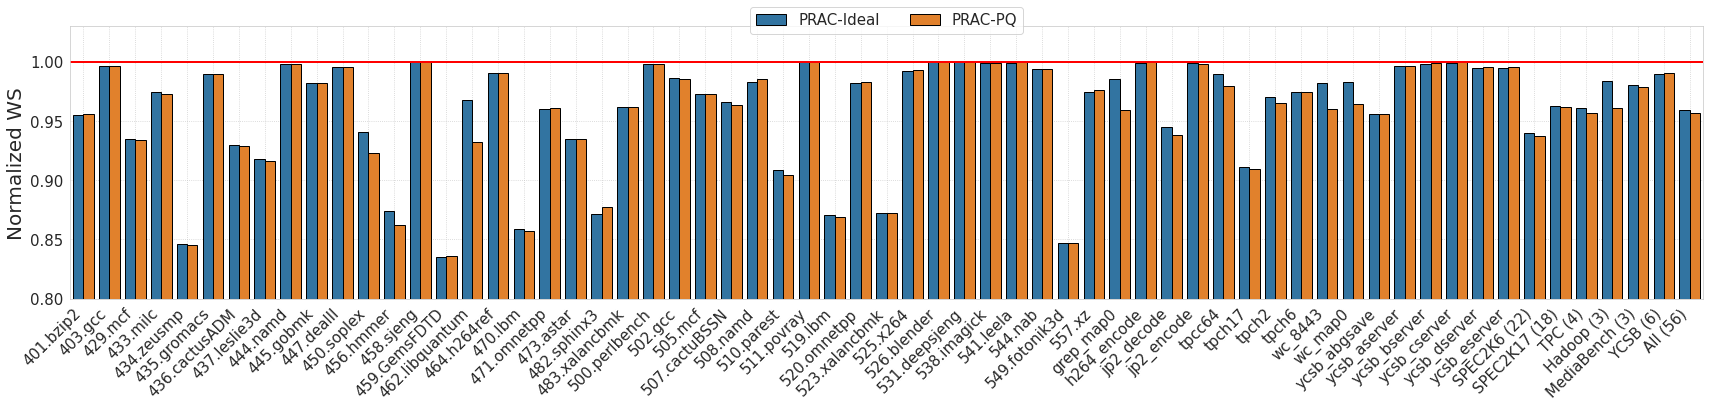

In [32]:
# Filter DataFrame for Trh == 32
df_target = geomean_df[geomean_df['num_RFM'] == 4]

# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ', 'PRAC-Rand'], var_name='PRAC_Implementation', value_name='WS')
df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ'], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '433.milc'])

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(24,6))
plt.rc('font', size=15)

ax = sns.barplot(x='workload', y='WS',hue='PRAC_Implementation', data=df_melted, edgecolor='black')

# xtick_order = df['workload']

# ax.set_xticks(np.arange(len(xtick_order)))
plt.xticks(ha='right', rotation=45, fontsize=15)
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

ax.set_xlabel('')
ax.set_ylabel('Normalized WS', fontsize=20)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=5, fancybox=True, shadow=False, fontsize=15)

# Hide the legend
# ax.legend().set_visible(False)
ax.set_ylim(0.8,1.03)

plt.grid(True, linestyle=':')

plt.tight_layout()
plt.show()

**ABO==32, num_RFM==2 Results**

    num_RFM        workload PRAC_Implementation        WS
0         2       401.bzip2          PRAC-Ideal  0.958781
1         2         403.gcc          PRAC-Ideal  0.999046
2         2         429.mcf          PRAC-Ideal  0.936732
3         2        433.milc          PRAC-Ideal  0.983696
4         2      434.zeusmp          PRAC-Ideal  0.865797
..      ...             ...                 ...       ...
121       2         TPC (4)             PRAC-PQ  0.975975
122       2      Hadoop (3)             PRAC-PQ  0.973725
123       2  MediaBench (3)             PRAC-PQ  0.983781
124       2        YCSB (6)             PRAC-PQ  0.992581
125       2        All (56)             PRAC-PQ  0.969647

[126 rows x 4 columns]


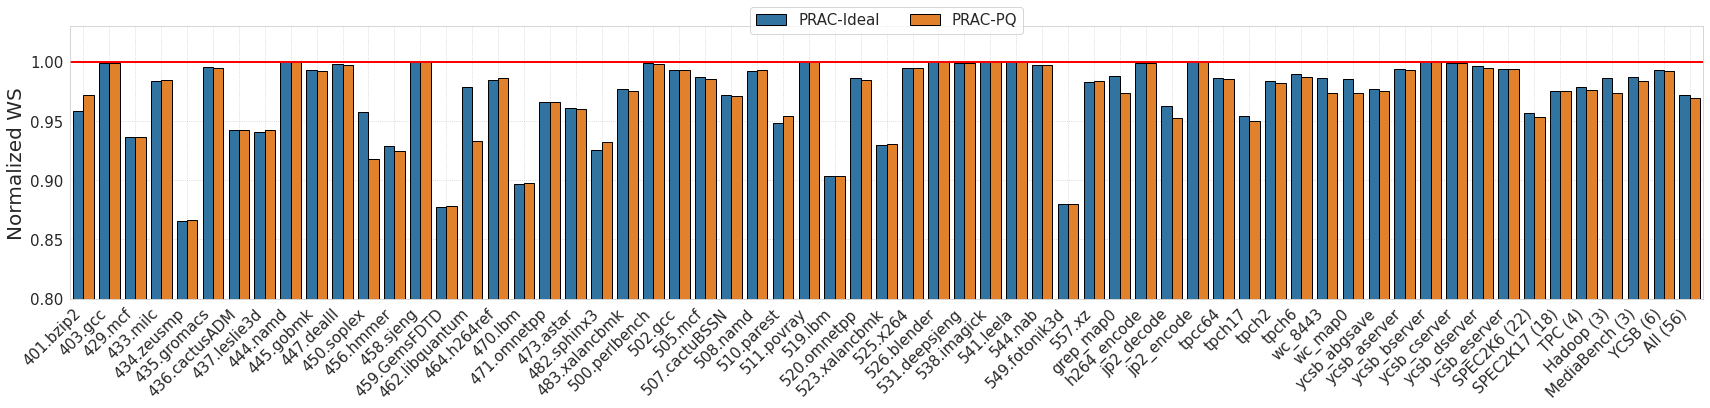

In [33]:
# Filter DataFrame for Trh == 32
df_target = geomean_df[geomean_df['num_RFM'] == 2]

# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ', 'PRAC-Rand'], var_name='PRAC_Implementation', value_name='WS')
df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ'], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '433.milc'])

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(24,6))
plt.rc('font', size=15)

ax = sns.barplot(x='workload', y='WS',hue='PRAC_Implementation', data=df_melted, edgecolor='black')

# xtick_order = df['workload']

# ax.set_xticks(np.arange(len(xtick_order)))
plt.xticks(ha='right', rotation=45, fontsize=15)
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

ax.set_xlabel('')
ax.set_ylabel('Normalized WS', fontsize=20)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=5, fancybox=True, shadow=False, fontsize=15)

# Hide the legend
# ax.legend().set_visible(False)
ax.set_ylim(0.8,1.03)

plt.grid(True, linestyle=':')

plt.tight_layout()
plt.show()

**ABO==32, num_RFM==1 Results**

    num_RFM        workload PRAC_Implementation        WS
0         1       401.bzip2          PRAC-Ideal  0.971668
1         1         403.gcc          PRAC-Ideal  0.999613
2         1         429.mcf          PRAC-Ideal  0.936478
3         1        433.milc          PRAC-Ideal  0.987603
4         1      434.zeusmp          PRAC-Ideal  0.874855
..      ...             ...                 ...       ...
121       1         TPC (4)             PRAC-PQ  0.983801
122       1      Hadoop (3)             PRAC-PQ  0.979322
123       1  MediaBench (3)             PRAC-PQ  0.986576
124       1        YCSB (6)             PRAC-PQ  0.994649
125       1        All (56)             PRAC-PQ  0.976120

[126 rows x 4 columns]


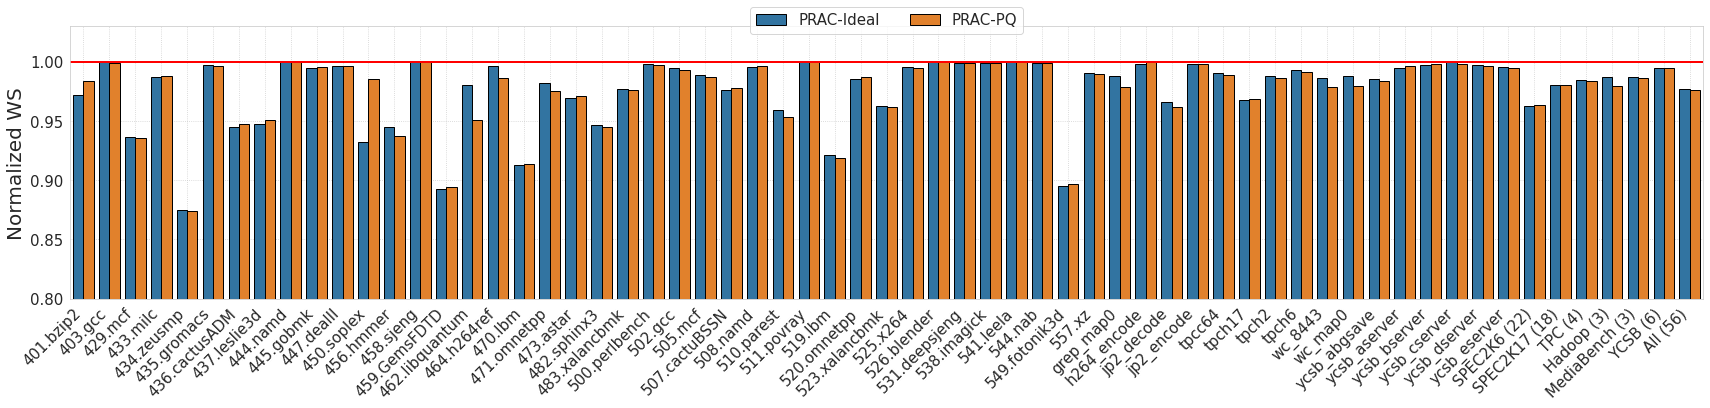

In [34]:
# Filter DataFrame for Trh == 32
df_target = geomean_df[geomean_df['num_RFM'] == 1]

# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ', 'PRAC-Rand'], var_name='PRAC_Implementation', value_name='WS')
df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ'], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '433.milc'])

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(24,6))
plt.rc('font', size=15)

ax = sns.barplot(x='workload', y='WS',hue='PRAC_Implementation', data=df_melted, edgecolor='black')

# xtick_order = df['workload']

# ax.set_xticks(np.arange(len(xtick_order)))
plt.xticks(ha='right', rotation=45, fontsize=15)
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

ax.set_xlabel('')
ax.set_ylabel('Normalized WS', fontsize=20)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=5, fancybox=True, shadow=False, fontsize=15)

# Hide the legend
# ax.legend().set_visible(False)
ax.set_ylim(0.8,1.03)

plt.grid(True, linestyle=':')

plt.tight_layout()
plt.show()

**Line Graph from # of RFM 1 to 4**

    num_RFM        workload PRAC_Implementation        WS
0         1       401.bzip2             PRAC-PQ  0.983807
1         1         403.gcc             PRAC-PQ  0.998998
2         1         429.mcf             PRAC-PQ  0.935988
3         1        433.milc             PRAC-PQ  0.988458
4         1      434.zeusmp             PRAC-PQ  0.873981
..      ...             ...                 ...       ...
373       4  MediaBench (3)          PRAC-Ideal  0.980582
374       4        YCSB (6)          PRAC-Ideal  0.989794
375       1        All (56)          PRAC-Ideal  0.976671
376       2        All (56)          PRAC-Ideal  0.972141
377       4        All (56)          PRAC-Ideal  0.959514

[378 rows x 4 columns]


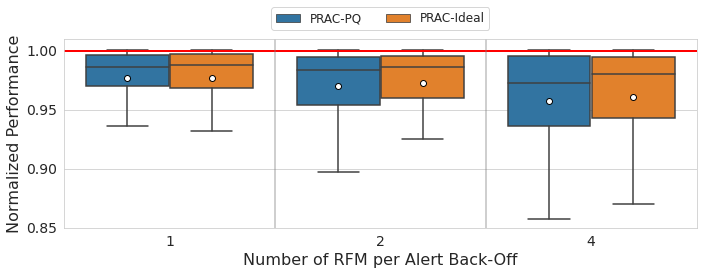

In [104]:
df_target = geomean_df


# Reshape DataFrame for plotting
df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-PQ', 'PRAC-Ideal'], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '429.mcf'])
sns.set_style("whitegrid")
x_ticks = [1, 2, 4]

fig, ax = plt.subplots(figsize=(10,4))
# plt.xscale('log')
plt.rc('font', size=10)

# Use sns.lineplot to plot the line
# sns.lineplot(x='num_RFM', y='WS', hue='PRAC_Implementation', data=df_melted, ax=ax, linewidth=2.5, marker='o', markersize=10, err_style='bars', 
# )
ax = sns.boxplot(x='num_RFM', y='WS', hue='PRAC_Implementation', data=df_melted ,showmeans=True, showfliers=False, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# Calculate error bars if needed (replace with your actual error calculation)
# For example, using standard deviation
# errors = df_melted.groupby('num_channels')['WS'].std().reset_index()

# # Plot error bars using plt.errorbar
# plt.errorbar(x=errors['num_channels'], y=errors['WS'], yerr=errors['WS'], fmt='none', color='black',
#              ecolor='gray', elinewidth=2, capsize=4, capthick=2)

# xtick_order = df['workload']
# plt.grid(axis='both', linestyle='--')

# ax.set_xticks(np.arange(len(xtick_order)))
# Set x-axis to logarithmic scale
# Ensure that all data points are visible on logarithmic scale
# ax.set_xticks([1, 2, 4])
# ax.set_xticklabels([1, 2, 4], fontsize=16)

ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=True, shadow=False, fontsize=12)
ax.set_xlabel('Number of RFM per Alert Back-Off', fontsize=16)
ax.set_ylabel('Normalized Performance', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.axvline(x=0.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=1.5, color='grey', linestyle='-', alpha=0.5)
ax.set_ylim(0.85,1.01)

plt.tight_layout()
# plt.show()
fig.savefig('./figures/4cores_results_varying_RFM_tABO=32_no_proactive.pdf', dpi=600, bbox_inches='tight')

**Data for ABO==128**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
multicore_4cores_out_path = "../mitigation_overhead_study/RFM_per_ABO_study/128BO/results_4cores"
prac_latency_overhead_only_path = "../mitigation_overhead_study/results_4cores/robaracoch_mapping/PRAC_WO_Mitigation/stats/"
# singlecore_out_path = "../mitigation_enabled/results_singlecore/adaptive_closed_page"

df = pd.DataFrame(columns=["mitigation", "num_RFM", "workload", "WS"])
mitigation_list = ["PRAC-PQ", "PRAC-Ideal", "PRAC-Rand"]
for mitigation in mitigation_list:
    result_path = multicore_4cores_out_path + "/" + mitigation +"/stats/"
    result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
    for result_filename in result_list:
        result_file = open(result_path + result_filename + ".txt", "r")
        trh = int(result_filename.split("_")[0])
        # workload = result_filename.split("_")[1:]
        workload = "_".join(result_filename.split("_")[1:])

        ipc_0 = 0
        ipc_1 = 0
        ipc_2 = 0
        ipc_3 = 0
        cycle_0 = 0
        cycle_1 = 0
        cycle_2 = 0
        cycle_3 = 0
        num_inst_0=0
        num_inst_1=0
        num_inst_2=0
        num_inst_3=0
        for line in result_file.readlines():
            if (" cycles_recorded_core_0:" in line):
                 cycle_0 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_1:" in line):
                 cycle_1 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_2:" in line):
                 cycle_2 = int(line.split(" ")[-1])
            if (" cycles_recorded_core_3:" in line):
                 cycle_3 = int(line.split(" ")[-1])
            if (" insts_recorded_core_0" in line):
                num_inst_0 = int(line.split(" ")[-1])
            if (" insts_recorded_core_1" in line):
                num_inst_1 = int(line.split(" ")[-1])
            if (" insts_recorded_core_2" in line):
                num_inst_2 = int(line.split(" ")[-1])
            if (" insts_recorded_core_3" in line):
                num_inst_3 = int(line.split(" ")[-1])
        if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
            continue
        if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
            print("Error: " + result_filename)
        ipc_0 = int(num_inst_0) / cycle_0
        ipc_1 = int(num_inst_1) / cycle_1
        ipc_2 = int(num_inst_2) / cycle_2
        ipc_3 = int(num_inst_3) / cycle_3

        # print(workload)
        # print(ipc)

        result_file.close()
        df = df.append({'mitigation': mitigation, 'num_RFM': trh, "workload": workload, "WS": ipc_0+ipc_1+ipc_2+ipc_3}, ignore_index=True)


df = df.pivot(index=['num_RFM','workload'], columns=['mitigation'], values='WS').reset_index()     

# Process Baseline results here
baseline_df = pd.DataFrame(columns=['workload', 'PRAC_wo_mitigation_WS'])
baseline_result_list = [x[:-4] for x in os.listdir(prac_latency_overhead_only_path) if x.endswith(".txt")]
for result_filename in baseline_result_list:
    result_file = open(prac_latency_overhead_only_path + result_filename + ".txt", "r")
    trh = int(result_filename.split("_")[0])
    if trh != 32:
         continue
    # workload = result_filename.split("_")[1:]
    workload = "_".join(result_filename.split("_")[1:])

    ipc_0 = 0
    ipc_1 = 0
    ipc_2 = 0
    ipc_3 = 0
    cycle_0 = 0
    cycle_1 = 0
    cycle_2 = 0
    cycle_3 = 0
    num_inst_0=0
    num_inst_1=0
    num_inst_2=0
    num_inst_3=0
    for line in result_file.readlines():
        if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_1:" in line):
                cycle_1 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_2:" in line):
                cycle_2 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_3:" in line):
                cycle_3 = int(line.split(" ")[-1])
        if (" insts_recorded_core_0" in line):
            num_inst_0 = int(line.split(" ")[-1])
        if (" insts_recorded_core_1" in line):
            num_inst_1 = int(line.split(" ")[-1])
        if (" insts_recorded_core_2" in line):
            num_inst_2 = int(line.split(" ")[-1])
        if (" insts_recorded_core_3" in line):
            num_inst_3 = int(line.split(" ")[-1])
    if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
        continue
    if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
        print("Error: " + result_filename)
    ipc_0 = int(num_inst_0) / cycle_0
    ipc_1 = int(num_inst_1) / cycle_1
    ipc_2 = int(num_inst_2) / cycle_2
    ipc_3 = int(num_inst_3) / cycle_3

    # print(workload)
    # print(ipc)

    result_file.close()
    baseline_df = baseline_df.append({"workload": workload, "PRAC_wo_mitigation_WS": ipc_0+ipc_1+ipc_2+ipc_3}, ignore_index=True)

# print(df)
# print(baseline_df)

df = df.merge(baseline_df, on='workload', how='left')
df["PRAC-PQ"] = df['PRAC-PQ'] / df['PRAC_wo_mitigation_WS']
df["PRAC-Ideal"] = df['PRAC-Ideal'] / df['PRAC_wo_mitigation_WS']
df["PRAC-Rand"] = df['PRAC-Rand'] / df['PRAC_wo_mitigation_WS']
df.drop(columns=['PRAC_wo_mitigation_WS'], inplace=True)
print(df)


workload_interests = ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk', 
                      '500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz',
                      'tpcc64', 'tpch17', 'tpch2', 'tpch6',
                      'grep_map0', 'wc_8443', 'wc_map0',
                    #   'bfs_dblp', 'bfs_cm2003','bfs_ny',
                    #   'h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'
                      'h264_encode', 'jp2_decode', 'jp2_encode',
                      'ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'
                      ]

df_interest = df[df['workload'].isin(workload_interests)]

# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (22)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 22
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    # 'LonestarGPU (3)': ['bfs_dblp', 'bfsbfs_cm2003_cm_2003','bfs_ny'], #lnestargpu: 3
    # 'MediaBench (4)': ['h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 4
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
# Function to calculate geometric mean
def calculate_geometric_mean(series):
    return np.prod(series) ** (1 / len(series))

interested_solutions = ["PRAC-PQ"]

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for trh in df['num_RFM'].unique():
        for suite_name, workloads in benchmark_suites.items():
            suite_df = df[df['workload'].isin(workloads) & (df['num_RFM'] == trh)]
            if not suite_df.empty:
                geomean_prac_ideal = calculate_geometric_mean(suite_df['PRAC-Ideal'])
                geomean_prac_pq = calculate_geometric_mean(suite_df['PRAC-PQ'])
                geomean_prac_rand = calculate_geometric_mean(suite_df['PRAC-Rand'])
                # geomean_prac_wo_mitigation = calculate_geometric_mean(suite_df['PRAC_WO_Mitigation'])
                geomean_df = geomean_df.append({
                    'num_RFM': trh,
                    'workload': suite_name,
                    'PRAC-Ideal': geomean_prac_ideal,
                    'PRAC-PQ': geomean_prac_pq,
                    'PRAC-Rand': geomean_prac_rand,
                }, ignore_index=True)
    
    return df.append(geomean_df, ignore_index=True)

# Call function to calculate and merge geometric means
geomean_df = add_geomean_rows(df_interest)


# Function to add 'All-60' rows for each trh value
def add_all_workloads_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for trh in df['num_RFM'].unique():
        trh_df = df[df['num_RFM'] == trh]
        geomean_prac_ideal = calculate_geometric_mean(trh_df['PRAC-Ideal'])
        geomean_prac_pq = calculate_geometric_mean(trh_df['PRAC-PQ'])
        geomean_prac_rand = calculate_geometric_mean(trh_df['PRAC-Rand'])
        # geomean_prac_wo_mitigation = calculate_geometric_mean(trh_df['PRAC_WO_Mitigation'])
        
        all_workloads_geomean_df = pd.DataFrame({
            'num_RFM': [trh],
            'workload': ['All (56)'],
            'PRAC-Ideal': [geomean_prac_ideal],
            'PRAC-PQ': [geomean_prac_pq],
            'PRAC-Rand': [geomean_prac_rand],
        })
        
        geomean_df = pd.concat([geomean_df, all_workloads_geomean_df], ignore_index=True)
    
    return pd.concat([df, geomean_df], ignore_index=True)

geomean_df = add_all_workloads_geomean_rows(geomean_df)
print(geomean_df)
print(geomean_df[geomean_df['workload'] == 'All (56)'])
geomean_df[['num_RFM','workload','PRAC-Ideal','PRAC-PQ']].to_csv('./num_RFM_study_results_4cores_ABO128.csv', index=False)

     num_RFM      workload  PRAC-Ideal   PRAC-PQ  PRAC-Rand
0          1     401.bzip2    0.998715  0.994889   0.992553
1          1       403.gcc    1.000000  1.000000   1.000000
2          1       429.mcf    0.985600  0.985716   0.967273
3          1      433.milc    0.999415  0.999399   0.998457
4          1    434.zeusmp    0.991199  0.989697   0.975015
..       ...           ...         ...       ...        ...
169        4  ycsb_aserver    0.999863  0.999863   0.996997
170        4  ycsb_bserver    0.999299  0.999299   0.996373
171        4  ycsb_cserver    0.999606  0.999396   0.997999
172        4  ycsb_dserver    1.001861  1.001861   0.994687
173        4  ycsb_eserver    1.002517  1.002517   0.996909

[174 rows x 5 columns]
    num_RFM        workload  PRAC-Ideal   PRAC-PQ  PRAC-Rand
0         1       401.bzip2    0.998715  0.994889   0.992553
1         1         403.gcc    1.000000  1.000000   1.000000
2         1         429.mcf    0.985600  0.985716   0.967273
3         1 

**ABO==128, num_RFM==4 Results**

    num_RFM        workload PRAC_Implementation        WS
0         4       401.bzip2          PRAC-Ideal  0.994062
1         4         403.gcc          PRAC-Ideal  1.000000
2         4         429.mcf          PRAC-Ideal  0.986044
3         4        433.milc          PRAC-Ideal  0.999199
4         4      434.zeusmp          PRAC-Ideal  0.990038
..      ...             ...                 ...       ...
121       4         TPC (4)             PRAC-PQ  1.000295
122       4      Hadoop (3)             PRAC-PQ  1.000109
123       4  MediaBench (3)             PRAC-PQ  0.997135
124       4        YCSB (6)             PRAC-PQ  1.000347
125       4        All (56)             PRAC-PQ  0.997912

[126 rows x 4 columns]


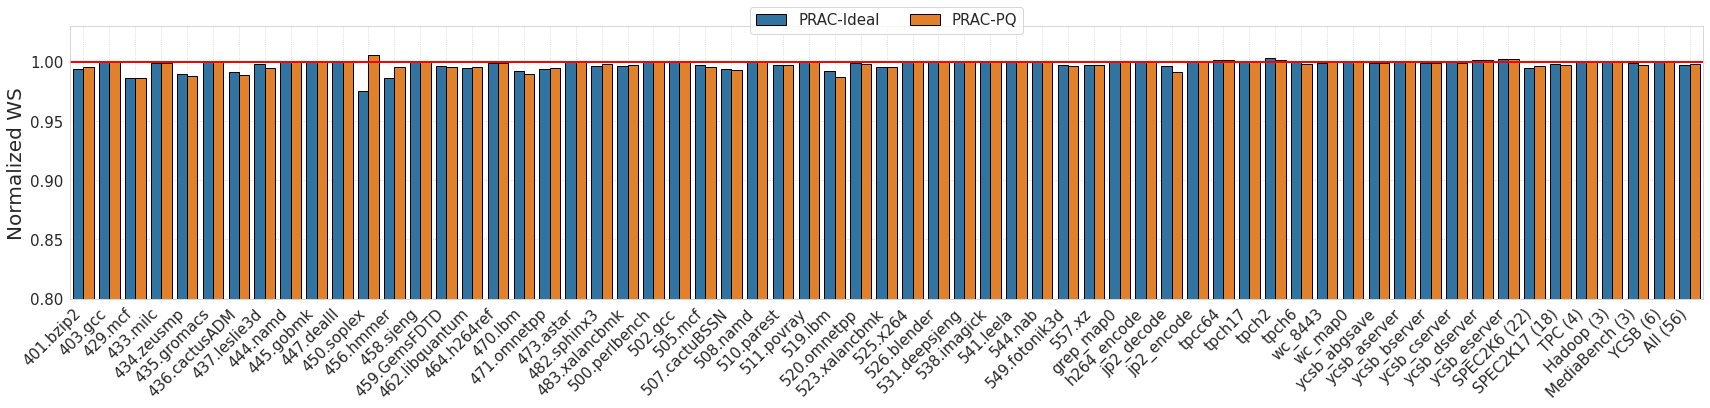

In [28]:
# Filter DataFrame for Trh == 32
df_target = geomean_df[geomean_df['num_RFM'] == 4]

# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ', 'PRAC-Rand'], var_name='PRAC_Implementation', value_name='WS')
df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ'], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '433.milc'])

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(24,6))
plt.rc('font', size=15)

ax = sns.barplot(x='workload', y='WS',hue='PRAC_Implementation', data=df_melted, edgecolor='black')

# xtick_order = df['workload']

# ax.set_xticks(np.arange(len(xtick_order)))
plt.xticks(ha='right', rotation=45, fontsize=15)
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

ax.set_xlabel('')
ax.set_ylabel('Normalized WS', fontsize=20)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=5, fancybox=True, shadow=False, fontsize=15)

# Hide the legend
# ax.legend().set_visible(False)
ax.set_ylim(0.8,1.03)

plt.grid(True, linestyle=':')

plt.tight_layout()
plt.show()

**ABO==128, num_RFM==2 Results**

    num_RFM        workload PRAC_Implementation        WS
0         2       401.bzip2          PRAC-Ideal  0.999505
1         2         403.gcc          PRAC-Ideal  1.000000
2         2         429.mcf          PRAC-Ideal  0.986467
3         2        433.milc          PRAC-Ideal  0.998924
4         2      434.zeusmp          PRAC-Ideal  0.989757
..      ...             ...                 ...       ...
121       2         TPC (4)             PRAC-PQ  0.999171
122       2      Hadoop (3)             PRAC-PQ  0.999617
123       2  MediaBench (3)             PRAC-PQ  0.997247
124       2        YCSB (6)             PRAC-PQ  1.000149
125       2        All (56)             PRAC-PQ  0.998609

[126 rows x 4 columns]


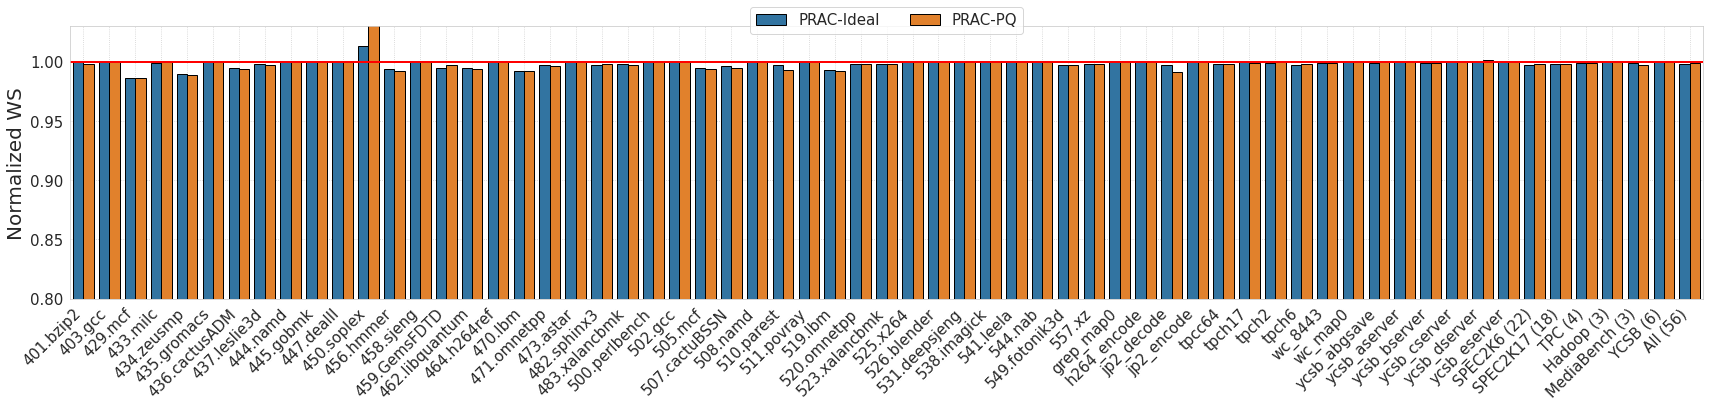

In [29]:
# Filter DataFrame for Trh == 32
df_target = geomean_df[geomean_df['num_RFM'] == 2]

# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ', 'PRAC-Rand'], var_name='PRAC_Implementation', value_name='WS')
df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ'], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '433.milc'])

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(24,6))
plt.rc('font', size=15)

ax = sns.barplot(x='workload', y='WS',hue='PRAC_Implementation', data=df_melted, edgecolor='black')

# xtick_order = df['workload']

# ax.set_xticks(np.arange(len(xtick_order)))
plt.xticks(ha='right', rotation=45, fontsize=15)
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

ax.set_xlabel('')
ax.set_ylabel('Normalized WS', fontsize=20)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=5, fancybox=True, shadow=False, fontsize=15)

# Hide the legend
# ax.legend().set_visible(False)
ax.set_ylim(0.8,1.03)

plt.grid(True, linestyle=':')

plt.tight_layout()
plt.show()

**ABO==128, num_RFM==1 Results**

    num_RFM        workload PRAC_Implementation        WS
0         1       401.bzip2          PRAC-Ideal  0.998715
1         1         403.gcc          PRAC-Ideal  1.000000
2         1         429.mcf          PRAC-Ideal  0.985600
3         1        433.milc          PRAC-Ideal  0.999415
4         1      434.zeusmp          PRAC-Ideal  0.991199
..      ...             ...                 ...       ...
121       1         TPC (4)             PRAC-PQ  0.999799
122       1      Hadoop (3)             PRAC-PQ  1.000053
123       1  MediaBench (3)             PRAC-PQ  0.998555
124       1        YCSB (6)             PRAC-PQ  0.999517
125       1        All (56)             PRAC-PQ  0.998533

[126 rows x 4 columns]


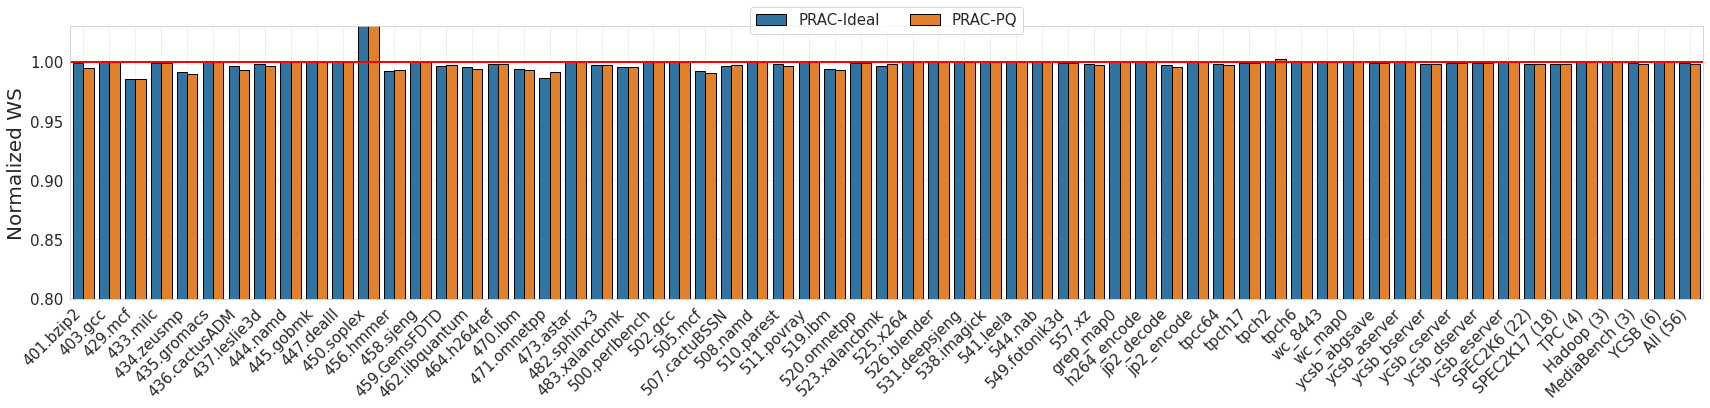

In [30]:
# Filter DataFrame for Trh == 32
df_target = geomean_df[geomean_df['num_RFM'] == 1]

# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ', 'PRAC-Rand'], var_name='PRAC_Implementation', value_name='WS')
df_melted = pd.melt(df_target, id_vars=['num_RFM', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ'], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '433.milc'])

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(24,6))
plt.rc('font', size=15)

ax = sns.barplot(x='workload', y='WS',hue='PRAC_Implementation', data=df_melted, edgecolor='black')

# xtick_order = df['workload']

# ax.set_xticks(np.arange(len(xtick_order)))
plt.xticks(ha='right', rotation=45, fontsize=15)
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

ax.set_xlabel('')
ax.set_ylabel('Normalized WS', fontsize=20)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=5, fancybox=True, shadow=False, fontsize=15)

# Hide the legend
# ax.legend().set_visible(False)
ax.set_ylim(0.8,1.03)

plt.grid(True, linestyle=':')

plt.tight_layout()
plt.show()

**Target REF Ratio Sensitivity Study**

**ABO==32 Data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
multicore_4cores_out_path = "../mitigation_overhead_study/target_ref_frequency_study/64BO/4PQ_Entry/results_4cores"
prac_latency_overhead_only_path = "../mitigation_overhead_study/results_4cores/robaracoch_mapping/PRAC_WO_Mitigation/stats/"
no_proactive_4cores_out_path = "../mitigation_overhead_study/queue_size_study/results_4cores/robaracoch_mapping/64BO/no_proactive_mitiagtion"
# singlecore_out_path = "../mitigation_enabled/results_singlecore/adaptive_closed_page"

df = pd.DataFrame(columns=["mitigation", "num_RFM", "TREF_Ratio", "workload", "WS"])
mitigation_list = ["QPRAC", "QPRAC-RFMpb", "QPRAC-RFMsb", "QPRAC-Ideal"]
# mitigation_list = ["PRAC-PQ-NoOpREF", "PRAC-PQ", "PRAC-Rand", "PRAC-WRand", "PRAC-GRand", "PRAC-Ideal"]
for num_rfm in [1,2,4]:
    for mitigation in mitigation_list:
        result_path = multicore_4cores_out_path + "/" + str(num_rfm) + "rfm_per_alert/" + mitigation +"/stats/"
        result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
        for result_filename in result_list:
            result_file = open(result_path + result_filename + ".txt", "r")
            trh = int(result_filename.split("_")[0])
            # workload = result_filename.split("_")[1:]
            workload = "_".join(result_filename.split("_")[1:])

            ipc_0 = 0
            ipc_1 = 0
            ipc_2 = 0
            ipc_3 = 0
            cycle_0 = 0
            cycle_1 = 0
            cycle_2 = 0
            cycle_3 = 0
            num_inst_0=0
            num_inst_1=0
            num_inst_2=0
            num_inst_3=0
            num_abo=0
            num_tREFI_period=0
            num_tREFW_period=0
            for line in result_file.readlines():
                if (" cycles_recorded_core_0:" in line):
                    cycle_0 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_1:" in line):
                    cycle_1 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_2:" in line):
                    cycle_2 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_3:" in line):
                    cycle_3 = int(line.split(" ")[-1])
                if (" insts_recorded_core_0" in line):
                    num_inst_0 = int(line.split(" ")[-1])
                if (" insts_recorded_core_1" in line):
                    num_inst_1 = int(line.split(" ")[-1])
                if (" insts_recorded_core_2" in line):
                    num_inst_2 = int(line.split(" ")[-1])
                if (" insts_recorded_core_3" in line):
                    num_inst_3 = int(line.split(" ")[-1])
                if (" prac_num_recovery" in line):
                    num_abo = int(line.split(" ")[-1])
                if (" num_refresh_command_0" in line):
                    num_tREFI_period = int(line.split(" ")[-1])
                if (" num_refresh_window_0" in line):
                    num_tREFW_period = int(line.split(" ")[-1])            
                    
            if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
                continue
            if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
                print("Error: " + result_filename)
            ipc_0 = int(num_inst_0) / cycle_0
            ipc_1 = int(num_inst_1) / cycle_1
            ipc_2 = int(num_inst_2) / cycle_2
            ipc_3 = int(num_inst_3) / cycle_3
            num_abo_per_trefi = int(num_abo) / int(num_tREFI_period)
            if int(num_tREFW_period) == 0:
                num_abo_per_trefw = int(num_abo)
            else:
                num_abo_per_trefw = int(num_abo) / int(num_tREFW_period)
            # print(workload)
            # print(ipc)

            result_file.close()
            df = df.append({'mitigation': mitigation, 'num_RFM': num_rfm, 'TREF_Ratio': trh, "workload": workload, "WS": ipc_0+ipc_1+ipc_2+ipc_3, "num_abo_trefi": num_abo_per_trefi, "num_abo_trefw": num_abo_per_trefw} , ignore_index=True)

# Process no_proactive_mitigation results here
no_proactive_df = pd.DataFrame(columns=["mitigation", "num_RFM", "TREF_Ratio", "workload", "WS"])
no_proactive_mitigation_list = ["PRAC-PQ-NoOpREF", "PRAC-PQ"]
no_proactive_df_result_list = [x[:-4] for x in os.listdir(no_proactive_4cores_out_path) if x.endswith(".txt")]
for num_rfm in [1,2,4]:
    for mitigation in no_proactive_mitigation_list:
        result_path = no_proactive_4cores_out_path + "/" + str(num_rfm) + "rfm_per_alert/" + mitigation +"/stats/"
        result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
        for result_filename in result_list:
            result_file = open(result_path + result_filename + ".txt", "r")
            trh = int(result_filename.split("_")[0])
            if trh != 8:
                continue
            # workload = result_filename.split("_")[1:]
            workload = "_".join(result_filename.split("_")[1:])

            ipc_0 = 0
            ipc_1 = 0
            ipc_2 = 0
            ipc_3 = 0
            cycle_0 = 0
            cycle_1 = 0
            cycle_2 = 0
            cycle_3 = 0
            num_inst_0=0
            num_inst_1=0
            num_inst_2=0
            num_inst_3=0
            num_abo=0
            num_tREFI_period=0
            num_tREFW_period=0
            for line in result_file.readlines():
                if (" cycles_recorded_core_0:" in line):
                    cycle_0 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_1:" in line):
                    cycle_1 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_2:" in line):
                    cycle_2 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_3:" in line):
                    cycle_3 = int(line.split(" ")[-1])
                if (" insts_recorded_core_0" in line):
                    num_inst_0 = int(line.split(" ")[-1])
                if (" insts_recorded_core_1" in line):
                    num_inst_1 = int(line.split(" ")[-1])
                if (" insts_recorded_core_2" in line):
                    num_inst_2 = int(line.split(" ")[-1])
                if (" insts_recorded_core_3" in line):
                    num_inst_3 = int(line.split(" ")[-1])
                if (" prac_num_recovery" in line):
                    num_abo = int(line.split(" ")[-1])
                if (" num_refresh_command_0" in line):
                    num_tREFI_period = int(line.split(" ")[-1])
                if (" num_refresh_window_0" in line):
                    num_tREFW_period = int(line.split(" ")[-1])            
                    
            if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
                continue
            if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
                print("Error: " + result_filename)
            ipc_0 = int(num_inst_0) / cycle_0
            ipc_1 = int(num_inst_1) / cycle_1
            ipc_2 = int(num_inst_2) / cycle_2
            ipc_3 = int(num_inst_3) / cycle_3
            num_abo_per_trefi = int(num_abo) / int(num_tREFI_period)
            if int(num_tREFW_period) == 0:
                num_abo_per_trefw = int(num_abo)
            else:
                num_abo_per_trefw = int(num_abo) / int(num_tREFW_period)
            # print(workload)
            # print(ipc)

            result_file.close()
            if mitigation == 'PRAC-PQ':
                no_proactive_df = no_proactive_df.append({'mitigation': 'PQ-NOPRO', 'num_RFM': num_rfm, 'TREF_Ratio': 0, "workload": workload, "WS": ipc_0+ipc_1+ipc_2+ipc_3, "num_abo_trefi": num_abo_per_trefi, "num_abo_trefw": num_abo_per_trefw} , ignore_index=True)
            else:
                no_proactive_df = no_proactive_df.append({'mitigation': mitigation, 'num_RFM': num_rfm, 'TREF_Ratio': 0, "workload": workload, "WS": ipc_0+ipc_1+ipc_2+ipc_3, "num_abo_trefi": num_abo_per_trefi, "num_abo_trefw": num_abo_per_trefw} , ignore_index=True)

# Merge no_proactive_df into the main df
df = pd.concat([df, no_proactive_df], ignore_index=True)
print(df)

df_ws = df
df_num_abo = df.pivot(index=['num_RFM','TREF_Ratio','workload'], columns=['mitigation'], values='num_abo_trefi').reset_index()     
# print(df_num_abo)

workload_interests = ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk', 
                      '500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz',
                      'tpcc64', 'tpch17', 'tpch2', 'tpch6',
                      'grep_map0', 'wc_8443', 'wc_map0',
                    #   'bfs_dblp', 'bfs_cm2003','bfs_ny',
                    #   'h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'
                      'h264_encode', 'jp2_decode', 'jp2_encode',
                      'ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'
                      ]

df_interest = df_num_abo[df_num_abo['workload'].isin(workload_interests)]

# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (22)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 22
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    # 'LonestarGPU (3)': ['bfs_dblp', 'bfsbfs_cm2003_cm_2003','bfs_ny'], #lnestargpu: 3
    # 'MediaBench (4)': ['h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 4
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
# Function to calculate geometric mean
def calculate_arithmetic_mean(series):
    return series.mean()

# Function to calculate and add arithmetic means as new rows
def add_arithmetic_mean_rows(df):
    mean_df = pd.DataFrame(columns=df.columns)
    
    for num_rfm in df['num_RFM'].unique():
        for trh in df['TREF_Ratio'].unique():
            for suite_name, workloads in benchmark_suites.items():
                suite_df = df[df['workload'].isin(workloads) & (df['TREF_Ratio'] == trh) & (df['num_RFM'] == num_rfm)]
                if not suite_df.empty:
                    mean_prac_ideal = calculate_arithmetic_mean(suite_df['QPRAC-Ideal'])
                    mean_prac_pq = calculate_arithmetic_mean(suite_df['QPRAC'])
                    mean_prac_rfmsb = calculate_arithmetic_mean(suite_df['QPRAC-RFMsb'])
                    mean_prac_rfmpb = calculate_arithmetic_mean(suite_df['QPRAC-RFMpb'])
                    mean_prac_pq_no_ref = calculate_arithmetic_mean(suite_df['PRAC-PQ-NoOpREF'])
                    mean_prac_pq_no_pro = calculate_arithmetic_mean(suite_df['PQ-NOPRO'])
                    # mean_prac_wrand = calculate_arithmetic_mean(suite_df['PRAC-WRand'])
                    # mean_prac_grand = calculate_arithmetic_mean(suite_df['PRAC-GRand'])
                    mean_df = mean_df.append({
                        'num_RFM':num_rfm,
                        'TREF_Ratio': trh,
                        'workload': suite_name,
                        'QPRAC-Ideal': mean_prac_ideal,
                        'QPRAC': mean_prac_pq,
                        'QPRAC-RFMpb': mean_prac_rfmpb,
                        'QPRAC-RFMsb': mean_prac_rfmsb,
                        'PRAC-PQ-NoOpREF': mean_prac_pq_no_ref,
                        'PQ-NOPRO': mean_prac_pq_no_pro
                        # 'PRAC-WRand': mean_prac_wrand,
                        # 'PRAC-GRand': mean_prac_grand,
                    }, ignore_index=True)
        
    return df.append(mean_df, ignore_index=True)
    

# Call function to calculate and merge arithmetic means
mean_df = add_arithmetic_mean_rows(df_interest)
# Function to add 'All (56)' rows for each trh value
def add_all_workloads_mean_rows(df):
    mean_df = pd.DataFrame(columns=df.columns)
    
    for num_rfm in df['num_RFM'].unique():
        for trh in df['TREF_Ratio'].unique():
            trh_df = df[(df['TREF_Ratio'] == trh) & (df['num_RFM'] == num_rfm)]
            mean_prac_ideal = calculate_arithmetic_mean(trh_df['QPRAC-Ideal'])
            mean_prac_pq = calculate_arithmetic_mean(trh_df['QPRAC'])
            mean_prac_rfmsb = calculate_arithmetic_mean(trh_df['QPRAC-RFMsb'])
            mean_prac_rfmpb = calculate_arithmetic_mean(trh_df['QPRAC-RFMpb'])
            mean_prac_pq_no_ref = calculate_arithmetic_mean(trh_df['PRAC-PQ-NoOpREF'])
            mean_prac_pq_no_pro = calculate_arithmetic_mean(trh_df['PQ-NOPRO'])
            # mean_prac_wrand = calculate_arithmetic_mean(trh_df['PRAC-WRand'])
            # mean_prac_grand = calculate_arithmetic_mean(trh_df['PRAC-GRand'])
            
            all_workloads_mean_df = pd.DataFrame({
                'num_RFM': [num_rfm],
                'TREF_Ratio': [trh],
                'workload': ['All (56)'],
                'QPRAC-Ideal': [mean_prac_ideal],
                'QPRAC': [mean_prac_pq],
                'QPRAC-RFMsb': [mean_prac_rfmsb],
                'QPRAC-RFMpb': [mean_prac_rfmpb],
                'PRAC-PQ-NoOpREF': [mean_prac_pq_no_ref],
                'PQ-NOPRO': [mean_prac_pq_no_pro],
                # 'PRAC-WRand': [mean_prac_wrand],
                # 'PRAC-GRand': [mean_prac_grand],
            })
            
            mean_df = pd.concat([mean_df, all_workloads_mean_df], ignore_index=True)
        
    return pd.concat([df, mean_df], ignore_index=True)

# Call function to calculate and merge mean values for all workloads
mean_df_abo_all = add_all_workloads_mean_rows(mean_df)
# print(mean_df_abo_all)
print(mean_df_abo_all[mean_df_abo_all['workload'] == 'All (56)'])
# mean_df_abo_all[['TREF_Ratio','workload','PRAC-Ideal','PRAC-PQ']].to_csv('./TREF_Ratio_study_num_alert_results_4cores_ABO32.csv', index=False)

     mitigation num_RFM TREF_Ratio      workload        WS  num_abo_trefi  \
0         QPRAC       1          1     401.bzip2  6.979265       0.000000   
1         QPRAC       1          3     401.bzip2  7.025633       0.000316   
2         QPRAC       1          5     401.bzip2  6.991542       0.001370   
3         QPRAC       1          7     401.bzip2  7.026915       0.001376   
4         QPRAC       1          9     401.bzip2  6.947355       0.002836   
...         ...     ...        ...           ...       ...            ...   
2937   PQ-NOPRO       4          0         tpch2  0.979049       0.003203   
2938   PQ-NOPRO       4          0       wc_map0  0.471692       0.002539   
2939   PQ-NOPRO       4          0  ycsb_abgsave  5.057089       0.002517   
2940   PQ-NOPRO       4          0  ycsb_dserver  3.856829       0.003261   
2941   PQ-NOPRO       4          0  ycsb_eserver  2.873440       0.000758   

      num_abo_trefw  
0          0.000000  
1          3.000000  
2        

In [4]:

df = df_ws.pivot(index=['num_RFM','TREF_Ratio','workload'], columns=['mitigation'], values='WS').reset_index()     

# Process Baseline results here
baseline_df = pd.DataFrame(columns=['workload', 'PRAC_wo_mitigation_WS'])
baseline_result_list = [x[:-4] for x in os.listdir(prac_latency_overhead_only_path) if x.endswith(".txt")]
for result_filename in baseline_result_list:
    result_file = open(prac_latency_overhead_only_path + result_filename + ".txt", "r")
    trh = int(result_filename.split("_")[0])
    if trh != 32:
         continue
    # workload = result_filename.split("_")[1:]
    workload = "_".join(result_filename.split("_")[1:])

    ipc_0 = 0
    ipc_1 = 0
    ipc_2 = 0
    ipc_3 = 0
    cycle_0 = 0
    cycle_1 = 0
    cycle_2 = 0
    cycle_3 = 0
    num_inst_0=0
    num_inst_1=0
    num_inst_2=0
    num_inst_3=0
    for line in result_file.readlines():
        if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_1:" in line):
                cycle_1 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_2:" in line):
                cycle_2 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_3:" in line):
                cycle_3 = int(line.split(" ")[-1])
        if (" insts_recorded_core_0" in line):
            num_inst_0 = int(line.split(" ")[-1])
        if (" insts_recorded_core_1" in line):
            num_inst_1 = int(line.split(" ")[-1])
        if (" insts_recorded_core_2" in line):
            num_inst_2 = int(line.split(" ")[-1])
        if (" insts_recorded_core_3" in line):
            num_inst_3 = int(line.split(" ")[-1])
    if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
        continue
    if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
        print("Error: " + result_filename)
    ipc_0 = int(num_inst_0) / cycle_0
    ipc_1 = int(num_inst_1) / cycle_1
    ipc_2 = int(num_inst_2) / cycle_2
    ipc_3 = int(num_inst_3) / cycle_3

    # print(workload)
    # print(ipc)

    result_file.close()
    baseline_df = baseline_df.append({"workload": workload, "PRAC_wo_mitigation_WS": ipc_0+ipc_1+ipc_2+ipc_3}, ignore_index=True)

# print(df)
# print(baseline_df)

df = df.merge(baseline_df, on='workload', how='left')
mitigation_list = ["PRAC-PQ-NoOpREF", "PQ-NOPRO", "QPRAC", "QPRAC-RFMsb", "QPRAC-RFMpb", "QPRAC-Ideal"]
for mitigation in set(mitigation_list) - set(['PRAC_wo_mitigation_WS']):
     df[mitigation] = df[mitigation] / df['PRAC_wo_mitigation_WS']
# df["PRAC-PQ"] = df['PRAC-PQ'] / df['PRAC_wo_mitigation_WS']
# df["PRAC-Ideal"] = df['PRAC-Ideal'] / df['PRAC_wo_mitigation_WS']
# df["PRAC-Rand"] = df['PRAC-Rand'] / df['PRAC_wo_mitigation_WS']
# df["PRAC-PQ-NoOpREF"] = df['PRAC-PQ-NoOpREF'] / df['PRAC_wo_mitigation_WS']
# df["PRAC-Rand-NoOpREF"] = df['PRAC-PQ-NoOpREF'] / df['PRAC_wo_mitigation_WS']
df.drop(columns=['PRAC_wo_mitigation_WS'], inplace=True)


workload_interests = ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk', 
                      '500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz',
                      'tpcc64', 'tpch17', 'tpch2', 'tpch6',
                      'grep_map0', 'wc_8443', 'wc_map0',
                    #   'bfs_dblp', 'bfs_cm2003','bfs_ny',
                    #   'h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'
                      'h264_encode', 'jp2_decode', 'jp2_encode',
                      'ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'
                      ]

df_interest = df[df['workload'].isin(workload_interests)]


# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (22)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 22
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    # 'LonestarGPU (3)': ['bfs_dblp', 'bfsbfs_cm2003_cm_2003','bfs_ny'], #lnestargpu: 3
    # 'MediaBench (4)': ['h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 4
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
# Function to calculate geometric mean
def calculate_geometric_mean(series):
    return np.prod(series) ** (1 / len(series))

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for num_rfm in df['num_RFM'].unique():
        for trh in df['TREF_Ratio'].unique():
            for suite_name, workloads in benchmark_suites.items():
                suite_df = df[df['workload'].isin(workloads) & (df['TREF_Ratio'] == trh) & (df['num_RFM'] == num_rfm) ]
                if not suite_df.empty:
                    geomean_prac_ideal = calculate_geometric_mean(suite_df['QPRAC-Ideal'])
                    geomean_prac_pq = calculate_geometric_mean(suite_df['QPRAC'])
                    geomean_prac_rfmsb = calculate_geometric_mean(suite_df['QPRAC-RFMsb'])
                    geomean_prac_rfmpb = calculate_geometric_mean(suite_df['QPRAC-RFMpb'])
                    # geomean_prac_wrand = calculate_geometric_mean(suite_df['PRAC-WRand'])
                    # geomean_prac_grand = calculate_geometric_mean(suite_df['PRAC-GRand'])
                    geomean_prac_pq_no_ref = calculate_geometric_mean(suite_df['PRAC-PQ-NoOpREF'])
                    geomean_prac_pq_no_proactive = calculate_geometric_mean(suite_df['PQ-NOPRO'])
                    geomean_df = geomean_df.append({
                        'num_RFM': num_rfm,
                        'TREF_Ratio': trh,
                        'workload': suite_name,
                        'QPRAC-Ideal': geomean_prac_ideal,
                        'QPRAC': geomean_prac_pq,
                        'QPRAC-RFMsb': geomean_prac_rfmsb,
                        'QPRAC-RFMpb': geomean_prac_rfmpb,
                        'PRAC-PQ-NoOpREF': geomean_prac_pq_no_ref,
                        'PQ-NOPRO': geomean_prac_pq_no_proactive,
                        # 'PRAC-WRand': geomean_prac_wrand,
                        # 'PRAC-GRand': geomean_prac_grand,
                    }, ignore_index=True)
        
    return df.append(geomean_df, ignore_index=True)

# Call function to calculate and merge geometric means
geomean_df = add_geomean_rows(df_interest)


# Function to add 'All-60' rows for each trh value
def add_all_workloads_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for num_rfm in df['num_RFM'].unique():
        for trh in df['TREF_Ratio'].unique():
            trh_df = df[(df['TREF_Ratio'] == trh) & (df['num_RFM'] == num_rfm)]
            geomean_prac_ideal = calculate_geometric_mean(trh_df['QPRAC-Ideal'])
            geomean_prac_pq = calculate_geometric_mean(trh_df['QPRAC'])
            geomean_prac_rfmsb = calculate_geometric_mean(trh_df['QPRAC-RFMsb'])
            geomean_prac_rfmpb = calculate_geometric_mean(trh_df['QPRAC-RFMpb'])
            # geomean_prac_wrand = calculate_geometric_mean(trh_df['PRAC-WRand'])
            # geomean_prac_grand = calculate_geometric_mean(trh_df['PRAC-GRand'])
            geomean_prac_pq_no_ref = calculate_geometric_mean(trh_df['PRAC-PQ-NoOpREF'])
            geomean_prac_pq_no_proactive = calculate_geometric_mean(trh_df['PQ-NOPRO'])

            all_workloads_geomean_df = pd.DataFrame({
                'num_RFM': [num_rfm],
                'TREF_Ratio': [trh],
                'workload': ['All (56)'],
                'QPRAC-Ideal': [geomean_prac_ideal],
                'QPRAC': [geomean_prac_pq],
                'QPRAC-RFMsb': [geomean_prac_rfmsb],
                'QPRAC-RFMpb': [geomean_prac_rfmpb],
                'PQ-NOPRO': [geomean_prac_pq_no_proactive],
                'PRAC-PQ-NoOpREF': [geomean_prac_pq_no_ref],
                # 'PRAC-WRand': [geomean_prac_wrand],
                # 'PRAC-GRand': [geomean_prac_grand],
            })
            
            geomean_df = pd.concat([geomean_df, all_workloads_geomean_df], ignore_index=True)
        
    return pd.concat([df, geomean_df], ignore_index=True)

geomean_df = add_all_workloads_geomean_rows(geomean_df)
print(geomean_df)
# print(geomean_df[geomean_df['workload'] == 'All (56)'])
# geomean_df[['TREF_Ratio','workload','PRAC-Ideal','PRAC-PQ']].to_csv('./TREF_Ratio_study_results_4cores_ABO32.csv', index=False)

     num_RFM TREF_Ratio    workload  PQ-NOPRO  PRAC-PQ-NoOpREF     QPRAC  \
0          1          0   401.bzip2  0.739524              NaN       NaN   
1          1          0     403.gcc  0.913554         0.914124       NaN   
2          1          0     429.mcf       NaN         0.221300       NaN   
3          1          0    433.milc  0.456334         0.453494       NaN   
4          1          0  434.zeusmp  0.444602              NaN       NaN   
...      ...        ...         ...       ...              ...       ...   
1027       4          1    All (56)  1.000000         1.000000  0.683417   
1028       4          3    All (56)  1.000000         1.000000  0.671217   
1029       4          5    All (56)  1.000000         1.000000  0.647508   
1030       4          7    All (56)  1.000000         1.000000  0.673362   
1031       4          9    All (56)  1.000000         1.000000  0.640669   

      QPRAC-Ideal  QPRAC-RFMpb  QPRAC-RFMsb  
0             NaN          NaN          N

**ABO==32, Mitigation per every tREFI**

    TREF_Ratio        workload PRAC_Implementation        WS
0            1       401.bzip2     PRAC-PQ-NoOpREF  0.993614
1            1         403.gcc     PRAC-PQ-NoOpREF  1.000000
2            1         429.mcf     PRAC-PQ-NoOpREF  0.999163
3            1        433.milc     PRAC-PQ-NoOpREF  0.997097
4            1      434.zeusmp     PRAC-PQ-NoOpREF  0.819348
..         ...             ...                 ...       ...
247          1         TPC (4)          PRAC-Ideal  0.995355
248          1      Hadoop (3)          PRAC-Ideal  0.998309
249          1  MediaBench (3)          PRAC-Ideal  0.991946
250          1        YCSB (6)          PRAC-Ideal  1.000000
251          1        All (56)          PRAC-Ideal  0.986516

[252 rows x 4 columns]


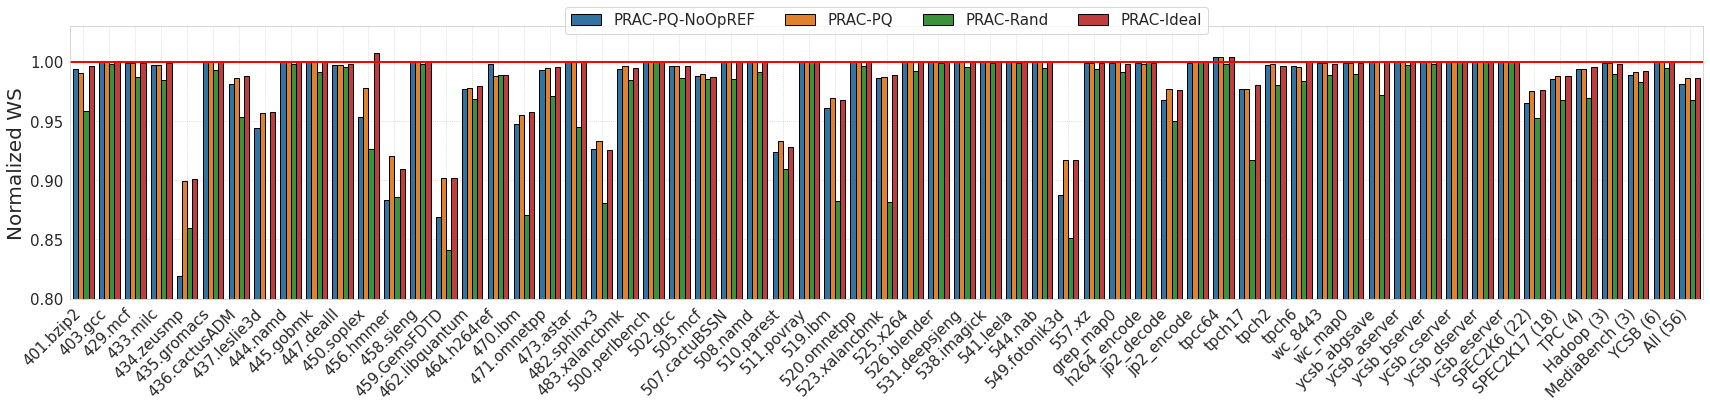

In [4]:
# Filter DataFrame for Trh == 32
df_target = geomean_df[geomean_df['TREF_Ratio'] == 1]

# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['TREF_Ratio', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ', 'PRAC-Rand'], var_name='PRAC_Implementation', value_name='WS')
# interested_solutions = ["PRAC-PQ-NoOpREF", "PRAC-Rand-NoOpREF", "PRAC-PQ", "PRAC-Rand", "PRAC-Ideal"]

df_melted = pd.melt(df_target, id_vars=['TREF_Ratio', 'workload'], value_vars=["PRAC-PQ-NoOpREF", "PRAC-PQ", "PRAC-Rand", "PRAC-Ideal"], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '433.milc'])

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(24,6))
plt.rc('font', size=15)

ax = sns.barplot(x='workload', y='WS',hue='PRAC_Implementation', data=df_melted, edgecolor='black')

# xtick_order = df['workload']

# ax.set_xticks(np.arange(len(xtick_order)))
plt.xticks(ha='right', rotation=45, fontsize=15)
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

ax.set_xlabel('')
ax.set_ylabel('Normalized WS', fontsize=20)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=5, fancybox=True, shadow=False, fontsize=15)

# Hide the legend
# ax.legend().set_visible(False)
ax.set_ylim(0.8,1.03)

plt.grid(True, linestyle=':')

plt.tight_layout()
plt.show()

**ABO==32, Mitigation per 5 tREFI**

          workload  PQ-NOPRO  PRAC-PQ-NoOpREF     QPRAC  QPRAC-Ideal  \
0        401.bzip2  0.739524              NaN  0.729210     0.729210   
1          403.gcc  0.913554         0.914124  0.913880     0.913880   
2          429.mcf       NaN         0.221300  0.326539     0.326539   
3         433.milc  0.456334         0.453494  0.456437     0.456437   
4       434.zeusmp  0.444602              NaN  0.452099     0.452099   
5      435.gromacs  0.931153         0.926419  0.931077     0.931077   
6    436.cactusADM  0.399855         0.393064  0.380443     0.380443   
7     437.leslie3d  0.470640              NaN  0.472367     0.472367   
8         444.namd  0.970530         0.970530  0.970530     0.970530   
9        445.gobmk  0.839836         0.833758  0.840754     0.840754   
10      447.dealII       NaN         0.958196  0.958196     0.958196   
11      450.soplex  0.547271         0.458074  0.574316     0.574316   
12       456.hmmer  0.735569              NaN  0.755841     0.75

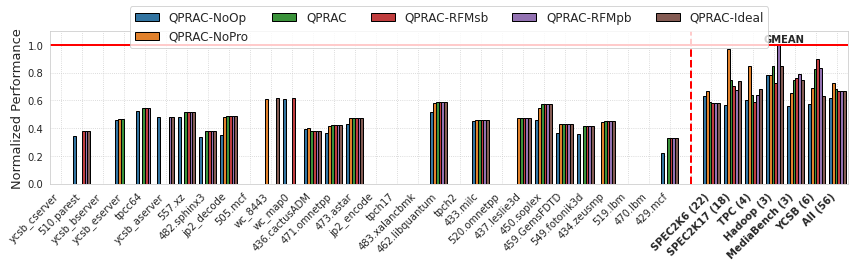

In [5]:
# Filter DataFrame for Trh == 32
df_target = geomean_df[(geomean_df['num_RFM'] == 1) & (geomean_df['TREF_Ratio'] == 1)]
df_no_pro = geomean_df[(geomean_df['num_RFM'] == 1) & (geomean_df['TREF_Ratio'] == 0)]

df_target = df_target.drop(columns=['TREF_Ratio', 'num_RFM', 'PQ-NOPRO', 'PRAC-PQ-NoOpREF'])
df_no_pro = df_no_pro.drop(columns=['TREF_Ratio', 'num_RFM', 'QPRAC-RFMsb', 'QPRAC-RFMpb', 'QPRAC', 'QPRAC-Ideal'])

df_merged = pd.merge(df_no_pro, df_target, on='workload')
print(df_merged)
# Function to identify columns with NaN values
def identify_nan_columns(row):
    return ', '.join(row.index[row.isna()].tolist())

# Create a new column with NaN columns information
df_merged['NaN_Columns'] = df_merged.apply(identify_nan_columns, axis=1)

# Check which workloads have NaN values and display them
nan_check = df_merged.isna().any(axis=1)
workloads_with_nan = df_merged[nan_check]
if not workloads_with_nan.empty:
    print(f"Workloads with NaN values and the columns: \n{workloads_with_nan[['workload', 'NaN_Columns']]}")
else:
    print("No workloads have NaN values in any column.")


# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['TREF_Ratio', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ', 'PRAC-Rand'], var_name='PRAC_Implementation', value_name='WS')
# interested_solutions = ["PRAC-PQ-NoOpREF", "PRAC-Rand-NoOpREF", "PRAC-PQ", "PRAC-Rand", "PRAC-Ideal"]

df_melted = pd.melt(df_merged, id_vars=['workload'], value_vars=["PRAC-PQ-NoOpREF", "PQ-NOPRO", "QPRAC", "QPRAC-RFMsb", "QPRAC-RFMpb", "QPRAC-Ideal"], var_name='PRAC_Implementation', value_name='WS')

rename_mapping = {
    'PRAC-PQ-NoOpREF': 'QPRAC-NoOp',
    'PQ-NOPRO': 'QPRAC-NoPro',
    # 'PRAC-PQ': 'PQ',
    # 'PRAC-Rand': 'PQ-Rand',
    # 'PRAC-Ideal': 'PQ-Ideal'
}
# Replace the values in the PRAC_Implementation column
df_melted['PRAC_Implementation'] = df_melted['PRAC_Implementation'].replace(rename_mapping)


# Filter the data to show the results only for Med and High MPKI
workloads_high_mpki=  ['ycsb_cserver', '510.parest', 'ycsb_bserver', 'ycsb_eserver', 'tpcc64', 'ycsb_aserver', '557.xz', '482.sphinx3', 'jp2_decode', '505.mcf', 'wc_8443', 
                        'wc_map0', '436.cactusADM', '471.omnetpp', '473.astar', 'jp2_encode', 'tpch17', '483.xalancbmk', '462.libquantum', 'tpch2', '433.milc', '520.omnetpp', '437.leslie3d', 
                        '450.soplex', '459.GemsFDTD', '549.fotonik3d', '434.zeusmp', '519.lbm', '470.lbm', '429.mcf', 
                        # 'h264_decode', 'bfs_ny', 'bfs_cm2003', 'bfs_dblp', 
                        '', 'SPEC2K6 (22)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)',
                        'MediaBench (3)', 
                        # 'LonestarGPU (3)', 'MediaBench (4)', 
                        'YCSB (6)', 'All (56)']

df_high_mpki = df_melted[df_melted['workload'].isin(workloads_high_mpki)]

# methods_intersted = ["PQ-NoOp", "PQ-NoPro", "PQ", "PQ-Rand", "PQ-Ideal"] # Enable this later if we include random stuff
methods_intersted = ["QPRAC-NoOp", "QPRAC-NoPro", "QPRAC", "QPRAC-Ideal", "QPRAC-RFMsb", "QPRAC-RFMpb"] # Further remove PQ-NoOp if we think we don't need to evalue this in the result section
df_filtered = df_high_mpki[df_high_mpki['PRAC_Implementation'].isin(methods_intersted)]
df_filtered['PRAC_Implementation'] = pd.Categorical(df_filtered['PRAC_Implementation'], categories=methods_intersted, ordered=True)
# print(df_filtered)
df_filtered.to_csv('./csv_input_for_plots/4core_performance_results_1RFM_64NBO_8Queue.csv', index=False)
# print(df_melted[df_melted['workload'] == '433.milc'])


sns.set_style("whitegrid")

df_filtered = pd.read_csv('./csv_input_for_plots/4core_performance_results_1RFM_64NBO_8Queue.csv')

fig, ax = plt.subplots(figsize=(12,4))
plt.rc('font', size=10)
xtick_order = workloads_high_mpki

ax = sns.barplot(x='workload', y='WS',hue='PRAC_Implementation', data=df_filtered, order=xtick_order, edgecolor='black')

ax.set_xticks(np.arange(len(xtick_order)))
ax.set_xticklabels(xtick_order, ha='right', rotation=45, fontsize = 10)

# y_ticks = [0.25, 0.5, 0.75, 1.0]
# ax.set_yticks(y_ticks)
# ax.set_yticklabels(y_ticks, fontsize=10)

# Get the positions of the x-ticks
tick_labels = ax.get_xticklabels()

# Find the positions of geomean labels
# geomean_labels = ['SPEC2K6 (22)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)', 'LonestarGPU (3)', 'MediaBench (4)', 'YCSB (6)', 'All-60']
geomean_labels = ['SPEC2K6 (22)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)', 'MediaBench (3)', 'YCSB (6)', 'All (56)']
for tick_label in tick_labels:
    if tick_label.get_text() in geomean_labels:
        tick_label.set_fontweight('bold')

ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
ax.axvline(30, 0, 1, color='red', linestyle = '--', linewidth=2)
ax.text(33.5, 1.02, 'GMEAN', fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('Normalized Performance', fontsize=13)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=True, shadow=False, fontsize=12)

# Hide the legend
# ax.legend().set_visible(False)
ax.set_ylim(0.0,1.1)

plt.grid(True, linestyle=':')

plt.tight_layout()
# plt.show()
fig.savefig('./figures/Performance_Results_64BO_1RFM_4Queue.pdf', dpi=600, bbox_inches='tight')

Num of Alert Results

mitigation        workload  PQ-NOPRO  PRAC-PQ-NoOpREF         QPRAC  \
0                401.bzip2  0.025633              NaN  0.000000e+00   
1                  403.gcc  0.000825         0.001652  0.000000e+00   
2                  429.mcf       NaN         1.164871  0.000000e+00   
3                 433.milc  0.004754         0.029558  0.000000e+00   
4               434.zeusmp  0.072802              NaN  0.000000e+00   
5              435.gromacs  0.004062         0.036017  0.000000e+00   
6            436.cactusADM  0.056175         0.928289  0.000000e+00   
7             437.leslie3d  0.028440              NaN  0.000000e+00   
8                 444.namd  0.000000         0.000000  0.000000e+00   
9                445.gobmk  0.004240         0.054925  0.000000e+00   
10              447.dealII       NaN         0.000000  0.000000e+00   
11              450.soplex  0.028087         0.697957  0.000000e+00   
12               456.hmmer  0.057857              NaN  0.000000e+00   
13    

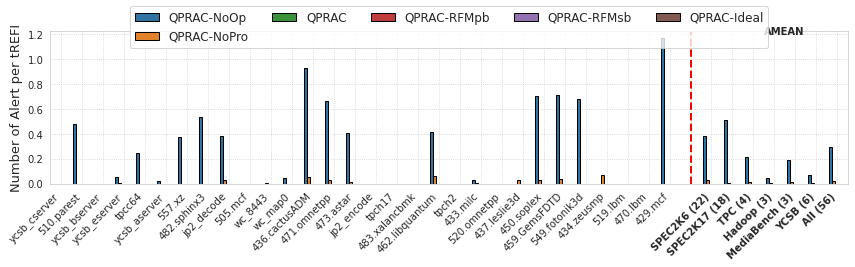

In [9]:

# Filter DataFrame for Trh == 32
df_target = mean_df_abo_all[(mean_df_abo_all['num_RFM'] == 1) & (mean_df_abo_all['TREF_Ratio'] == 1)]
df_no_pro = mean_df_abo_all[(mean_df_abo_all['num_RFM'] == 1) & (mean_df_abo_all['TREF_Ratio'] == 0)]

df_target = df_target.drop(columns=['TREF_Ratio', 'num_RFM', 'PQ-NOPRO', 'PRAC-PQ-NoOpREF'])
df_no_pro = df_no_pro.drop(columns=['TREF_Ratio', 'num_RFM', 'QPRAC-RFMsb', 'QPRAC-RFMpb', 'QPRAC', 'QPRAC-Ideal'])

df_merged = pd.merge(df_no_pro, df_target, on='workload')
print(df_merged)
# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['TREF_Ratio', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ', 'PRAC-Rand'], var_name='PRAC_Implementation', value_name='WS')
# interested_solutions = ["PRAC-PQ-NoOpREF", "PRAC-Rand-NoOpREF", "PRAC-PQ", "PRAC-Rand", "PRAC-Ideal"]

df_melted = pd.melt(df_merged, id_vars=['workload'], value_vars=["PRAC-PQ-NoOpREF", "PQ-NOPRO", "QPRAC", "QPRAC-RFMpb", "QPRAC-RFMsb", "QPRAC-Ideal"], var_name='PRAC_Implementation', value_name='num_alert_tREFI')


rename_mapping = {
    'PRAC-PQ-NoOpREF': 'QPRAC-NoOp',
    'PQ-NOPRO': 'QPRAC-NoPro',
    # 'PRAC-PQ': 'PQ',
    # 'PRAC-Rand': 'PQ-Rand',
    # 'PRAC-Ideal': 'PQ-Ideal'
}
# Replace the values in the PRAC_Implementation column
df_melted['PRAC_Implementation'] = df_melted['PRAC_Implementation'].replace(rename_mapping)

# Filter the data to show the results only for Med and High MPKI
workloads_high_mpki=  ['ycsb_cserver', '510.parest', 'ycsb_bserver', 'ycsb_eserver', 'tpcc64', 'ycsb_aserver', '557.xz', '482.sphinx3', 'jp2_decode', '505.mcf', 'wc_8443', 
                        'wc_map0', '436.cactusADM', '471.omnetpp', '473.astar', 'jp2_encode', 'tpch17', '483.xalancbmk', '462.libquantum', 'tpch2', '433.milc', '520.omnetpp', '437.leslie3d', 
                        '450.soplex', '459.GemsFDTD', '549.fotonik3d', '434.zeusmp', '519.lbm', '470.lbm', '429.mcf', 
                        # 'h264_decode', 'bfs_ny', 'bfs_cm2003', 'bfs_dblp', 
                        '', 'SPEC2K6 (22)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)',
                        'MediaBench (3)', 
                        # 'LonestarGPU (3)', 'MediaBench (4)', 
                        'YCSB (6)', 'All (56)']

df_high_mpki = df_melted[df_melted['workload'].isin(workloads_high_mpki)]

# methods_intersted = ["PQ-NoOp", "PQ-NoPro", "PQ", "PQ-Rand", "PQ-Ideal"]
methods_intersted = ["QPRAC-NoOp", "QPRAC-NoPro", "QPRAC", "QPRAC-Ideal", "QPRAC-RFMsb", "QPRAC-RFMpb"] # Further remove PQ-NoOp if we think we don't need to evalue this in the result section
df_filtered = df_high_mpki[df_high_mpki['PRAC_Implementation'].isin(methods_intersted)]
df_filtered['PRAC_Implementation'] = pd.Categorical(df_filtered['PRAC_Implementation'], categories=methods_intersted, ordered=True)

print(df_filtered)
df_filtered.to_csv('./csv_input_for_plots/4core_nabo_num_of_Alerts_1RFM_64Tabo_4queue.csv', index=False)
# print(df_melted[df_melted['workload'] == '433.milc'])

sns.set_style("whitegrid")

df_filtered = pd.read_csv('./csv_input_for_plots/4core_nabo_num_of_Alerts_1RFM_64Tabo_4queue.csv')

fig, ax = plt.subplots(figsize=(12,4))
plt.rc('font', size=10)
xtick_order = workloads_high_mpki

ax = sns.barplot(x='workload', y='num_alert_tREFI',hue='PRAC_Implementation', data=df_filtered, order=xtick_order, edgecolor='black')

ax.set_xticks(np.arange(len(xtick_order)))
ax.set_xticklabels(xtick_order, ha='right', rotation=45, fontsize = 10)

# y_ticks = [0.25, 0.5, 0.75, 1.0]
# ax.set_yticks(y_ticks)
# ax.set_yticklabels(y_ticks, fontsize=10)

# Get the positions of the x-ticks
tick_labels = ax.get_xticklabels()

# Find the positions of geomean labels
# geomean_labels = ['SPEC2K6 (22)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)', 'LonestarGPU (3)', 'MediaBench (4)', 'YCSB (6)', 'All-60']
geomean_labels = ['SPEC2K6 (22)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)', 'MediaBench (3)', 'YCSB (6)', 'All (56)']
for tick_label in tick_labels:
    if tick_label.get_text() in geomean_labels:
        tick_label.set_fontweight('bold')

# ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
ax.axvline(30, 0, 1, color='red', linestyle = '--', linewidth=2)
ax.text(33.5, 1.2, 'AMEAN', fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('Number of Alert per tREFI', fontsize=13)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=True, shadow=False, fontsize=12)
# plt.yscale('log')
# Hide the legend
# ax.legend().set_visible(False)
# ax.set_ylim(0.0,1)

plt.grid(True, linestyle=':')

plt.tight_layout()
# plt.show()
fig.savefig('./figures/Num_Alerts_per_tREFI_results_64BO_1RFM_4Queue.pdf', dpi=600, bbox_inches='tight')

**ABO==32, Mitigation per 9 tREFI**

    TREF_Ratio        workload PRAC_Implementation        WS
0            9       401.bzip2          PRAC-Ideal  0.967954
1            9         403.gcc          PRAC-Ideal  0.999022
2            9         429.mcf          PRAC-Ideal  0.945645
3            9        433.milc          PRAC-Ideal  0.985075
4            9      434.zeusmp          PRAC-Ideal  0.852840
..         ...             ...                 ...       ...
121          9         TPC (4)             PRAC-PQ  0.969241
122          9      Hadoop (3)             PRAC-PQ  0.983208
123          9  MediaBench (3)             PRAC-PQ  0.981955
124          9        YCSB (6)             PRAC-PQ  0.994601
125          9        All (56)             PRAC-PQ  0.965458

[126 rows x 4 columns]


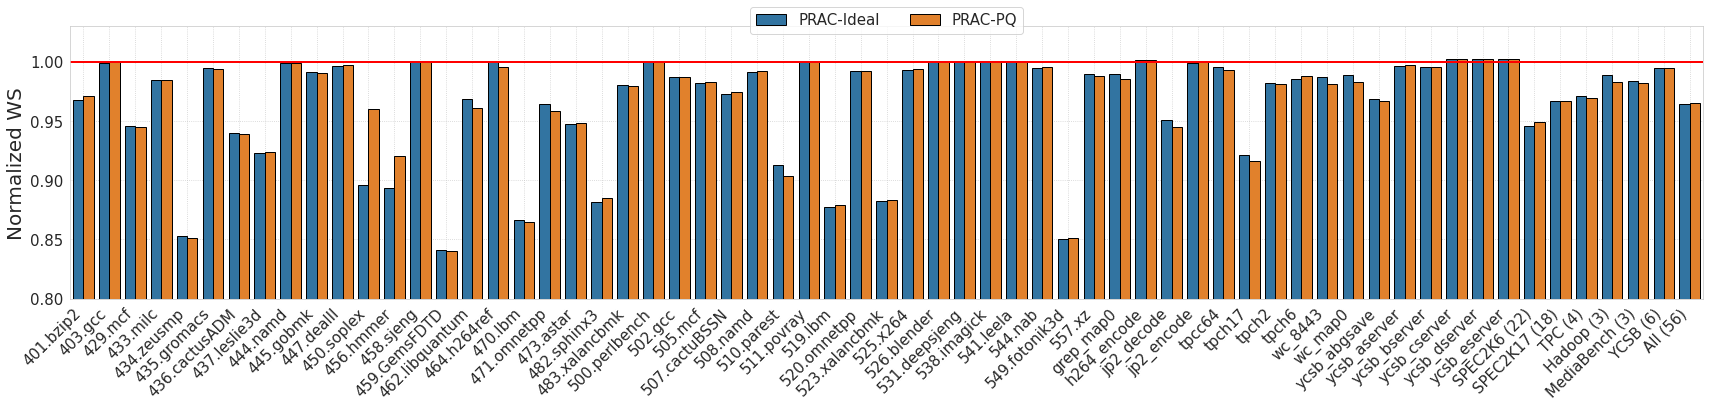

In [38]:
# Filter DataFrame for Trh == 32
df_target = geomean_df[geomean_df['TREF_Ratio'] == 9]

# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['TREF_Ratio', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ', 'PRAC-Rand'], var_name='PRAC_Implementation', value_name='WS')
df_melted = pd.melt(df_target, id_vars=['TREF_Ratio', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ'], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '433.milc'])

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(24,6))
plt.rc('font', size=15)

ax = sns.barplot(x='workload', y='WS',hue='PRAC_Implementation', data=df_melted, edgecolor='black')

# xtick_order = df['workload']

# ax.set_xticks(np.arange(len(xtick_order)))
plt.xticks(ha='right', rotation=45, fontsize=15)
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

ax.set_xlabel('')
ax.set_ylabel('Normalized WS', fontsize=20)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=5, fancybox=True, shadow=False, fontsize=15)

# Hide the legend
# ax.legend().set_visible(False)
ax.set_ylim(0.8,1.03)

plt.grid(True, linestyle=':')

plt.tight_layout()
plt.show()

**Line Graph from TREFI Ratio 1 to 17**

     TREF_Ratio    workload PRAC_Implementation        WS
0             1   401.bzip2     PRAC-PQ-NoOpREF  0.993614
1             1     403.gcc     PRAC-PQ-NoOpREF  1.000000
2             1     429.mcf     PRAC-PQ-NoOpREF  0.999163
3             1    433.milc     PRAC-PQ-NoOpREF  0.997097
4             1  434.zeusmp     PRAC-PQ-NoOpREF  0.819348
...         ...         ...                 ...       ...
2263          9    All (56)          PRAC-Ideal  0.964792
2264         11    All (56)          PRAC-Ideal  0.963217
2265         13    All (56)          PRAC-Ideal  0.963747
2266         15    All (56)          PRAC-Ideal  0.962524
2267         17    All (56)          PRAC-Ideal  0.961339

[2268 rows x 4 columns]


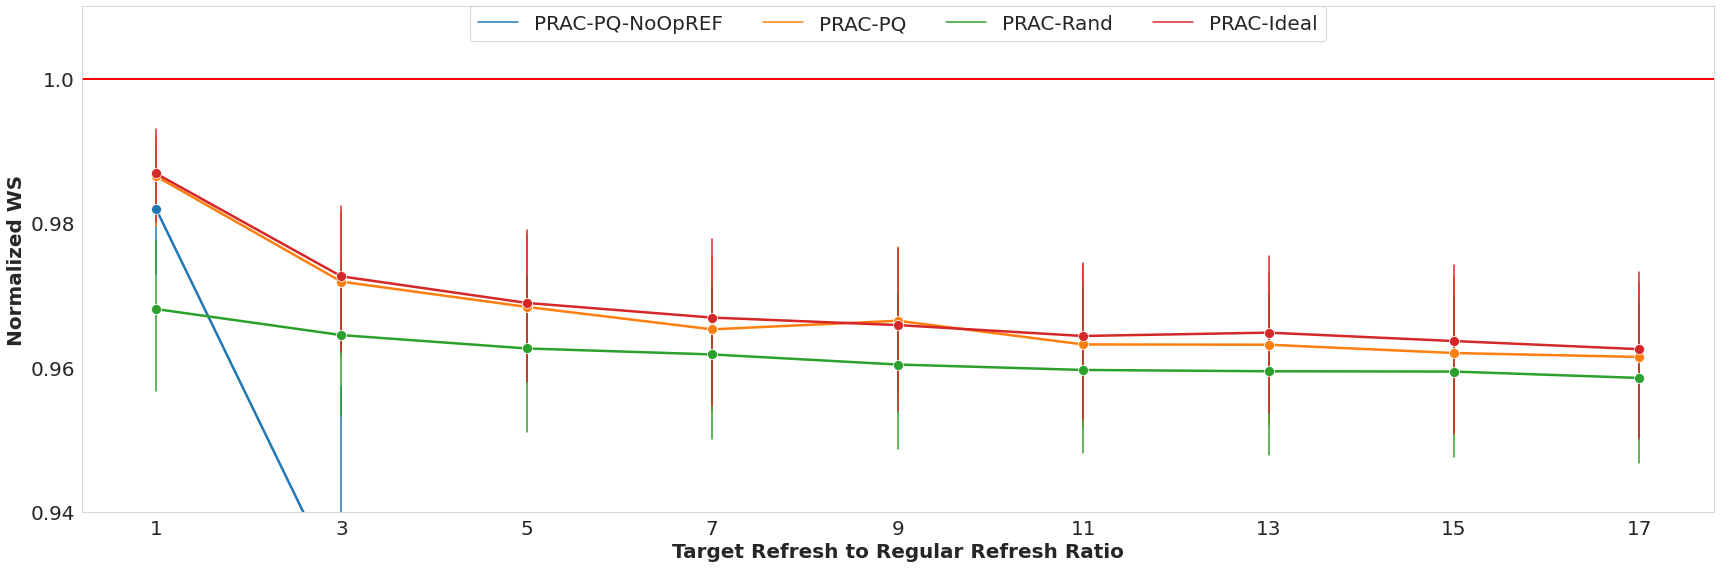

In [10]:
df_target = geomean_df


# Reshape DataFrame for plotting
df_melted = pd.melt(df_target, id_vars=['TREF_Ratio', 'workload'], value_vars=["PRAC-PQ-NoOpREF", "PRAC-PQ", "PRAC-Rand", "PRAC-Ideal"], var_name='PRAC_Implementation', value_name='WS')
print(df_melted)
# print(df_melted[df_melted['workload'] == '429.mcf'])
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(24,8))
# plt.xscale('log')
plt.rc('font', size=10)
x_ticks = [1, 2, 4, 8, 16]

# Use sns.lineplot to plot the line
sns.lineplot(x='TREF_Ratio', y='WS', hue='PRAC_Implementation', data=df_melted, ax=ax, linewidth=2.5, marker='o', markersize=10, err_style='bars', 
)

# Calculate error bars if needed (replace with your actual error calculation)
# For example, using standard deviation
# errors = df_melted.groupby('num_channels')['WS'].std().reset_index()

# # Plot error bars using plt.errorbar
# plt.errorbar(x=errors['num_channels'], y=errors['WS'], yerr=errors['WS'], fmt='none', color='black',
#              ecolor='gray', elinewidth=2, capsize=4, capthick=2)

# xtick_order = df['workload']
plt.grid(axis='both', linestyle='--')

# ax.set_xticks(np.arange(len(xtick_order)))
# Set x-axis to logarithmic scale
# plt.xscale('log')

# Ensure that all data points are visible on logarithmic scale
ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15, 17])
ax.set_xticklabels([1, 3, 5, 7, 9, 11, 13, 15, 17], fontsize=20)
y_ticks = [0.94, 0.96, 0.98, 1.0]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=20)
# plt.xticks(ha='right', rotation=45, fontsize=15)
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=5, fancybox=True, shadow=False, fontsize=20)
ax.set_xlabel('Target Refresh to Regular Refresh Ratio', fontsize=20, weight='bold')
ax.set_ylabel('Normalized WS', fontsize=20, weight='bold')

ax.set_ylim(0.94,1.01)

plt.tight_layout()
plt.show()

    TREF_Ratio    workload PRAC_Implementation        WS
0            1   401.bzip2                  PQ  0.994516
1            1     403.gcc                  PQ  1.000000
2            1     429.mcf                  PQ  0.999035
3            1    433.milc                  PQ  0.999224
4            1  434.zeusmp                  PQ  0.958338
..         ...         ...                 ...       ...
940          1    All (56)            PQ-Ideal  0.996114
941          3    All (56)            PQ-Ideal  0.986646
942          5    All (56)            PQ-Ideal  0.983264
943          7    All (56)            PQ-Ideal  0.980805
944          9    All (56)            PQ-Ideal  0.981218

[630 rows x 4 columns]


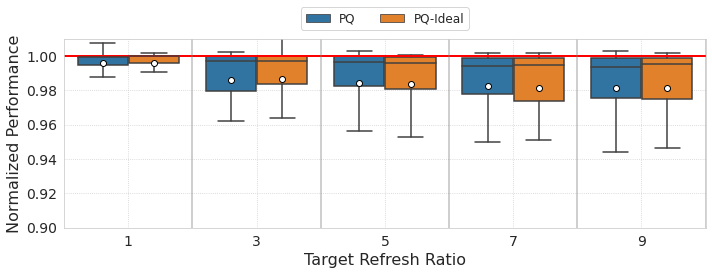

In [46]:
df_target = geomean_df[(geomean_df['num_RFM'] == 1) &  (geomean_df['TREF_Ratio'].isin([1, 3, 5, 7, 9]))]

# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['TREF_Ratio', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ', 'PRAC-Rand'], var_name='PRAC_Implementation', value_name='WS')
# interested_solutions = ["PRAC-PQ-NoOpREF", "PRAC-Rand-NoOpREF", "PRAC-PQ", "PRAC-Rand", "PRAC-Ideal"]

df_melted = pd.melt(df_target, id_vars=['TREF_Ratio', 'workload'], value_vars=["PRAC-PQ", "PRAC-Rand", "PRAC-Ideal"], var_name='PRAC_Implementation', value_name='WS')


# methods_intersted = ["PRAC-PQ-NoOpREF", "PRAC-PQ", "PRAC-Rand", "PRAC-Ideal"]
methods_intersted = ["PRAC-PQ","PRAC-Ideal"]
df_filtered = df_melted[df_melted['PRAC_Implementation'].isin(methods_intersted)]
df_filtered['PRAC_Implementation'] = pd.Categorical(df_filtered['PRAC_Implementation'], categories=methods_intersted, ordered=True)
rename_mapping = {
    'PRAC-PQ-NoOpREF': 'PQ-NoOp',
    'PRAC-PQ': 'PQ',
    'PRAC-Rand': 'PQ-Rand',
    'PRAC-Ideal': 'PQ-Ideal'
}
df_filtered['PRAC_Implementation'] = df_filtered['PRAC_Implementation'].replace(rename_mapping)
print(df_filtered)
df_filtered.to_csv('./csv_input_for_plots/4core_32BO_8queue_varying_TREF_Ratio.csv', index=False)
# print(df_melted[df_melted['workload'] == '433.milc'])

sns.set_style("whitegrid")

# df_filtered = pd.read_csv('./csv_input_for_plots/4core_32BO_8queue_varying_TREF_Ratio.csv')

fig, ax = plt.subplots(figsize=(10,4))
plt.rc('font', size=10)
ax = sns.boxplot(x='TREF_Ratio', y='WS', hue='PRAC_Implementation', data=df_filtered ,showmeans=True, showfliers=False, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# y_ticks = [0.25, 0.5, 0.75, 1.0]
# ax.set_yticks(y_ticks)
# ax.set_yticklabels(y_ticks, fontsize=10)

# Get the positions of the x-ticks
# Find the positions of geomean labels
# geomean_labels = ['SPEC2K6 (22)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)', 'LonestarGPU (3)', 'MediaBench (4)', 'YCSB (6)', 'All-60']
# ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

ax.set_xlabel('Target Refresh Ratio', fontsize=16)
ax.set_ylabel('Normalized Performance', fontsize=16)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=True, shadow=False, fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
# plt.yscale('log')
# Hide the legend
# ax.legend().set_visible(False)
ax.set_ylim(0.9,1.01)
ax.axvline(x=0.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=1.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=2.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=3.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=4.5, color='grey', linestyle='-', alpha=0.5)

plt.grid(True, linestyle=':')

plt.tight_layout()
# plt.show()
fig.savefig('./figures/4cores_results_varying_targetREF_Ratio_BO32_8queue_1RFM.pdf', dpi=600, bbox_inches='tight')

**Mitigation Study -- T_<sub>BO</sub> sensitivity study**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
multicore_4cores_out_path = "../mitigation_overhead_study/ABO_study/target_ref_per_1trefi/4PQ_Entry/results_4cores"
prac_latency_overhead_only_path = "../mitigation_overhead_study/results_4cores/robaracoch_mapping/PRAC_WO_Mitigation/stats/"
# singlecore_out_path = "../mitigation_enabled/results_singlecore/adaptive_closed_page"

df = pd.DataFrame(columns=["mitigation", "num_RFM", "Tabo", "workload", "WS"])
# mitigation_list = ["QPRAC-NoOp", "QPRAC-NoPro", "QPRAC", "QPRAC-RFMsb", "QPRAC-RFMpb", "QPRAC-Ideal"]
mitigation_list = ["QPRAC-NoOp", "QPRAC-NoPro", "QPRAC-RFMsb", "QPRAC-RFMpb", "QPRAC-Ideal"]
for num_rfm in [1,2,4]:
    for mitigation in mitigation_list:
        result_path = multicore_4cores_out_path + "/" + str(num_rfm) + "rfm_per_alert/" + mitigation +"/stats/"
        result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
        for result_filename in result_list:
            result_file = open(result_path + result_filename + ".txt", "r")
            trh = int(result_filename.split("_")[0])
            if trh not in [16, 32, 64, 128, 256]:
                continue
            workload = "_".join(result_filename.split("_")[1:])

            ipc_0 = 0
            ipc_1 = 0
            ipc_2 = 0
            ipc_3 = 0
            cycle_0 = 0
            cycle_1 = 0
            cycle_2 = 0
            cycle_3 = 0
            num_inst_0=0
            num_inst_1=0
            num_inst_2=0
            num_inst_3=0
            num_abo=0
            num_tREFI_period=0
            num_tREFW_period=0
            for line in result_file.readlines():
                if (" cycles_recorded_core_0:" in line):
                    cycle_0 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_1:" in line):
                    cycle_1 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_2:" in line):
                    cycle_2 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_3:" in line):
                    cycle_3 = int(line.split(" ")[-1])
                if (" insts_recorded_core_0" in line):
                    num_inst_0 = int(line.split(" ")[-1])
                if (" insts_recorded_core_1" in line):
                    num_inst_1 = int(line.split(" ")[-1])
                if (" insts_recorded_core_2" in line):
                    num_inst_2 = int(line.split(" ")[-1])
                if (" insts_recorded_core_3" in line):
                    num_inst_3 = int(line.split(" ")[-1])
                if (" prac_num_recovery" in line):
                    num_abo = int(line.split(" ")[-1])
                if (" num_refresh_command_0" in line):
                    num_tREFI_period = int(line.split(" ")[-1])
                if (" num_refresh_window_0" in line):
                    num_tREFW_period = int(line.split(" ")[-1])            
                    
            if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
                continue
            if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
                print("Error: " + result_filename)
            ipc_0 = int(num_inst_0) / cycle_0
            ipc_1 = int(num_inst_1) / cycle_1
            ipc_2 = int(num_inst_2) / cycle_2
            ipc_3 = int(num_inst_3) / cycle_3
            num_abo_per_trefi = int(num_abo) / int(num_tREFI_period)
            if int(num_tREFW_period) == 0:
                num_abo_per_trefw = int(num_abo)
            else:
                num_abo_per_trefw = int(num_abo) / int(num_tREFW_period)
            # print(workload)
            # print(ipc)

            result_file.close()
            df = df.append({'mitigation': mitigation, 'num_RFM': num_rfm, 'Tabo': trh, "workload": workload, "WS": ipc_0+ipc_1+ipc_2+ipc_3, "num_abo_trefi": num_abo_per_trefi, "num_abo_trefw": num_abo_per_trefw} , ignore_index=True)

# Process no_proactive_mitigation results here
df = df.pivot(index=['num_RFM','Tabo','workload'], columns=['mitigation'], values='WS').reset_index()     

# Verify columns
print(df.columns)

# for mitigation in set(mitigation_list) - set(['Baseline']):
#     df[mitigation] = df[mitigation] / df['Baseline']
# Process Baseline results here
baseline_df = pd.DataFrame(columns=['workload', 'PRAC_wo_mitigation_WS'])
baseline_result_list = [x[:-4] for x in os.listdir(prac_latency_overhead_only_path) if x.endswith(".txt")]
for result_filename in baseline_result_list:
    result_file = open(prac_latency_overhead_only_path + result_filename + ".txt", "r")
    trh = int(result_filename.split("_")[0])
    if trh != 32:
         continue
    # workload = result_filename.split("_")[1:]
    workload = "_".join(result_filename.split("_")[1:])

    ipc_0 = 0
    ipc_1 = 0
    ipc_2 = 0
    ipc_3 = 0
    cycle_0 = 0
    cycle_1 = 0
    cycle_2 = 0
    cycle_3 = 0
    num_inst_0=0
    num_inst_1=0
    num_inst_2=0
    num_inst_3=0
    for line in result_file.readlines():
        if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_1:" in line):
                cycle_1 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_2:" in line):
                cycle_2 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_3:" in line):
                cycle_3 = int(line.split(" ")[-1])
        if (" insts_recorded_core_0" in line):
            num_inst_0 = int(line.split(" ")[-1])
        if (" insts_recorded_core_1" in line):
            num_inst_1 = int(line.split(" ")[-1])
        if (" insts_recorded_core_2" in line):
            num_inst_2 = int(line.split(" ")[-1])
        if (" insts_recorded_core_3" in line):
            num_inst_3 = int(line.split(" ")[-1])
    if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
        continue
    if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
        print("Error: " + result_filename)
    ipc_0 = int(num_inst_0) / cycle_0
    ipc_1 = int(num_inst_1) / cycle_1
    ipc_2 = int(num_inst_2) / cycle_2
    ipc_3 = int(num_inst_3) / cycle_3

    # print(workload)
    # print(ipc)

    result_file.close()
    baseline_df = baseline_df.append({"workload": workload, "PRAC_wo_mitigation_WS": ipc_0+ipc_1+ipc_2+ipc_3}, ignore_index=True)



df = df.merge(baseline_df, on='workload', how='left')
# mitigation_list = ["QPRAC-NoOp", "QPRAC-NoPro", "QPRAC", "QPRAC-RFMsb", "QPRAC-RFMpb", "QPRAC-Ideal"]
mitigation_list = ["QPRAC-NoOp", "QPRAC-NoPro", "QPRAC-RFMsb", "QPRAC-RFMpb", "QPRAC-Ideal"]
for mitigation in set(mitigation_list) - set(['PRAC_wo_mitigation_WS']):
     df[mitigation] = df[mitigation] / df['PRAC_wo_mitigation_WS']
# Set 'Baseline' column to 1 for all rows
df['PRAC_wo_mitigation_WS'] = 1
df.drop(columns=['PRAC_wo_mitigation_WS'], inplace=True)
print(df)


workload_interests = ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk', 
                      '500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz',
                      'tpcc64', 'tpch17', 'tpch2', 'tpch6',
                      'grep_map0', 'wc_8443', 'wc_map0',
                    #   'bfs_dblp', 'bfs_cm2003','bfs_ny',
                    #   'h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'
                      'h264_encode', 'jp2_decode', 'jp2_encode',
                      'ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'
                      ]

df_interest = df[df['workload'].isin(workload_interests)]

# Function to identify columns with NaN values
# def identify_nan_columns(row):
#     return ', '.join(row.index[row.isna()].tolist())

# # Create a new column with NaN columns information
# df_interest['NaN_Columns'] = df_interest.apply(identify_nan_columns, axis=1)

# # Check which workloads have NaN values and display them
# nan_check = df_interest.isna().any(axis=1)
# workloads_with_nan = df_interest[nan_check]
# if not workloads_with_nan.empty:
#     print(f"Workloads with NaN values and the columns: \n{workloads_with_nan[['workload', 'NaN_Columns']]}")
# else:
#     print("No workloads have NaN values in any column.")
# if not workloads_with_nan.empty:
#     unique_workloads = workloads_with_nan['workload'].unique()
#     print(f"Unique workloads with NaN values: {', '.join(unique_workloads)}")
# else:
#     print("No workloads have NaN values in any column.")

# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (22)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 22
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    # 'LonestarGPU (3)': ['bfs_dblp', 'bfsbfs_cm2003_cm_2003','bfs_ny'], #lnestargpu: 3
    # 'MediaBench (4)': ['h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 4
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
# Function to calculate geometric mean
def calculate_geometric_mean(series):
    return np.prod(series) ** (1 / len(series))


# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for num_rfm in df['num_RFM'].unique():
        for trh in df['Tabo'].unique():
            for suite_name, workloads in benchmark_suites.items():
                suite_df = df[df['workload'].isin(workloads) & (df['Tabo'] == trh)  & (df['num_RFM'] == num_rfm)]
                if not suite_df.empty:
                    geomean_prac_ideal = calculate_geometric_mean(suite_df['QPRAC-Ideal'])
                    # geomean_prac_pq = calculate_geometric_mean(suite_df['QPRAC'])
                    geomean_prac_rfmsb = calculate_geometric_mean(suite_df['QPRAC-RFMsb'])
                    geomean_prac_rfmpb = calculate_geometric_mean(suite_df['QPRAC-RFMpb'])
                    geomean_prac_no_pro = calculate_geometric_mean(suite_df['QPRAC-NoPro'])
                    geomean_prac_pq_no_op = calculate_geometric_mean(suite_df['QPRAC-NoOp'])
                    # geomean_prac_wo_mitigation = calculate_geometric_mean(suite_df['PRAC_WO_Mitigation'])
                    geomean_df = geomean_df.append({
                        'num_RFM': num_rfm,
                        'Tabo': trh,
                        'workload': suite_name,
                        'QPRAC-Ideal': geomean_prac_ideal,
                        # 'QPRAC': geomean_prac_pq,
                        'QPRAC-RFMsb': geomean_prac_rfmsb,
                        'QPRAC-RFMpb': geomean_prac_rfmpb,
                        'QPRAC-NoPro': geomean_prac_no_pro,
                        'QPRAC-NoOp': geomean_prac_pq_no_op,
                        # 'PRAC_WO_Mitigation': geomean_prac_wo_mitigation
                    }, ignore_index=True)
        
    return df.append(geomean_df, ignore_index=True)

# Call function to calculate and merge geometric means
geomean_df = add_geomean_rows(df_interest)


# Function to add 'All-60' rows for each trh value
def add_all_workloads_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)

    for num_rfm in df['num_RFM'].unique():
        for trh in df['Tabo'].unique():
            trh_df = df[(df['Tabo'] == trh) & (df['num_RFM'] == num_rfm)]
            geomean_prac_ideal = calculate_geometric_mean(trh_df['QPRAC-Ideal'])
            # geomean_prac_pq = calculate_geometric_mean(trh_df['QPRAC'])
            geomean_prac_rfmsb = calculate_geometric_mean(trh_df['QPRAC-RFMsb'])
            geomean_prac_rfmpb = calculate_geometric_mean(trh_df['QPRAC-RFMpb'])
            geomean_prac_no_pro = calculate_geometric_mean(trh_df['QPRAC-NoPro'])
            geomean_prac_pq_no_op = calculate_geometric_mean(trh_df['QPRAC-NoOp'])
            # geomean_prac_wo_mitigation = calculate_geometric_mean(trh_df['PRAC_WO_Mitigation'])
            
            all_workloads_geomean_df = pd.DataFrame({      
                'num_RFM': [num_rfm],
                'Tabo': [trh],
                'workload': ['All (56)'],
                'QPRAC-Ideal': [geomean_prac_ideal],
                # 'QPRAC': [geomean_prac_pq],
                'QPRAC-RFMsb': [geomean_prac_rfmsb],
                'QPRAC-RFMpb': [geomean_prac_rfmpb],
                'QPRAC-NoPro': [geomean_prac_no_pro],
                'QPRAC-NoOp': [geomean_prac_pq_no_op],
                # 'PRAC_WO_Mitigation': [geomean_prac_wo_mitigation]
            })
            
            geomean_df = pd.concat([geomean_df, all_workloads_geomean_df], ignore_index=True)
    
    return pd.concat([df, geomean_df], ignore_index=True)

geomean_df = add_all_workloads_geomean_rows(geomean_df)
print(geomean_df)
print(geomean_df[geomean_df['workload'] == 'All (56)'])
# geomean_df[['Tabo','workload', 'PRAC-Ideal', 'PRAC-PQ']].to_csv('./performance_results_4cores_ABO1000_1.csv', index=False)

Index(['num_RFM', 'Tabo', 'workload', 'QPRAC-Ideal', 'QPRAC-NoOp',
       'QPRAC-NoPro', 'QPRAC-RFMpb', 'QPRAC-RFMsb'],
      dtype='object', name='mitigation')
     num_RFM  Tabo      workload  QPRAC-Ideal  QPRAC-NoOp  QPRAC-NoPro  \
0          1    16     401.bzip2     0.714732    0.495134     0.701326   
1          1    16       403.gcc     0.913880         NaN     0.911678   
2          1    16       429.mcf     0.328081    0.123120     0.283703   
3          1    16      433.milc     0.454282    0.371063     0.445427   
4          1    16    434.zeusmp     0.428405    0.200150     0.393800   
..       ...   ...           ...          ...         ...          ...   
803        4   256  ycsb_aserver     0.479517    0.479373     0.479318   
804        4   256  ycsb_bserver     0.463188    0.462402     0.462232   
805        4   256  ycsb_cserver     0.454553    0.454352     0.454001   
806        4   256  ycsb_dserver     0.520793    0.519336     0.520333   
807        4   256  ycsb_

    num_RFM Tabo    workload  PQ-NOPRO  PRAC-Ideal   PRAC-PQ  PRAC-PQ-NoOpREF  \
0         1   16   401.bzip2  0.934911    0.942561  0.944933         0.694815   
1         1   16     403.gcc  0.996878    0.998699  0.999404         0.966550   
2         1   16     429.mcf  0.853882    0.873846  0.872062         0.259422   
3         1   16    433.milc  0.952647    0.968544  0.968415         0.704511   
4         1   16  434.zeusmp  0.751112    0.764302  0.762796         0.330304   
..      ...  ...         ...       ...         ...       ...              ...   
930       1   16    All (56)  0.911412    0.918662  0.918043         0.635122   
931       1   32    All (56)  0.976120    0.983264  0.984056         0.779714   
932       1   64    All (56)  0.994543    0.998408  0.997887         0.892082   
933       1  128    All (56)  0.998533    0.999998  1.000000         0.958880   
934       1  256    All (56)  0.999879    1.000000  1.000000         0.986006   

     PRAC-Rand  
0     0.94

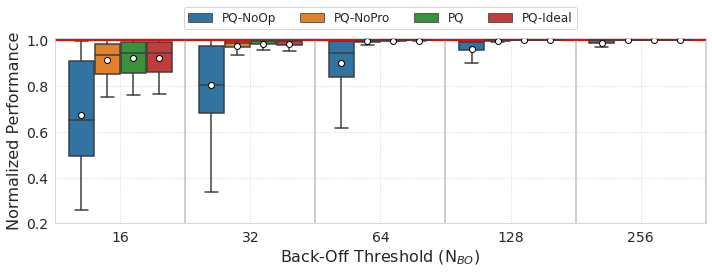

In [37]:
df_target = geomean_df[(geomean_df['num_RFM'] == 1) &  (geomean_df['Tabo'].isin([16, 32, 64, 128, 256]))]
print(df_target)
# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['TREF_Ratio', 'workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ', 'PRAC-Rand'], var_name='PRAC_Implementation', value_name='WS')
# interested_solutions = ["PRAC-PQ-NoOpREF", "PRAC-Rand-NoOpREF", "PRAC-PQ", "PRAC-Rand", "PRAC-Ideal"]

df_melted = pd.melt(df_target, id_vars=['Tabo', 'workload'], value_vars=["QPRAC-PQ-NoOpREF", "PQ-NOPRO", "PRAC-PQ", "PRAC-Rand", "PRAC-Ideal"], var_name='PRAC_Implementation', value_name='WS')


# methods_intersted = ["PRAC-PQ-NoOpREF", "PQ-NOPRO", "PRAC-PQ", "PRAC-Rand", "PRAC-Ideal"]
methods_intersted = ["PRAC-PQ-NoOpREF", "PQ-NOPRO", "PRAC-PQ", "PRAC-Ideal"]
df_filtered = df_melted[df_melted['PRAC_Implementation'].isin(methods_intersted)]
df_filtered['PRAC_Implementation'] = pd.Categorical(df_filtered['PRAC_Implementation'], categories=methods_intersted, ordered=True)
rename_mapping = {
    'PRAC-PQ-NoOpREF': 'PQ-NoOp',
    'PQ-NOPRO': 'PQ-NoPro',
    'PRAC-PQ': 'PQ',
    'PRAC-Rand': 'PQ-Rand',
    'PRAC-Ideal': 'PQ-Ideal'
}
df_filtered['PRAC_Implementation'] = df_filtered['PRAC_Implementation'].replace(rename_mapping)

print(df_filtered)
df_filtered.to_csv('./csv_input_for_plots/4core_32BO_8queue_varying_TREF_Ratio.csv', index=False)
# print(df_melted[df_melted['workload'] == '433.milc'])

sns.set_style("whitegrid")

# df_filtered = pd.read_csv('./csv_input_for_plots/4core_32BO_8queue_varying_TREF_Ratio.csv')
print(df_filtered['PRAC_Implementation'].unique())
fig, ax = plt.subplots(figsize=(10,4))
plt.rc('font', size=10)
ax = sns.boxplot(x='Tabo', y='WS', hue='PRAC_Implementation', data=df_filtered ,showmeans=True, showfliers=False, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})

# y_ticks = [0.25, 0.5, 0.75, 1.0]
# ax.set_yticks(y_ticks)
# ax.set_yticklabels(y_ticks, fontsize=10)

# Get the positions of the x-ticks
# Find the positions of geomean labels
# geomean_labels = ['SPEC2K6 (22)', 'SPEC2K17 (18)', 'TPC (4)', 'Hadoop (3)', 'LonestarGPU (3)', 'MediaBench (4)', 'YCSB (6)', 'All-60']
# ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

ax.set_xlabel('Back-Off Threshold (N$_{BO}$)', fontsize=16)
ax.set_ylabel('Normalized Performance', fontsize=16)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5, fancybox=True, shadow=False, fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
# plt.yscale('log')
# Hide the legend
# ax.legend().set_visible(False)
ax.set_ylim(0.2,1.01)
ax.axvline(x=0.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=1.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=2.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=3.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=4.5, color='grey', linestyle='-', alpha=0.5)

plt.grid(True, linestyle=':')

plt.tight_layout()
# plt.show()
fig.savefig('./figures/4cores_results_ABOStudy_8queue_1RFM_1TREF_per_tREFI.pdf', dpi=600, bbox_inches='tight')

           workload          mitigation        WS
0         401.bzip2          PRAC-Ideal  0.930716
1           403.gcc          PRAC-Ideal  0.987745
2           429.mcf          PRAC-Ideal  0.786157
3          433.milc          PRAC-Ideal  0.883331
4        434.zeusmp          PRAC-Ideal  0.734107
..              ...                 ...       ...
172   SPEC2K17 (18)  PRAC_WO_Mitigation  0.933804
173         TPC (4)  PRAC_WO_Mitigation  0.927588
174  MediaBench (3)  PRAC_WO_Mitigation  0.988968
175        YCSB (6)  PRAC_WO_Mitigation  0.935620
176        All (54)  PRAC_WO_Mitigation  0.929598

[177 rows x 3 columns]


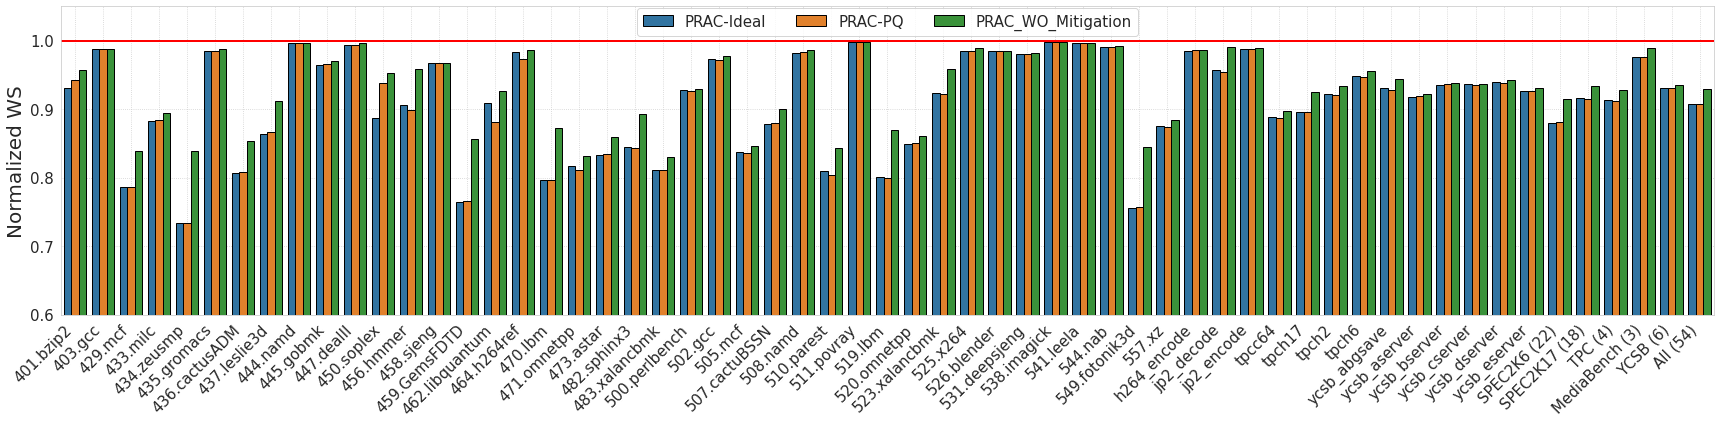

In [5]:
# Filter DataFrame for Trh == 32
df_32 = geomean_df[geomean_df['trh'] == 32]

# Reshape DataFrame for plotting
df_melted = pd.melt(df_32, id_vars=['workload'], value_vars=['PRAC-Ideal', 'PRAC-PQ', 'PRAC_WO_Mitigation'], var_name='mitigation', value_name='WS')
print(df_melted)

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(24,6))
plt.rc('font', size=10)

ax = sns.barplot(x='workload', y='WS',hue='mitigation', data=df_melted, edgecolor='black')

# xtick_order = df['workload']

# ax.set_xticks(np.arange(len(xtick_order)))
plt.xticks(ha='right', rotation=45, fontsize=15)
plt.yticks(fontsize=15)
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=5, fancybox=True, shadow=False, fontsize=15)

ax.set_xlabel('')
ax.set_ylabel('Normalized WS', fontsize=20)

ax.set_ylim(0.6,1.05)

plt.grid(True, linestyle=':')

plt.tight_layout()
plt.show()

        workload   trh          mitigation        WS
53     401.bzip2    32          PRAC-Ideal  0.930716
54       403.gcc    32          PRAC-Ideal  0.987745
55       429.mcf    32          PRAC-Ideal  0.786157
56      433.milc    32          PRAC-Ideal  0.883331
57    434.zeusmp    32          PRAC-Ideal  0.734107
...          ...   ...                 ...       ...
1234    All (54)    64  PRAC_WO_Mitigation  0.929598
1235    All (54)   125  PRAC_WO_Mitigation  0.929598
1236    All (54)   250  PRAC_WO_Mitigation  0.929598
1237    All (54)   500  PRAC_WO_Mitigation  0.929598
1238    All (54)  1000  PRAC_WO_Mitigation  0.929598

[1062 rows x 4 columns]


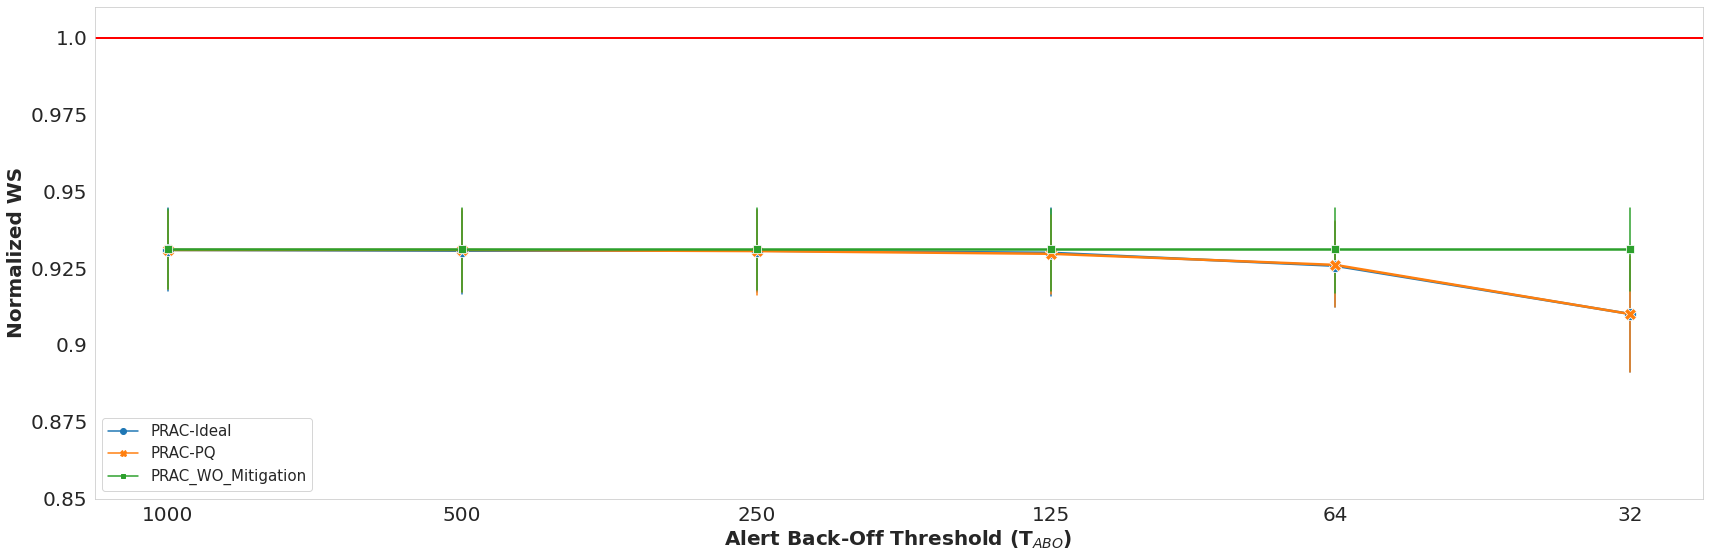

In [7]:
# Filter DataFrame for Trh == 32
# df_target = geomean_df[geomean_df['num_channels'] == 2]
df_target = geomean_df


# Reshape DataFrame for plotting
# df_melted = pd.melt(df_target, id_vars=['workload'], value_vars=['PRAC_WO_Mitigation'], var_name='mitigation', value_name='WS')
df_melted = pd.melt(df_target, id_vars=['workload', 'trh'], var_name='mitigation', value_name='WS')
# List of desired trh values
trh_values_of_interest = [1000, 500, 250, 125, 64, 32]
# Filter the DataFrame for the desired trh values
df_filtered = df_melted[df_melted['trh'].isin(trh_values_of_interest)]
print(df_filtered)
# print(df_melted[df_melted['workload'] == '429.mcf'])
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(24,8))
# plt.xscale('log')
plt.rc('font', size=15)
x_ticks = trh_values_of_interest

# Use sns.lineplot to plot the line
sns.lineplot(x='trh', y='WS', hue='mitigation', data=df_filtered, ax=ax, 
             linewidth=2.5, markers=True, dashes=False, style='mitigation', 
             markersize=12, err_style='bars', 
             hue_order=['PRAC-Ideal', 'PRAC-PQ', 'PRAC_WO_Mitigation']
)

# xtick_order = df['workload']
plt.grid(axis='both', linestyle='--')

# ax.set_xticks(np.arange(len(xtick_order)))
# Set x-axis to logarithmic scale
plt.gca().invert_xaxis()
plt.xscale('log')

# Ensure that all data points are visible on logarithmic scale
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, fontsize=20)
y_ticks = [0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=20)
# plt.xticks(ha='right', rotation=45, fontsize=15)
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
# ax.legend(title='Num of Channels', title_fontsize=15,loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=5, fancybox=True, shadow=False, fontsize=15)
ax.set_xlabel('Alert Back-Off Threshold (T$_{ABO}$)', fontsize=20, weight='bold')
ax.set_ylabel('Normalized WS', fontsize=20, weight='bold')

ax.legend(loc='best', fancybox=True, shadow=False, fontsize=15)
ax.set_ylim(0.85,1.01)

plt.tight_layout()
plt.show()

**Queue Size Study**

**No Proactive Mitigation**

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
multicore_4cores_out_path = "../mitigation_overhead_study/queue_size_study/results_4cores/robaracoch_mapping/32BOTh/no_proactive_mitiagtion"
prac_latency_overhead_only_path = "../mitigation_overhead_study/results_4cores/robaracoch_mapping/PRAC_WO_Mitigation/stats/"
# singlecore_out_path = "../mitigation_enabled/results_singlecore/adaptive_closed_page"

df = pd.DataFrame(columns=["mitigation", "num_RFM", "queue_size", "workload", "WS"])
mitigation_list = ["PRAC-PQ-NoOpREF", "PRAC-PQ"]
for num_rfm in [1,2,4]:    
    for mitigation in mitigation_list:
        result_path = multicore_4cores_out_path + "/" + str(num_rfm) + "rfm_per_alert/" + mitigation +"/stats/"
        result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
        for result_filename in result_list:
            result_file = open(result_path + result_filename + ".txt", "r")
            trh = int(result_filename.split("_")[0])
            # workload = result_filename.split("_")[1:]
            workload = "_".join(result_filename.split("_")[1:])

            ipc_0 = 0
            ipc_1 = 0
            ipc_2 = 0
            ipc_3 = 0
            cycle_0 = 0
            cycle_1 = 0
            cycle_2 = 0
            cycle_3 = 0
            num_inst_0=0
            num_inst_1=0
            num_inst_2=0
            num_inst_3=0
            for line in result_file.readlines():
                if (" cycles_recorded_core_0:" in line):
                    cycle_0 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_1:" in line):
                    cycle_1 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_2:" in line):
                    cycle_2 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_3:" in line):
                    cycle_3 = int(line.split(" ")[-1])
                if (" insts_recorded_core_0" in line):
                    num_inst_0 = int(line.split(" ")[-1])
                if (" insts_recorded_core_1" in line):
                    num_inst_1 = int(line.split(" ")[-1])
                if (" insts_recorded_core_2" in line):
                    num_inst_2 = int(line.split(" ")[-1])
                if (" insts_recorded_core_3" in line):
                    num_inst_3 = int(line.split(" ")[-1])
            if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
                continue
            if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
                print("Error: " + result_filename)
            ipc_0 = int(num_inst_0) / cycle_0
            ipc_1 = int(num_inst_1) / cycle_1
            ipc_2 = int(num_inst_2) / cycle_2
            ipc_3 = int(num_inst_3) / cycle_3

            # print(workload)
            # print(ipc)

            result_file.close()
            df = df.append({'mitigation': mitigation, 'num_RFM': num_rfm, 'queue_size': trh, "workload": workload, "WS": ipc_0+ipc_1+ipc_2+ipc_3}, ignore_index=True)


df = df.pivot(index=['num_RFM','queue_size','workload'], columns=['mitigation'], values='WS').reset_index()     

# Process Baseline results here
baseline_df = pd.DataFrame(columns=['workload', 'PRAC_wo_mitigation_WS'])
baseline_result_list = [x[:-4] for x in os.listdir(prac_latency_overhead_only_path) if x.endswith(".txt")]
for result_filename in baseline_result_list:
    result_file = open(prac_latency_overhead_only_path + result_filename + ".txt", "r")
    trh = int(result_filename.split("_")[0])
    if trh != 32:
         continue
    # workload = result_filename.split("_")[1:]
    workload = "_".join(result_filename.split("_")[1:])

    ipc_0 = 0
    ipc_1 = 0
    ipc_2 = 0
    ipc_3 = 0
    cycle_0 = 0
    cycle_1 = 0
    cycle_2 = 0
    cycle_3 = 0
    num_inst_0=0
    num_inst_1=0
    num_inst_2=0
    num_inst_3=0
    for line in result_file.readlines():
        if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_1:" in line):
                cycle_1 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_2:" in line):
                cycle_2 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_3:" in line):
                cycle_3 = int(line.split(" ")[-1])
        if (" insts_recorded_core_0" in line):
            num_inst_0 = int(line.split(" ")[-1])
        if (" insts_recorded_core_1" in line):
            num_inst_1 = int(line.split(" ")[-1])
        if (" insts_recorded_core_2" in line):
            num_inst_2 = int(line.split(" ")[-1])
        if (" insts_recorded_core_3" in line):
            num_inst_3 = int(line.split(" ")[-1])
    if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
        continue
    if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
        print("Error: " + result_filename)
    ipc_0 = int(num_inst_0) / cycle_0
    ipc_1 = int(num_inst_1) / cycle_1
    ipc_2 = int(num_inst_2) / cycle_2
    ipc_3 = int(num_inst_3) / cycle_3

    # print(workload)
    # print(ipc)

    result_file.close()
    baseline_df = baseline_df.append({"workload": workload, "PRAC_wo_mitigation_WS": ipc_0+ipc_1+ipc_2+ipc_3}, ignore_index=True)

# print(df)
# print(baseline_df)

df = df.merge(baseline_df, on='workload', how='left')
df["PRAC-PQ"] = df['PRAC-PQ'] / df['PRAC_wo_mitigation_WS']
df["PRAC-PQ-NoOpREF"] = df['PRAC-PQ-NoOpREF'] / df['PRAC_wo_mitigation_WS']
df.drop(columns=['PRAC_wo_mitigation_WS'], inplace=True)
print(df[(df['queue_size'] == 1) & (df['workload'] == '429.mcf')])


workload_interests = ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk', 
                      '500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz',
                      'tpcc64', 'tpch17', 'tpch2', 'tpch6',
                      'grep_map0', 'wc_8443', 'wc_map0',
                    #   'bfs_dblp', 'bfsbfs_cm2003_cm_2003','bfs_ny',
                    #   'h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'
                      'h264_encode', 'jp2_decode', 'jp2_encode',
                      'ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'
                      ]

df_interest = df[df['workload'].isin(workload_interests)]

#To rerun workloads: Check for NaN values in each column for each workload
# nan_check = df_interest.isna().any(axis=1)
# Workloads with NaN values in any column
# workloads_with_nan = df_interest[nan_check]['workload'].unique()
# if len(workloads_with_nan) > 0:
#     print(f"Workloads with NaN values in any column: {list(workloads_with_nan)}")
# else:
#     print("No workloads have NaN values in any column.")

# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (22)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 22
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    # 'LonestarGPU (3)': ['bfs_dblp', 'bfsbfs_cm2003_cm_2003','bfs_ny'], #lnestargpu: 3
    # 'MediaBench (4)': ['h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 4
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
# Function to calculate geometric mean
def calculate_geometric_mean(series):
    return np.prod(series) ** (1 / len(series))

interested_solutions = ["PRAC-PQ-NoOpREF", "PRAC-PQ"]

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for num_rfm in df['num_RFM'].unique():
        for trh in df['queue_size'].unique():
            for suite_name, workloads in benchmark_suites.items():
                suite_df = df[df['workload'].isin(workloads) & (df['queue_size'] == trh) & (df['num_RFM'] == num_rfm)]
                if not suite_df.empty:
                    geomean_prac_pq = calculate_geometric_mean(suite_df['PRAC-PQ'])
                    geomean_prac_pq_no_ref = calculate_geometric_mean(suite_df['PRAC-PQ-NoOpREF'])
                # geomean_prac_wo_mitigation = calculate_geometric_mean(suite_df['PRAC_WO_Mitigation'])
                    geomean_df = geomean_df.append({
                        'num_RFM': num_rfm,
                        'queue_size': trh,
                        'workload': suite_name,
                        'PRAC-PQ': geomean_prac_pq,
                        'PRAC-PQ-NoOpREF': geomean_prac_pq_no_ref,
                    }, ignore_index=True)
    
    return df.append(geomean_df, ignore_index=True)

# Call function to calculate and merge geometric means
geomean_df = add_geomean_rows(df_interest)


# Function to add 'All-60' rows for each trh value
def add_all_workloads_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for num_rfm in df['num_RFM'].unique():
        for trh in df['queue_size'].unique():
            trh_df = df[(df['queue_size'] == trh) & (df['num_RFM'] == num_rfm)]
            geomean_prac_pq = calculate_geometric_mean(trh_df['PRAC-PQ'])
            geomean_prac_pq_no_ref = calculate_geometric_mean(trh_df['PRAC-PQ-NoOpREF'])
        
            all_workloads_geomean_df = pd.DataFrame({
                'num_RFM': [num_rfm],
                'queue_size': [trh],
                'workload': ['All (56)'],
                'PRAC-PQ': [geomean_prac_pq],
                'PRAC-PQ-NoOpREF': [geomean_prac_pq_no_ref],
            })
            
            geomean_df = pd.concat([geomean_df, all_workloads_geomean_df], ignore_index=True)
    
    return pd.concat([df, geomean_df], ignore_index=True)

geomean_df_non_pro = add_all_workloads_geomean_rows(geomean_df)
# print(geomean_df)
print(geomean_df_non_pro[geomean_df_non_pro['workload'] == 'All (56)'])
# geomean_df[['queue_size','workload','PRAC-PQ']].to_csv('./queue_size_study_results_4cores_ABO32.csv', index=False)

     num_RFM  queue_size workload   PRAC-PQ  PRAC-PQ-NoOpREF
2          1           1  429.mcf  0.726165         0.232717
350        2           1  429.mcf  0.621031         0.122093
698        4           1  429.mcf  0.320183         0.051040
     num_RFM queue_size  workload   PRAC-PQ  PRAC-PQ-NoOpREF
1116       1          1  All (56)  0.809078         0.547168
1117       1          2  All (56)  0.972430         0.764627
1118       1          4  All (56)  0.973809         0.782827
1119       1          8  All (56)  0.976120         0.779714
1120       1         16  All (56)  0.975722         0.778737
1121       1         32  All (56)  0.976638         0.791002
1122       2          1  All (56)  0.754631         0.425007
1123       2          2  All (56)  0.965389         0.661953
1124       2          4  All (56)  0.968400         0.663930
1125       2          8  All (56)  0.969647         0.663971
1126       2         16  All (56)  0.969941         0.664968
1127       2         32 

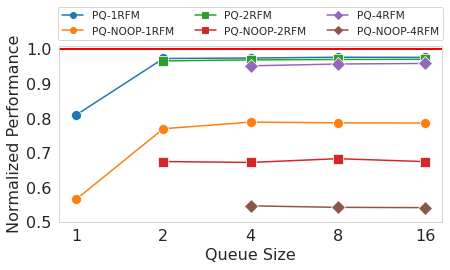

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to include only the rows where workload is 'All (56)'
df_all_56 = geomean_df[(geomean_df['workload'] == 'All (56)') & (geomean_df['queue_size'] <= 16)]



# List of RFMs and strategies
rfm_list = [1, 2, 4]
strategies = ['PRAC-PQ', 'PRAC-PQ-NoOpREF']

# Define a mapping for strategy names
strategy_mapping = {
    'PRAC-PQ': 'PQ',
    'PRAC-PQ-NoOpREF': 'PQ-NOOP'
}
# Define markers for each RFM
markers = {
    'PQ-1RFM': 'o',
    'PQ-2RFM': 's',
    'PQ-4RFM': 'D',
    'PQ-NOOP-1RFM': 'o',
    'PQ-NOOP-2RFM': 's',
    'PQ-NOOP-4RFM': 'D'
}

# Prepare data for plotting
plot_data = []

for rfm in rfm_list:
    for strategy in strategies:
        strategy_data = df_all_56[(df_all_56['num_RFM'] == rfm) & (df_all_56['queue_size'] >= rfm)]
        plot_data.append(strategy_data[['queue_size', strategy]].rename(columns={strategy: 'performance'}).assign(strategy=f'{strategy_mapping[strategy]}-{rfm}RFM'))

plot_data = pd.concat(plot_data, ignore_index=True)

# Plotting
# Set up the plot
sns.set_style("whitegrid")
plt.rc('font', size=10)
fig, ax = plt.subplots(figsize=(6.5,4))
x_ticks = [1, 2, 4, 8, 16]
sns.lineplot(x='queue_size', y='performance', hue='strategy', style='strategy', dashes=False, markers=markers, 
             data=plot_data, markersize=10, err_style='bars')

plt.xscale('log')
# Customizing the plot
ax.set_xticks([1, 2, 4, 8, 16])
ax.set_xticklabels([1, 2, 4, 8, 16], fontsize=16)
plt.yticks(fontsize=16)

ax.set_xlabel('Queue Size', fontsize=16)
ax.set_ylabel('Normalized Performance', fontsize=16)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=False, fontsize=10.5)
# ax.legend(loc='best', ncol=3, fancybox=True, shadow=False, fontsize=12)

ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
plt.grid(axis='both', linestyle='--')
plt.ylim(0.5,1.01)

plt.tight_layout()

# Show the plot
# plt.show()
fig.savefig('./figures/4cores_results_varying_queue_size_no_proactive_BO32.pdf', dpi=600, bbox_inches='tight')


**With Proactive Mitigation**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
multicore_4cores_out_path = "../mitigation_overhead_study/queue_size_study/results_4cores/robaracoch_mapping/32BO/proactive_mitiagtion/1targetREF_per_tREFI"
prac_latency_overhead_only_path = "../mitigation_overhead_study/results_4cores/robaracoch_mapping/PRAC_WO_Mitigation/stats/"
# singlecore_out_path = "../mitigation_enabled/results_singlecore/adaptive_closed_page"

df = pd.DataFrame(columns=["mitigation", "num_RFM", "queue_size", "workload", "WS"])
mitigation_list = ["QPRAC-NoOp", "QPRAC", "QPRAC+Proactive", "QPRAC+Proactive-2", "QPRAC+Proactive-4"]
for num_rfm in [1]:    
# for num_rfm in [1,2,4]:    
    for mitigation in mitigation_list:
        result_path = multicore_4cores_out_path + "/" + str(num_rfm) + "rfm_per_alert/" + mitigation +"/stats/"
        result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
        for result_filename in result_list:
            result_file = open(result_path + result_filename + ".txt", "r")
            trh = int(result_filename.split("_")[0])
            # workload = result_filename.split("_")[1:]
            workload = "_".join(result_filename.split("_")[1:])

            ipc_0 = 0
            ipc_1 = 0
            ipc_2 = 0
            ipc_3 = 0
            cycle_0 = 0
            cycle_1 = 0
            cycle_2 = 0
            cycle_3 = 0
            num_inst_0=0
            num_inst_1=0
            num_inst_2=0
            num_inst_3=0
            for line in result_file.readlines():
                if (" cycles_recorded_core_0:" in line):
                    cycle_0 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_1:" in line):
                    cycle_1 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_2:" in line):
                    cycle_2 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_3:" in line):
                    cycle_3 = int(line.split(" ")[-1])
                if (" insts_recorded_core_0" in line):
                    num_inst_0 = int(line.split(" ")[-1])
                if (" insts_recorded_core_1" in line):
                    num_inst_1 = int(line.split(" ")[-1])
                if (" insts_recorded_core_2" in line):
                    num_inst_2 = int(line.split(" ")[-1])
                if (" insts_recorded_core_3" in line):
                    num_inst_3 = int(line.split(" ")[-1])
            if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
                continue
            if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
                print("Error: " + result_filename)
            ipc_0 = int(num_inst_0) / cycle_0
            ipc_1 = int(num_inst_1) / cycle_1
            ipc_2 = int(num_inst_2) / cycle_2
            ipc_3 = int(num_inst_3) / cycle_3

            # print(workload)
            # print(ipc)

            result_file.close()
            df = df.append({'mitigation': mitigation, 'num_RFM': num_rfm, 'queue_size': trh, "workload": workload, "WS": ipc_0+ipc_1+ipc_2+ipc_3}, ignore_index=True)


df = df.pivot(index=['num_RFM','queue_size','workload'], columns=['mitigation'], values='WS').reset_index()     

# Process Baseline results here
baseline_df = pd.DataFrame(columns=['workload', 'PRAC_wo_mitigation_WS'])
baseline_result_list = [x[:-4] for x in os.listdir(prac_latency_overhead_only_path) if x.endswith(".txt")]
for result_filename in baseline_result_list:
    result_file = open(prac_latency_overhead_only_path + result_filename + ".txt", "r")
    trh = int(result_filename.split("_")[0])
    if trh != 32:
         continue
    # workload = result_filename.split("_")[1:]
    workload = "_".join(result_filename.split("_")[1:])

    ipc_0 = 0
    ipc_1 = 0
    ipc_2 = 0
    ipc_3 = 0
    cycle_0 = 0
    cycle_1 = 0
    cycle_2 = 0
    cycle_3 = 0
    num_inst_0=0
    num_inst_1=0
    num_inst_2=0
    num_inst_3=0
    for line in result_file.readlines():
        if (" cycles_recorded_core_0:" in line):
                cycle_0 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_1:" in line):
                cycle_1 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_2:" in line):
                cycle_2 = int(line.split(" ")[-1])
        if (" cycles_recorded_core_3:" in line):
                cycle_3 = int(line.split(" ")[-1])
        if (" insts_recorded_core_0" in line):
            num_inst_0 = int(line.split(" ")[-1])
        if (" insts_recorded_core_1" in line):
            num_inst_1 = int(line.split(" ")[-1])
        if (" insts_recorded_core_2" in line):
            num_inst_2 = int(line.split(" ")[-1])
        if (" insts_recorded_core_3" in line):
            num_inst_3 = int(line.split(" ")[-1])
    if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
        continue
    if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
        print("Error: " + result_filename)
    ipc_0 = int(num_inst_0) / cycle_0
    ipc_1 = int(num_inst_1) / cycle_1
    ipc_2 = int(num_inst_2) / cycle_2
    ipc_3 = int(num_inst_3) / cycle_3

    # print(workload)
    # print(ipc)

    result_file.close()
    baseline_df = baseline_df.append({"workload": workload, "PRAC_wo_mitigation_WS": ipc_0+ipc_1+ipc_2+ipc_3}, ignore_index=True)

# print(df)
# print(baseline_df)
df = df.merge(baseline_df, on='workload', how='left')


mitigation_list = ["QPRAC-NoOp", "QPRAC", "QPRAC+Proactive", "QPRAC+Proactive-2", "QPRAC+Proactive-4"]
for mitigation in set(mitigation_list) - set(['PRAC_wo_mitigation_WS']):
     df[mitigation] = df[mitigation] / df['PRAC_wo_mitigation_WS']
df.drop(columns=['PRAC_wo_mitigation_WS'], inplace=True)


workload_interests = ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk', 
                      '500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz',
                      'tpcc64', 'tpch17', 'tpch2', 'tpch6',
                      'grep_map0', 'wc_8443', 'wc_map0',
                    #   'bfs_dblp', 'bfsbfs_cm2003_cm_2003','bfs_ny',
                    #   'h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'
                      'h264_encode', 'jp2_decode', 'jp2_encode',
                      'ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'
                      ]

df_interest = df[df['workload'].isin(workload_interests)]

#To rerun workloads: Check for NaN values in each column for each workload
# nan_check = df_interest.isna().any(axis=1)
# # Workloads with NaN values in any column
# workloads_with_nan = df_interest[nan_check]['workload'].unique()
# if len(workloads_with_nan) > 0:
#     print(f"Workloads with NaN values in any column: {list(workloads_with_nan)}")
# else:
#     print("No workloads have NaN values in any column.")

# Define benchmark suites and their corresponding workloads
benchmark_suites = {
    'SPEC2K6 (22)': ['401.bzip2', '403.gcc', '429.mcf', '433.milc', '434.zeusmp', '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk', '447.dealII', '450.soplex', '456.hmmer', '458.sjeng', '459.GemsFDTD', '462.libquantum', '464.h264ref', '470.lbm', '471.omnetpp', '473.astar', '482.sphinx3', '483.xalancbmk'], # SPEC2K6: 22
    'SPEC2K17 (18)': ['500.perlbench', '502.gcc', '505.mcf', '507.cactuBSSN', '508.namd', '510.parest', '511.povray', '519.lbm', '520.omnetpp', '523.xalancbmk', '525.x264', '526.blender', '531.deepsjeng', '538.imagick', '541.leela', '544.nab', '549.fotonik3d', '557.xz'], # SPEC2K17: 18
    'TPC (4)': ['tpcc64', 'tpch17', 'tpch2', 'tpch6'], #tpc: 4
    # TODO: Enable Hadoop and LonestartGPU after fixing the performance shooting problem + h264_decode
    'Hadoop (3)': ['grep_map0', 'wc_8443', 'wc_map0'], #Hadoop: 3
    # 'LonestarGPU (3)': ['bfs_dblp', 'bfsbfs_cm2003_cm_2003','bfs_ny'], #lnestargpu: 3
    # 'MediaBench (4)': ['h264_decode', 'h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 4
    'MediaBench (3)': ['h264_encode', 'jp2_decode', 'jp2_encode'], #mediabench: 3
    'YCSB (6)': ['ycsb_abgsave', 'ycsb_aserver', 'ycsb_bserver', 'ycsb_cserver', 'ycsb_dserver', 'ycsb_eserver'] #ycsb:6
}

#
# Function to calculate geometric mean
def calculate_geometric_mean(series):
    return np.prod(series) ** (1 / len(series))

# Function to calculate and add geometric means as new rows
def add_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for num_rfm in df['num_RFM'].unique():
        for trh in df['queue_size'].unique():
            for suite_name, workloads in benchmark_suites.items():
                suite_df = df[df['workload'].isin(workloads) & (df['queue_size'] == trh) & (df['num_RFM'] == num_rfm)]
                if not suite_df.empty:
                    geomean_prac_pq = calculate_geometric_mean(suite_df['QPRAC'])
                    geomean_prac_pq_no_ref = calculate_geometric_mean(suite_df['QPRAC-NoOp'])
                    geomean_prac_pq_proactive = calculate_geometric_mean(suite_df['QPRAC+Proactive'])
                    geomean_prac_pq_proactive2 = calculate_geometric_mean(suite_df['QPRAC+Proactive-2'])
                    geomean_prac_pq_proactive4 = calculate_geometric_mean(suite_df['QPRAC+Proactive-4'])
                # geomean_prac_wo_mitigation = calculate_geometric_mean(suite_df['PRAC_WO_Mitigation'])
                    geomean_df = geomean_df.append({
                        'num_RFM': num_rfm,
                        'queue_size': trh,
                        'workload': suite_name,
                        'QPRAC': geomean_prac_pq,
                        'QPRAC-NoOp': geomean_prac_pq_no_ref,
                        'QPRAC+Proactive': geomean_prac_pq_proactive,
                        'QPRAC+Proactive-2': geomean_prac_pq_proactive2,
                        'QPRAC+Proactive-4': geomean_prac_pq_proactive4,
                    }, ignore_index=True)
    
    return df.append(geomean_df, ignore_index=True)

# Call function to calculate and merge geometric means
geomean_df = add_geomean_rows(df_interest)


# Function to add 'All-60' rows for each trh value
def add_all_workloads_geomean_rows(df):
    geomean_df = pd.DataFrame(columns=df.columns)
    
    for num_rfm in df['num_RFM'].unique():
        for trh in df['queue_size'].unique():
            trh_df = df[(df['queue_size'] == trh) & (df['num_RFM'] == num_rfm)]
            geomean_prac_pq = calculate_geometric_mean(trh_df['QPRAC'])
            geomean_prac_pq_no_ref = calculate_geometric_mean(trh_df['QPRAC-NoOp'])
            geomean_prac_pq_proactive = calculate_geometric_mean(trh_df['QPRAC+Proactive'])
            geomean_prac_pq_proactive2 = calculate_geometric_mean(trh_df['QPRAC+Proactive-2'])
            geomean_prac_pq_proactive4 = calculate_geometric_mean(trh_df['QPRAC+Proactive-4'])
        
            all_workloads_geomean_df = pd.DataFrame({
                'num_RFM': [num_rfm],
                'queue_size': [trh],
                'workload': ['All (56)'],
                'QPRAC': [geomean_prac_pq],
                'QPRAC-NoOp': [geomean_prac_pq_no_ref],
                'QPRAC+Proactive': [geomean_prac_pq_proactive],
                'QPRAC+Proactive-2': [geomean_prac_pq_proactive2],
                'QPRAC+Proactive-4': [geomean_prac_pq_proactive4],
            })
            
            geomean_df = pd.concat([geomean_df, all_workloads_geomean_df], ignore_index=True)
    
    return pd.concat([df, geomean_df], ignore_index=True)

geomean_df_pro = add_all_workloads_geomean_rows(geomean_df)
# print(geomean_df)
print(geomean_df_pro[geomean_df_pro['workload'] == 'All (56)'])
# geomean_df[['queue_size','workload','PRAC-PQ']].to_csv('./queue_size_study_results_4cores_ABO32.csv', index=False)

    num_RFM queue_size  workload     QPRAC  QPRAC+Proactive  \
426       1          1  All (56)  0.805827         0.967980   
427       1          2  All (56)  0.972430         0.995585   
428       1          3  All (56)  0.973311         0.994700   
429       1          4  All (56)  0.973809         0.995981   
430       1          5  All (56)  0.974538         0.994805   
431       1          8  All (56)  0.976120         0.995746   
432       1         16  All (56)  0.975722         0.996271   

     QPRAC+Proactive-2  QPRAC+Proactive-4  QPRAC-NoOp  
426           0.874331           0.851441    0.533669  
427           0.987416           0.981730    0.764627  
428           0.986818           0.983335    1.000000  
429           0.988209           0.982766    0.777700  
430           0.989144           0.984512    1.000000  
431           0.988895           0.985139    0.779714  
432           1.000000           1.000000    0.778737  


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
multicore_4cores_out_path = "../mitigation_overhead_study/queue_size_study/results_4cores/robaracoch_mapping/32BO/proactive_mitiagtion/1targetREF_per_tREFI"
prac_latency_overhead_only_path = "../mitigation_overhead_study/results_4cores/robaracoch_mapping/PRAC_WO_Mitigation/stats/"
# no_proactive_4cores_out_path = "../mitigation_overhead_study/queue_size_study/results_4cores/robaracoch_mapping/32BOTh/no_proactive_mitiagtion"

# singlecore_out_path = "../mitigation_enabled/results_singlecore/adaptive_closed_page"

df = pd.DataFrame(columns=["mitigation", "num_RFM", "workload", "WS"])
mitigation_list = ["QPRAC-NoOp", "QPRAC", "QPRAC+Proactive", "QPRAC+Proactive-2", "QPRAC+Proactive-4"]
for num_rfm in [1]:    
    for mitigation in mitigation_list:
        result_path = multicore_4cores_out_path + "/" + str(num_rfm) + "rfm_per_alert/" + mitigation +"/stats/"
        result_list = [x[:-4] for x in os.listdir(result_path) if x.endswith(".txt")]
        for result_filename in result_list:
            result_file = open(result_path + result_filename + ".txt", "r")
            trh = int(result_filename.split("_")[0])
            # workload = result_filename.split("_")[1:]
            workload = "_".join(result_filename.split("_")[1:])

            ipc_0 = 0
            ipc_1 = 0
            ipc_2 = 0
            ipc_3 = 0
            cycle_0 = 0
            cycle_1 = 0
            cycle_2 = 0
            cycle_3 = 0
            num_inst_0=0
            num_inst_1=0
            num_inst_2=0
            num_inst_3=0
            num_abo=0
            num_tREFI_period=0
            num_tREFW_period=0
            avg_priority_queue_len = 0.0
            priority_queue_empty_in_opportunistic = 0
            priority_queue_empty_in_proactive = 0
            avg_priority_queue_empty_in_opportunistic = 0
            avg_priority_queue_empty_in_proactive = 0
            for line in result_file.readlines():
                if (" cycles_recorded_core_0:" in line):
                    cycle_0 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_1:" in line):
                    cycle_1 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_2:" in line):
                    cycle_2 = int(line.split(" ")[-1])
                if (" cycles_recorded_core_3:" in line):
                    cycle_3 = int(line.split(" ")[-1])
                if (" insts_recorded_core_0" in line):
                    num_inst_0 = int(line.split(" ")[-1])
                if (" insts_recorded_core_1" in line):
                    num_inst_1 = int(line.split(" ")[-1])
                if (" insts_recorded_core_2" in line):
                    num_inst_2 = int(line.split(" ")[-1])
                if (" insts_recorded_core_3" in line):
                    num_inst_3 = int(line.split(" ")[-1])
                if (" prac_num_recovery" in line):
                    num_abo = int(line.split(" ")[-1])
                if (" num_refresh_command_0" in line):
                    num_tREFI_period = int(line.split(" ")[-1])
                if (" num_refresh_window_0" in line):
                    num_tREFW_period = int(line.split(" ")[-1])     
                if (" priority_queue_len_avg" in line):
                    avg_priority_queue_len = float(line.split(" ")[-1])
                if (" num_priority_queue_empty_in_opportunistic_avg_per_abo" in line):
                    if line.split(" ")[-1] == '.nan\n':
                        avg_priority_queue_empty_in_opportunistic = 0.0
                    else:                    
                        avg_priority_queue_empty_in_opportunistic = float(line.split(" ")[-1])
                if (" num_priority_queue_empty_in_proactive_avg_per_proactive" in line):
                    if line.split(" ")[-1] == '.nan\n':
                        avg_priority_queue_empty_in_proactive = 0.0
                    else:
                        avg_priority_queue_empty_in_proactive = float(line.split(" ")[-1])
                # if (" num_priority_queue_empty_in_opportunistic" in line):
                #     value = line.split(" ")[-1].strip()
                #     if value == '.nan\n':
                #         priority_queue_empty_in_opportunistic = 0
                #     else:
                #         priority_queue_empty_in_opportunistic = int(line.split(" ")[-1])
                # if (" num_priority_queue_empty_in_proactive" in line):
                #     if line.split(" ")[-1] == '.nan\n':
                #         priority_queue_empty_in_proactive = 0
                #     else:
                #         priority_queue_empty_in_proactive = int(line.split(" ")[-1])
                    
            if (cycle_0 == 0 and cycle_1 == 0 and cycle_2 == 0 and cycle_3 == 0):
                continue
            if (cycle_0 == 0 or cycle_1 == 0 or cycle_2 == 0 or cycle_3 == 0):
                print("Error: " + result_filename)
            ipc_0 = int(num_inst_0) / cycle_0
            ipc_1 = int(num_inst_1) / cycle_1
            ipc_2 = int(num_inst_2) / cycle_2
            ipc_3 = int(num_inst_3) / cycle_3
            num_abo_per_trefi = int(num_abo) / int(num_tREFI_period)
            if int(num_tREFW_period) == 0:
                num_abo_per_trefw = int(num_abo)
            else:
                num_abo_per_trefw = int(num_abo) / int(num_tREFW_period)
            # print(workload)
            # print(ipc)

            result_file.close()
            df = df.append({'mitigation': mitigation, 'num_RFM': num_rfm, 'queue_size': trh, "workload": workload, "WS": ipc_0+ipc_1+ipc_2+ipc_3, "num_abo_trefi": num_abo_per_trefi, "num_abo_trefw": num_abo_per_trefw, "avg_psq_len": avg_priority_queue_len, 
                            "num_psq_empty_in_opportunistic": priority_queue_empty_in_opportunistic, "num_psq_empth_in_proactive": priority_queue_empty_in_proactive,
                            "avg_num_psq_empty_in_opportunistic": avg_priority_queue_empty_in_opportunistic, "avg_num_psq_empty_in_proactive": avg_priority_queue_empty_in_proactive} , ignore_index=True)

df_pivot = df.pivot(index=['queue_size','workload'], columns=['mitigation'], values=['WS', 'avg_psq_len', 'num_psq_empty_in_opportunistic', \
                                                                                     'num_psq_empth_in_proactive', 'avg_num_psq_empty_in_opportunistic', 'avg_num_psq_empty_in_proactive']).reset_index()     
df_pivot.to_csv("./psq_profiling.csv")

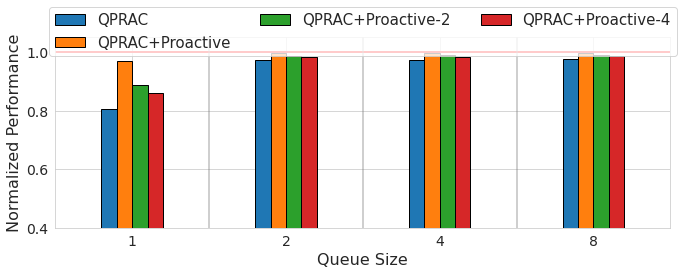

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

df_target = geomean_df_pro[(geomean_df_pro['num_RFM'] == 1) & (geomean_df_pro['queue_size'].isin([1, 2, 4, 8]))]
df_target = df_target[df_target['workload'] == 'All (56)']
# df_melted = pd.melt(df_target, id_vars=['queue_size', 'workload'], value_vars=['QPRAC-NoOp', 'QPRAC', 'QPRAC+Proactive'], var_name='PRAC_Implementation', value_name='WS')
df_melted = pd.melt(df_target, id_vars=['queue_size', 'workload'], value_vars=['QPRAC', 'QPRAC+Proactive', 'QPRAC+Proactive-2', 'QPRAC+Proactive-4'], var_name='PRAC_Implementation', value_name='WS')

sns.set_palette("tab10")
sns.set_style("whitegrid")

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4))
plt.rc('font', size=10)
# Use Seaborn's 'tab10' color palette
palette = sns.color_palette("tab10")
colors = {impl: palette[i % len(palette)] for i, impl in enumerate(df_melted['PRAC_Implementation'].unique())}


# Define bar width and x-tick positions
bar_width = 0.1  # Desired smaller bar width
x_ticks = [1, 2, 4, 8]
num_bars = len(df_melted['PRAC_Implementation'].unique())

# Calculate positions for bars
# x_tick_positions = np.arange(len(x_ticks))  # Positions for x-ticks
x_tick_positions = np.linspace(0, len(x_ticks) - 1, len(x_ticks))  # Adjust spacing here
bar_positions = {}

# Calculate bar positions
for idx, tick in enumerate(x_ticks):
    base_x = x_tick_positions[idx]
    bar_positions[tick] = [base_x - (bar_width * num_bars) / 2 + j * bar_width for j in range(num_bars)]

# Plot bars
for tick in x_ticks:
    subset = df_melted[df_melted['queue_size'] == tick]
    for i, prac_impl in enumerate(df_melted['PRAC_Implementation'].unique()):
        value = subset[subset['PRAC_Implementation'] == prac_impl]['WS'].values[0]
        x_position = bar_positions[tick][i] + bar_width / 2  # Adjust position for centering
        color = colors[prac_impl]
        ax.bar(x_position, value, width=bar_width, color=color, edgecolor='black', label=prac_impl if tick == x_ticks[0] else "")

# Add a horizontal line at y=1.0
ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

# Customize legend, labels, and ticks
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels from the legend
ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=False, fontsize=15)
# Set xticks to specific queue_size values and ensure correct spacing
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_ticks)
ax.set_xlabel('Queue Size', fontsize=16)
ax.axvline(x=0.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=1.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=2.5, color='grey', linestyle='-', alpha=0.5)
ax.set_ylabel('Normalized Performance', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim(0.4, 1.05)
ax.set_xlim(-0.5, 3.5)

plt.tight_layout()
fig.savefig('./figures/4cores_results_varying_queue_size_BO32_proactvie_per_1tREFI.pdf', dpi=600, bbox_inches='tight')

   queue_size  workload                      PRAC_Implementation        WS  \
0           1  All (56)                                    QPRAC  0.805827   
15          1  All (56)            QPRAC+1 Proactive per 4 tREFI  0.851441   
10          1  All (56)            QPRAC+1 Proactive per 2 tREFI  0.874331   
5           1  All (56)  QPRAC+1 Proactive per 1 tREFI (default)  0.967980   
1           2  All (56)                                    QPRAC  0.972430   
16          2  All (56)            QPRAC+1 Proactive per 4 tREFI  0.981730   
11          2  All (56)            QPRAC+1 Proactive per 2 tREFI  0.987416   
6           2  All (56)  QPRAC+1 Proactive per 1 tREFI (default)  0.995585   
2           3  All (56)                                    QPRAC  0.973311   
17          3  All (56)            QPRAC+1 Proactive per 4 tREFI  0.983335   
12          3  All (56)            QPRAC+1 Proactive per 2 tREFI  0.986818   
7           3  All (56)  QPRAC+1 Proactive per 1 tREFI (default)

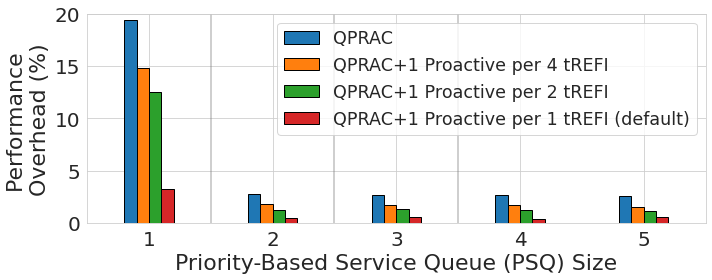

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


df_target = geomean_df_pro[(geomean_df_pro['num_RFM'] == 1) & (geomean_df_pro['queue_size'].isin([1, 2, 3, 4, 5]))]
df_target = df_target[df_target['workload'] == 'All (56)']
df_melted = pd.melt(df_target, id_vars=['queue_size', 'workload'], value_vars=['QPRAC', 'QPRAC+Proactive', 'QPRAC+Proactive-2', 'QPRAC+Proactive-4'], var_name='PRAC_Implementation', value_name='WS')



df_melted['PRAC_Implementation'] = df_melted['PRAC_Implementation'].replace({'QPRAC+Proactive':'QPRAC+Proactive-1'})
df_melted['Performance_Overhead'] = (1 - df_melted['WS']) * 100

rename_mapping = {
    'QPRAC': 'QPRAC',   
    'QPRAC+Proactive-4': 'QPRAC+1 Proactive per 4 tREFI',
    'QPRAC+Proactive-2': 'QPRAC+1 Proactive per 2 tREFI',
    'QPRAC+Proactive-1': 'QPRAC+1 Proactive per 1 tREFI (default)',
    # 'QPRAC+Proactive-1': 'QPRAC+1',
    # 'QPRAC+Proactive-2': 'QPRAC+2',
    # 'QPRAC+Proactive-4': 'QPRAC+4',
}
df_melted['PRAC_Implementation'] = df_melted['PRAC_Implementation'].replace(rename_mapping)

# Sort the dataframe based on the desired order
order = ['QPRAC', 'QPRAC+1 Proactive per 4 tREFI', 'QPRAC+1 Proactive per 2 tREFI', 'QPRAC+1 Proactive per 1 tREFI (default)']
df_melted['PRAC_Implementation'] = pd.Categorical(df_melted['PRAC_Implementation'], categories=order, ordered=True)
df_melted = df_melted.sort_values(['queue_size', 'PRAC_Implementation'])

print(df_melted)

sns.set_palette("tab10")
sns.set_style("whitegrid")

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4))
plt.rc('font', size=10)
# Use Seaborn's 'tab10' color palette
palette = sns.color_palette("tab10")
colors = {impl: palette[i % len(palette)] for i, impl in enumerate(df_melted['PRAC_Implementation'].unique())}


# Define bar width and x-tick positions
bar_width = 0.1  # Desired smaller bar width
x_ticks = [1, 2, 3, 4, 5]
num_bars = len(df_melted['PRAC_Implementation'].unique())

# Calculate positions for bars
# x_tick_positions = np.arange(len(x_ticks))  # Positions for x-ticks
x_tick_positions = np.linspace(0, len(x_ticks) - 1, len(x_ticks))  # Adjust spacing here
bar_positions = {}

# Calculate bar positions
for idx, tick in enumerate(x_ticks):
    base_x = x_tick_positions[idx]
    bar_positions[tick] = [base_x - (bar_width * num_bars) / 2 + j * bar_width for j in range(num_bars)]

# Plot bars
for tick in x_ticks:
    subset = df_melted[df_melted['queue_size'] == tick]
    for i, prac_impl in enumerate(df_melted['PRAC_Implementation'].unique()):
        value = subset[subset['PRAC_Implementation'] == prac_impl]['Performance_Overhead'].values[0]
        x_position = bar_positions[tick][i] + bar_width / 2  # Adjust position for centering
        color = colors[prac_impl]
        ax.bar(x_position, value, width=bar_width, color=color, edgecolor='black', label=prac_impl if tick == x_ticks[0] else "")

# Add a horizontal line at y=1.0
# ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)

# Customize legend, labels, and ticks
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels from the legend
ax.legend(by_label.values(), by_label.keys(), loc='best', ncol=1, fancybox=True, shadow=False, fontsize=17.5)
# ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fancybox=True, shadow=False, fontsize=15)
# Set xticks to specific queue_size values and ensure correct spacing
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_ticks)
ax.axvline(x=0.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=1.5, color='grey', linestyle='-', alpha=0.5)
ax.axvline(x=2.5, color='grey', linestyle='-', alpha=0.5)
ax.set_xlabel('Priority-Based Service Queue (PSQ) Size', fontsize=22)
ax.set_ylabel('Performance \nOverhead (%)', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylim(0, 20)
ax.set_xlim(-0.5, 4.5)

plt.tight_layout()
fig.savefig('./figures/4cores_results_varying_queue_size_BO32_proactvie_per_1tREFI_PerfOverhead.pdf', dpi=600, bbox_inches='tight')

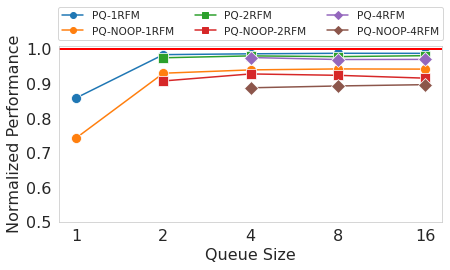

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to include only the rows where workload is 'All (56)'
df_all_56 = geomean_df[(geomean_df['workload'] == 'All (56)') & (geomean_df['queue_size'] <= 16)]



# List of RFMs and strategies
rfm_list = [1, 2, 4]
strategies = ['PRAC-PQ', 'PRAC-PQ-NoOpREF']

# Define a mapping for strategy names
strategy_mapping = {
    'PRAC-PQ': 'PQ',
    'PRAC-PQ-NoOpREF': 'PQ-NOOP'
}
# Define markers for each RFM
markers = {
    'PQ-1RFM': 'o',
    'PQ-2RFM': 's',
    'PQ-4RFM': 'D',
    'PQ-NOOP-1RFM': 'o',
    'PQ-NOOP-2RFM': 's',
    'PQ-NOOP-4RFM': 'D'
}

# Prepare data for plotting
plot_data = []

for rfm in rfm_list:
    for strategy in strategies:
        strategy_data = df_all_56[(df_all_56['num_RFM'] == rfm) & (df_all_56['queue_size'] >= rfm)]
        plot_data.append(strategy_data[['queue_size', strategy]].rename(columns={strategy: 'performance'}).assign(strategy=f'{strategy_mapping[strategy]}-{rfm}RFM'))

plot_data = pd.concat(plot_data, ignore_index=True)

# Plotting
# Set up the plot
sns.set_style("whitegrid")
plt.rc('font', size=10)
fig, ax = plt.subplots(figsize=(6.5,4))
x_ticks = [1, 2, 4, 8, 16]
sns.lineplot(x='queue_size', y='performance', hue='strategy', style='strategy', dashes=False, markers=markers, 
             data=plot_data, markersize=10, err_style='bars')

plt.xscale('log')
# Customizing the plot
ax.set_xticks([1, 2, 4, 8, 16])
ax.set_xticklabels([1, 2, 4, 8, 16], fontsize=16)
plt.yticks(fontsize=16)

ax.set_xlabel('Queue Size', fontsize=16)
ax.set_ylabel('Normalized Performance', fontsize=16)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=False, fontsize=10.5)
# ax.legend(loc='best', ncol=3, fancybox=True, shadow=False, fontsize=12)

ax.axhline(y=1.0, color='r', linestyle='-', linewidth=2)
plt.grid(axis='both', linestyle='--')
plt.ylim(0.5,1.01)

plt.tight_layout()

# Show the plot
# plt.show()
fig.savefig('./figures/4cores_results_varying_queue_size_with_proactive_BO32.pdf', dpi=600, bbox_inches='tight')
